# Get some basic data visualizations running for scott to look at and understand our data better

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.cluster import k_means
from aging.plotting import figure, save_factory, format_plots, PlotConfig

In [2]:
def zscore(x):
    return (x - x.mean()) / x.std()
def minmax(x):
    return (x - x.min()) / (x.max() - x.min())

In [3]:
format_plots()
c = PlotConfig()
saver = save_factory(c.save_path / "scott-meeting", tight_layout=True)

In [4]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_relabeled_usage_matrix_v00.parquet')
df = df.sort_index(axis=1)
df = df.iloc[:, :55]
age = df.index.get_level_values('age')

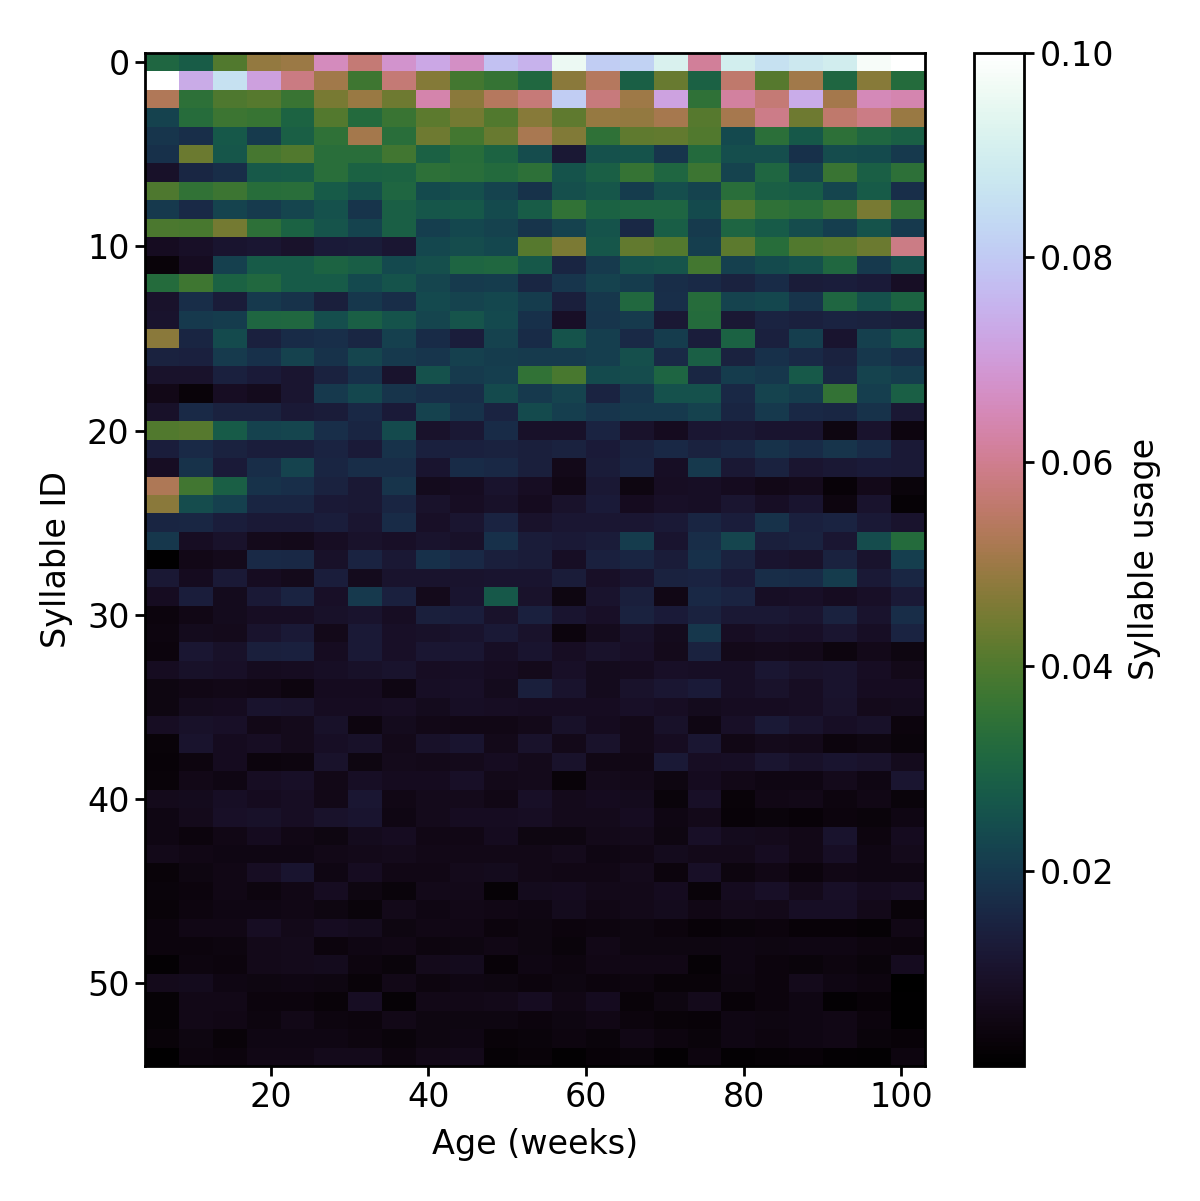

In [91]:
plt.imshow(
    df.astype("float").groupby("age").mean().T,
    cmap="cubehelix",
    aspect="auto",
    interpolation="none",
    vmax=0.1,
    extent=(age.min(), age.max(), df.shape[1]-0.5, -0.5),
)
plt.colorbar(label="Syllable usage")
plt.ylabel("Syllable ID")
plt.xlabel("Age (weeks)")
saver(plt.gcf(), "syllable-usage-heatmap");

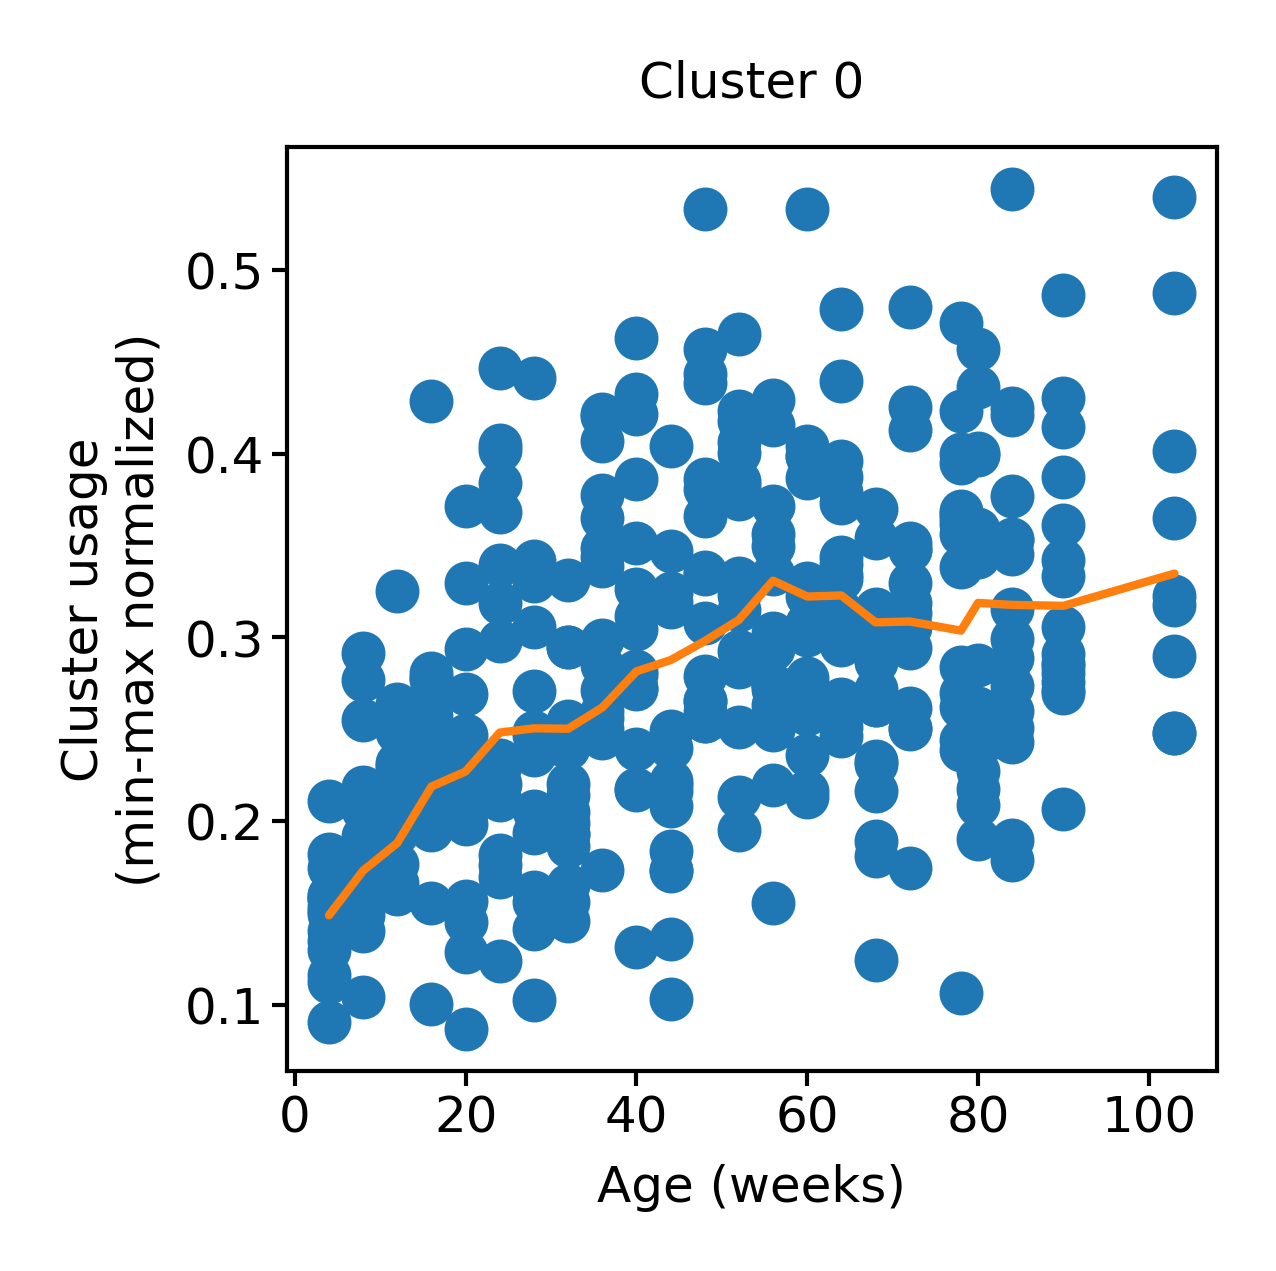

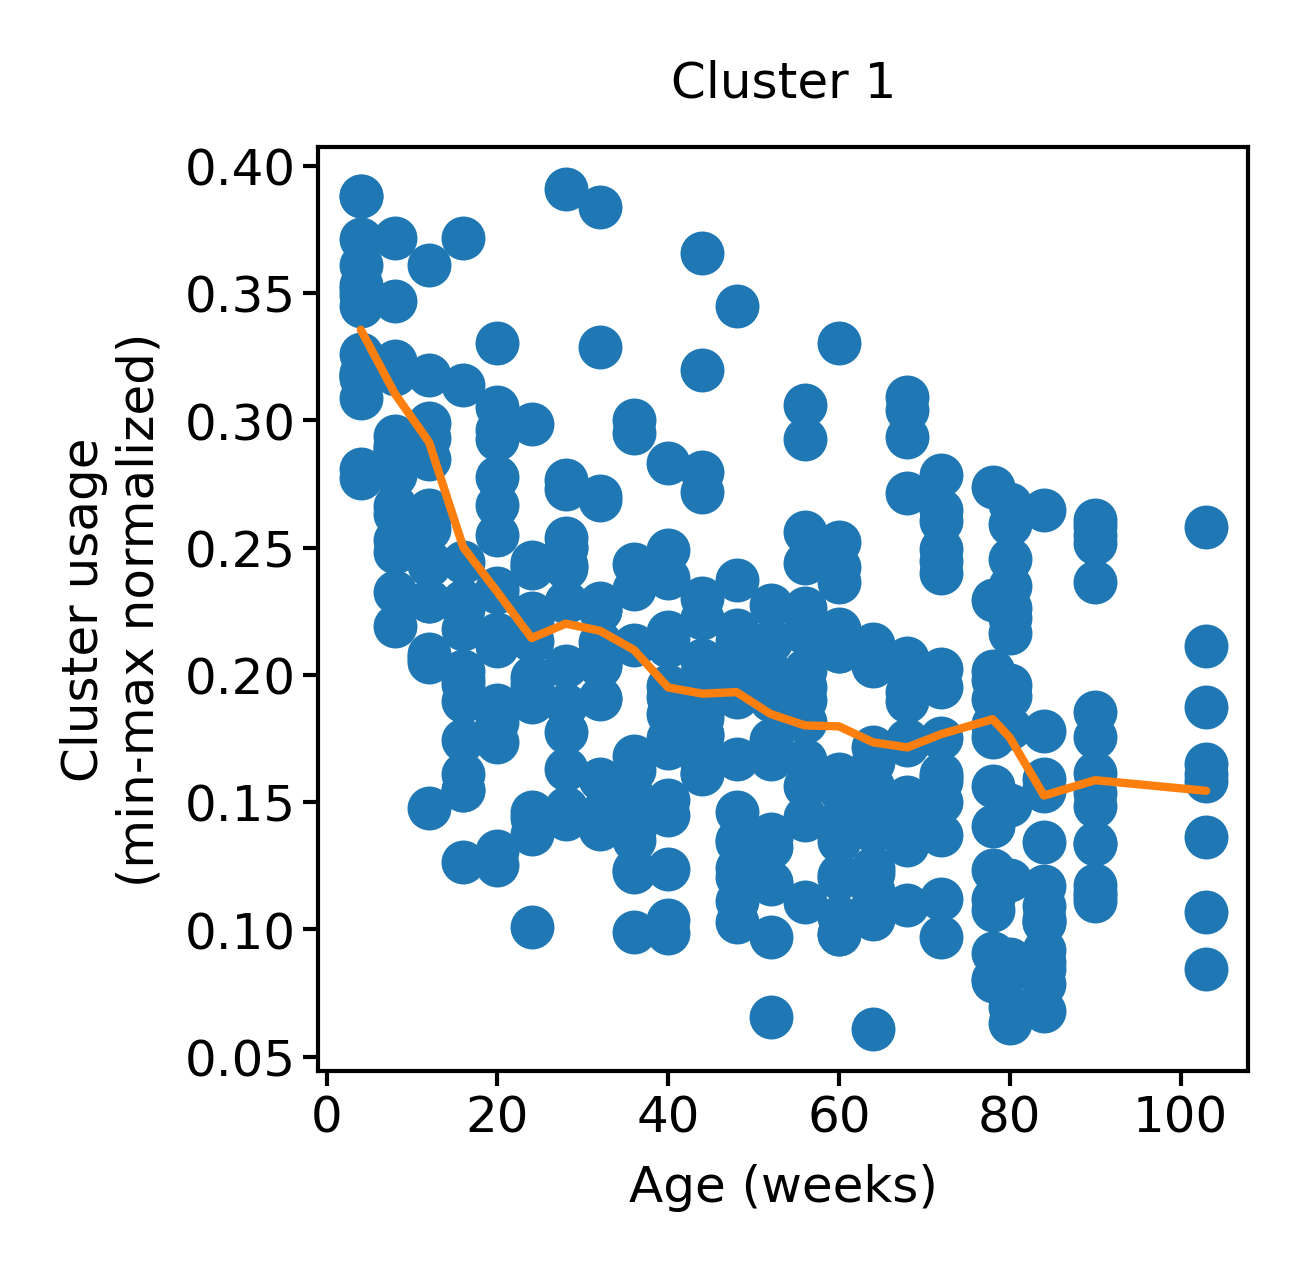

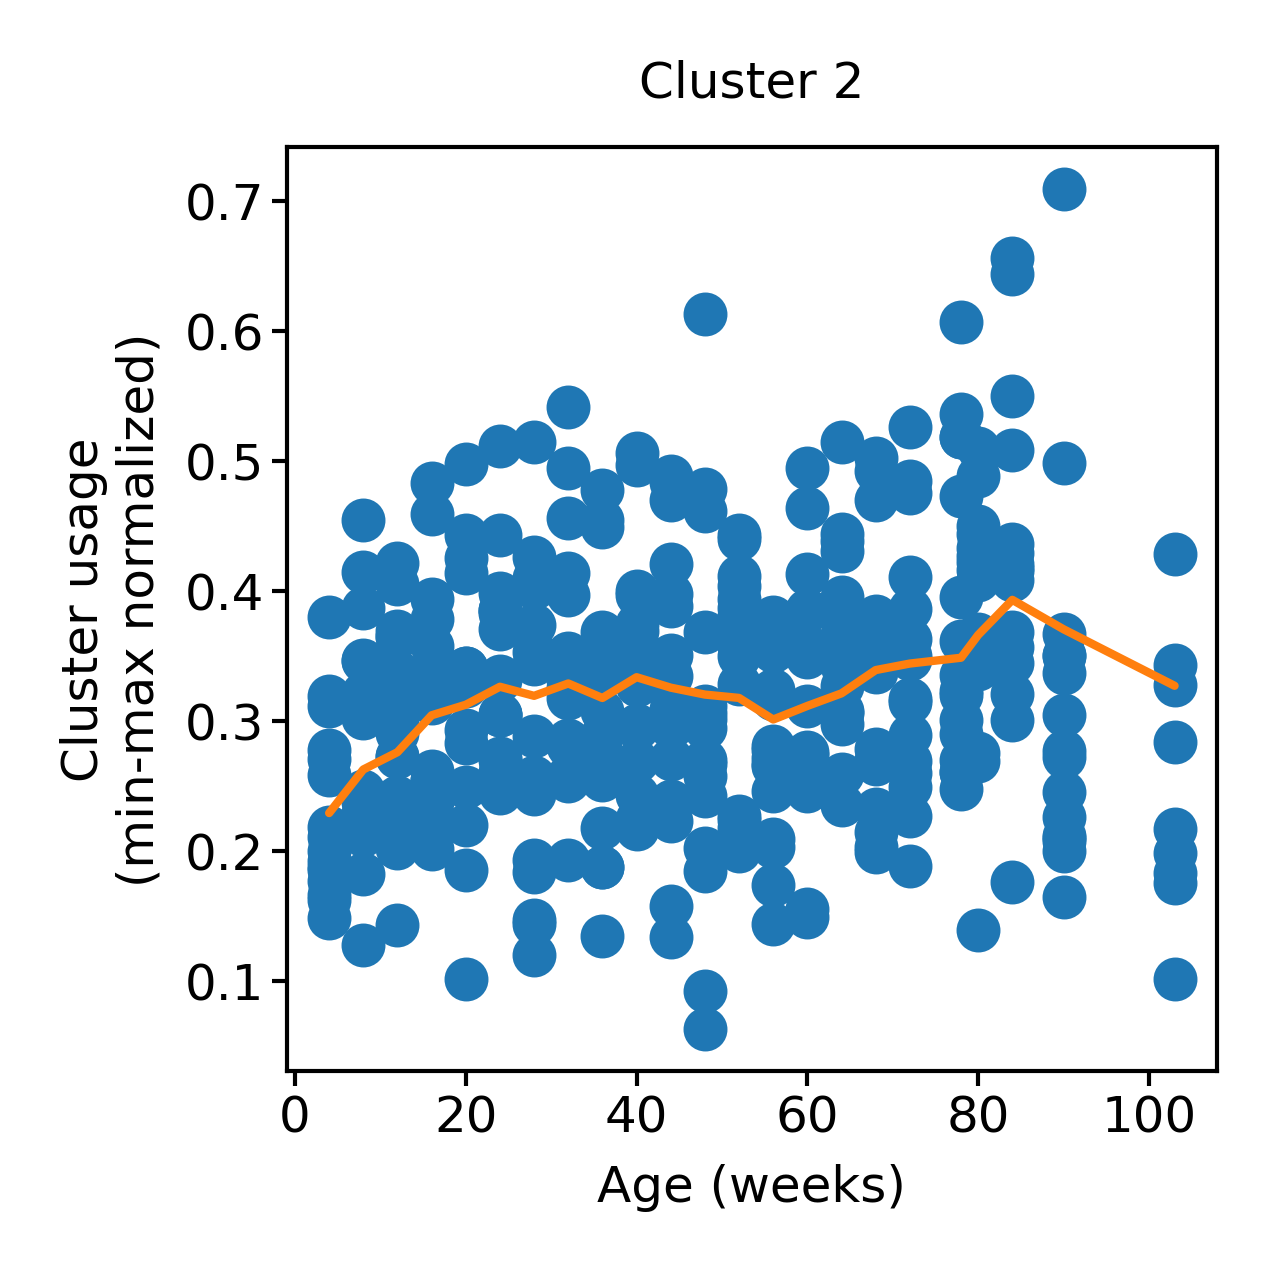

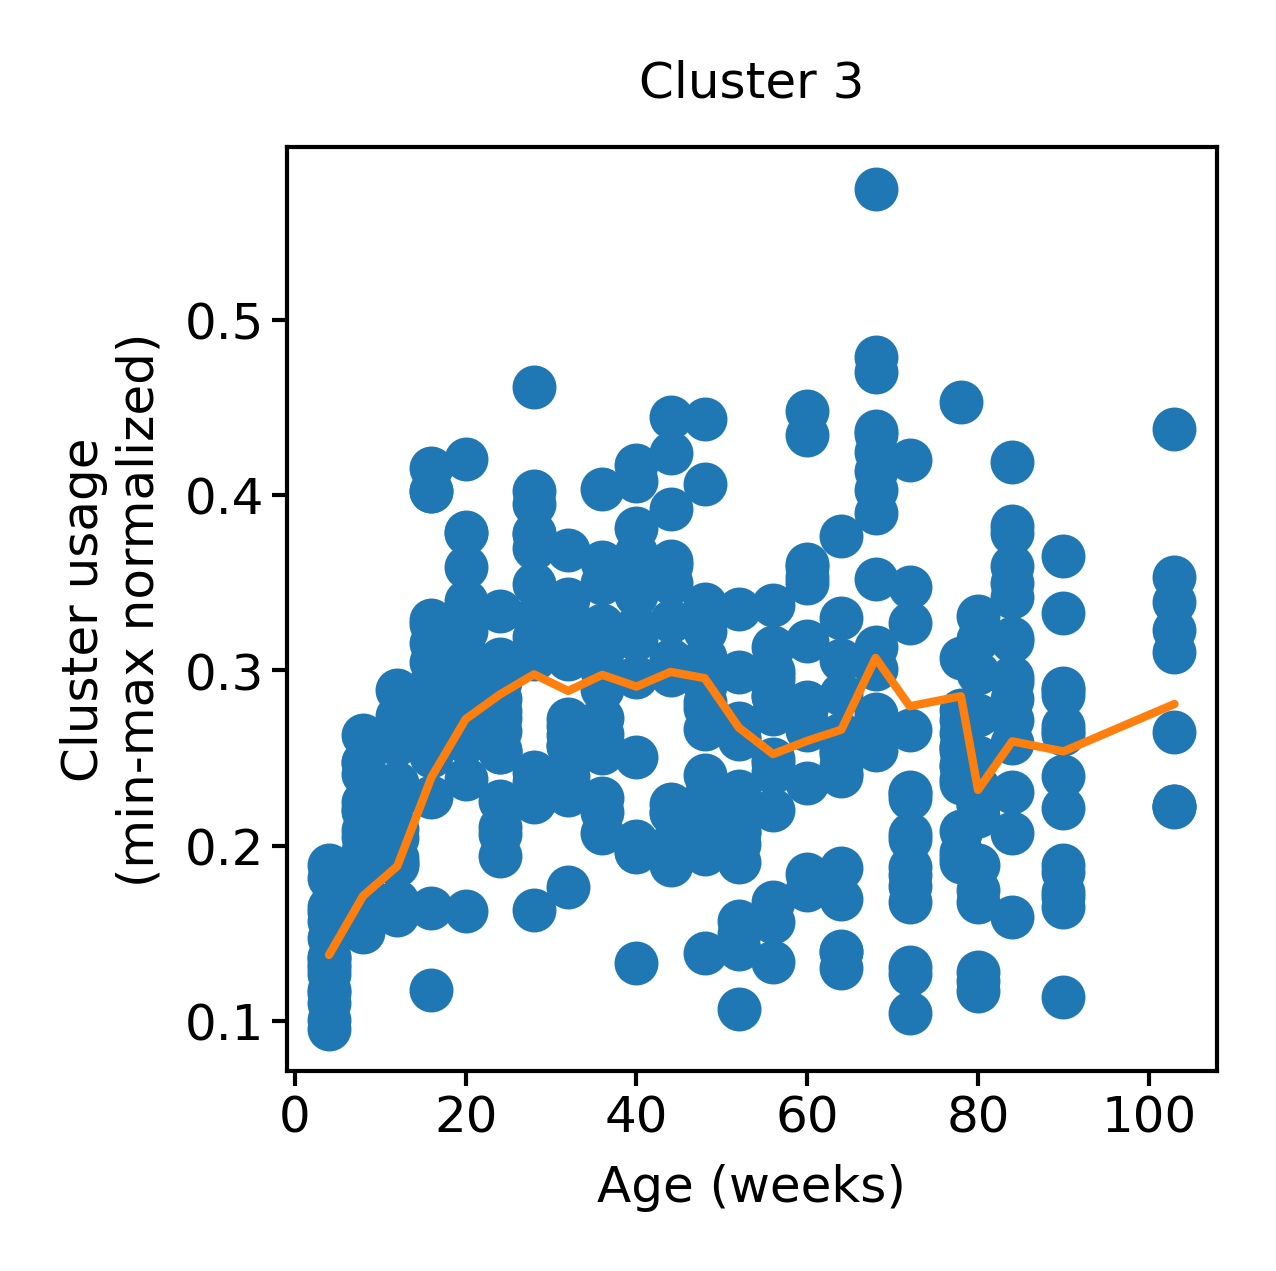

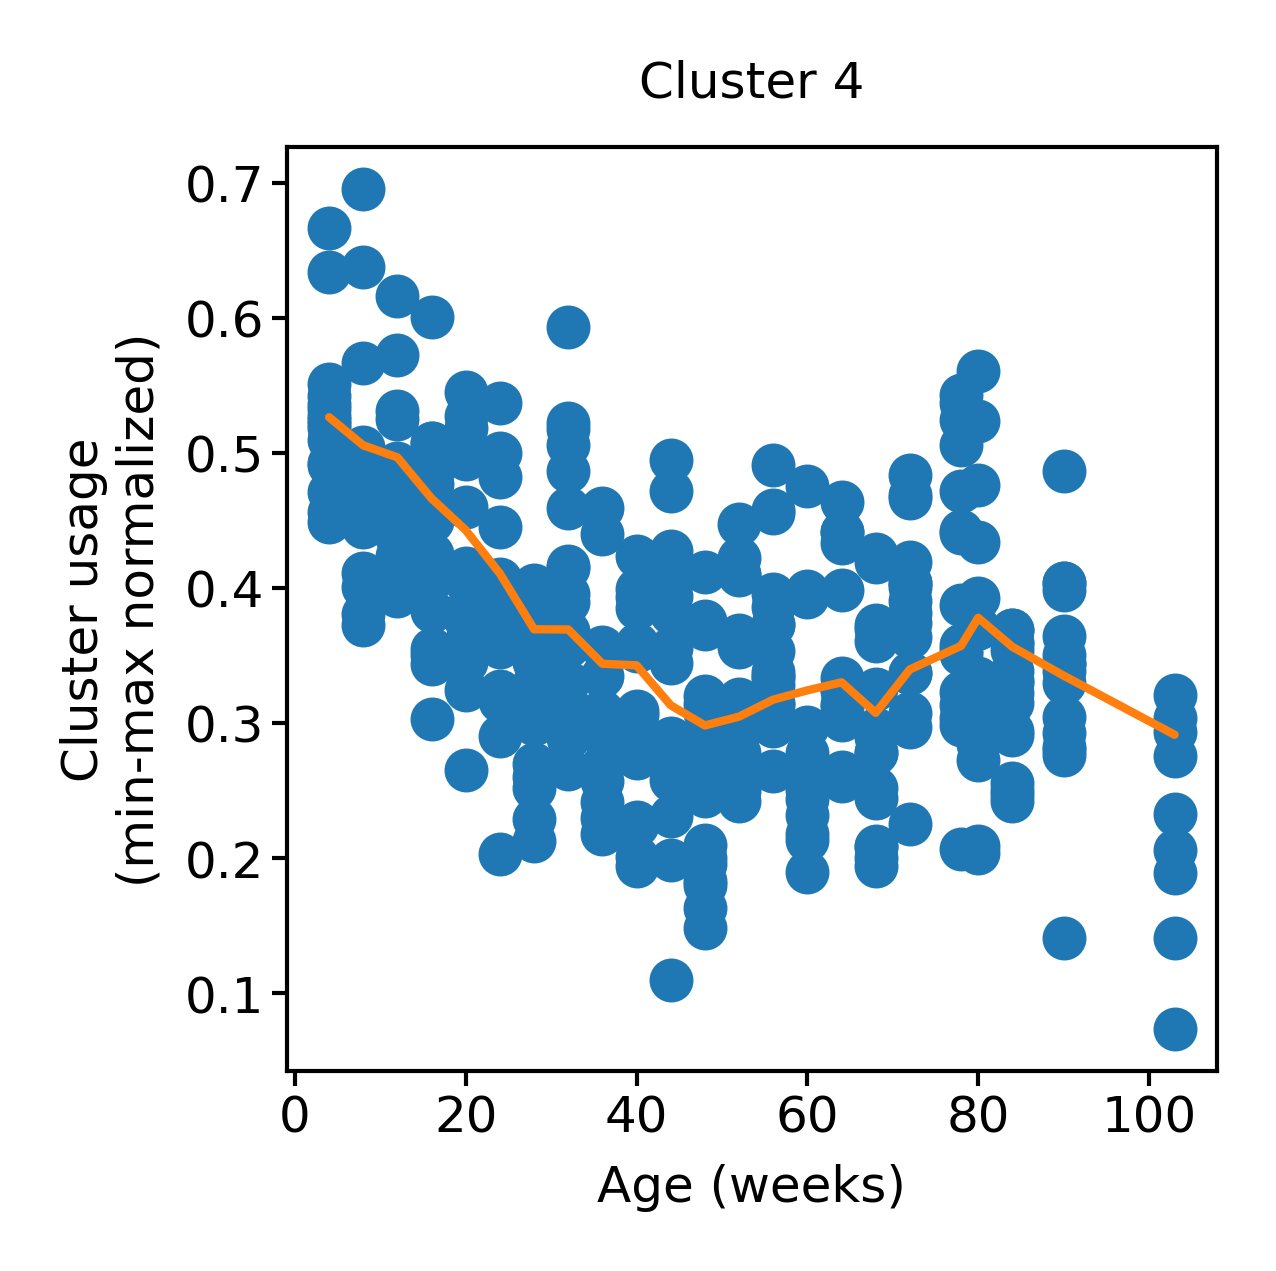

In [7]:
n_clusters = 5
out = k_means(minmax(df).T, n_clusters, random_state=0)
grps = minmax(df).T.groupby(out[1]).mean().T

for i in range(n_clusters):
    fig = figure(2, 2)
    ax = fig.gca()
    ax = grps.reset_index().plot(x='age', kind='scatter', y=i, ax=ax)
    ax = grps.groupby('age')[i].mean().rolling(3, min_periods=1).mean().plot(ax=ax, c='C1')
    ax.set(title=f"Cluster {i}", xlabel="Age (weeks)", ylabel="Cluster usage\n(min-max normalized)") 

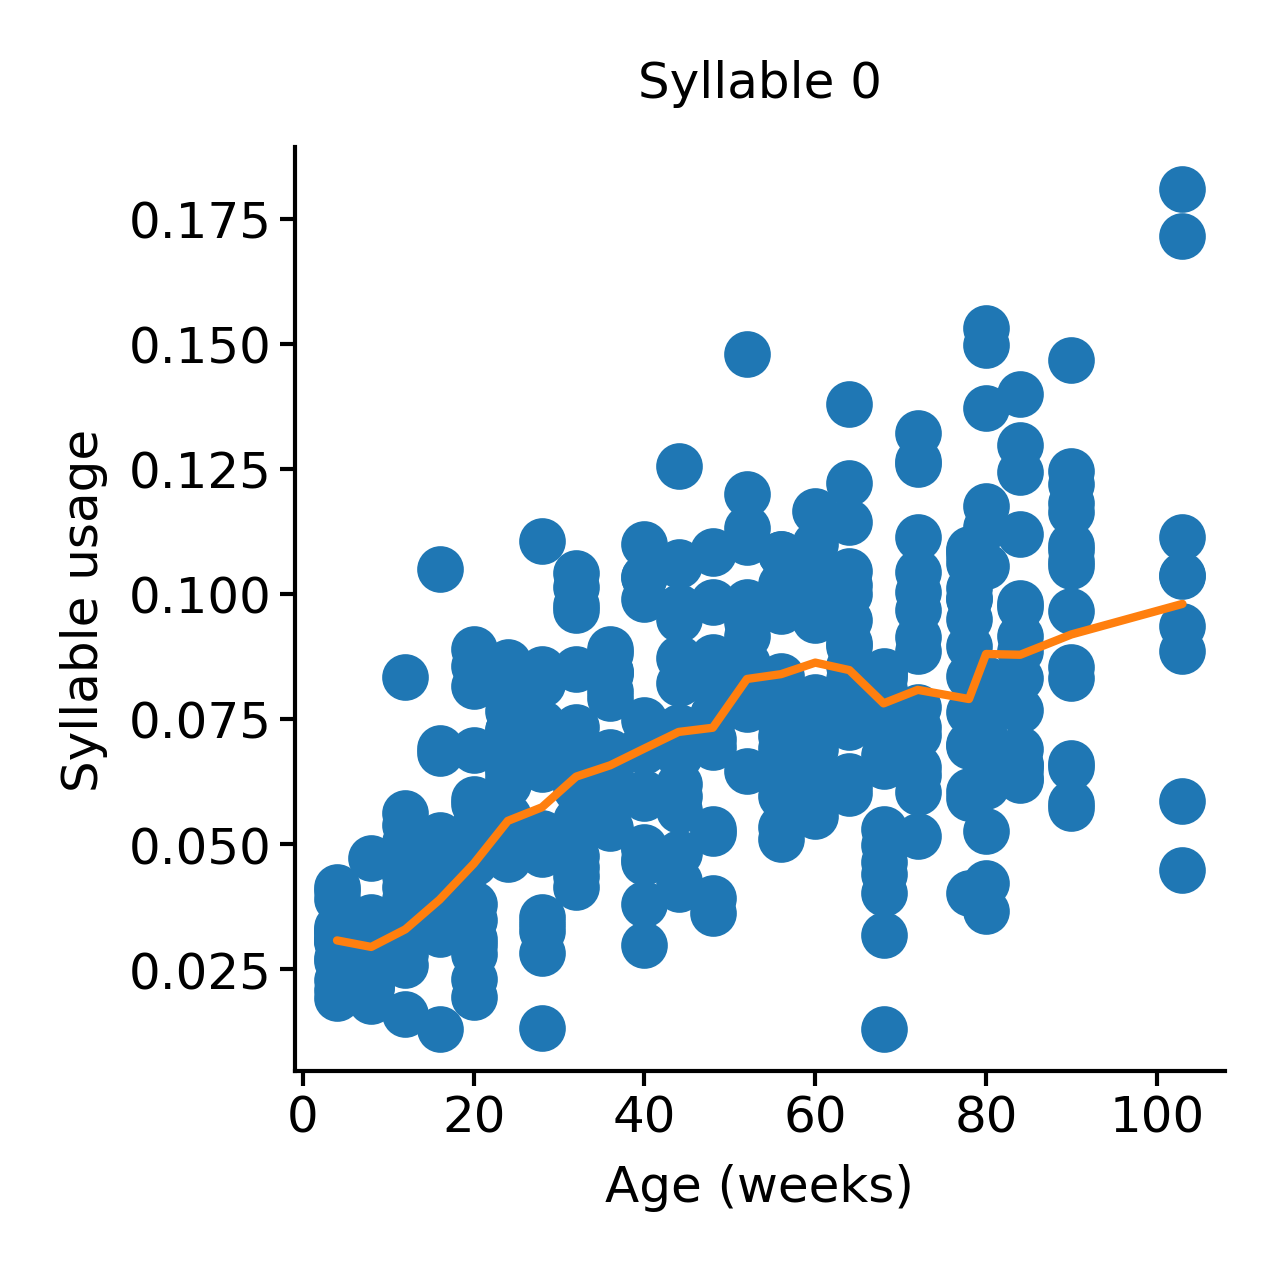

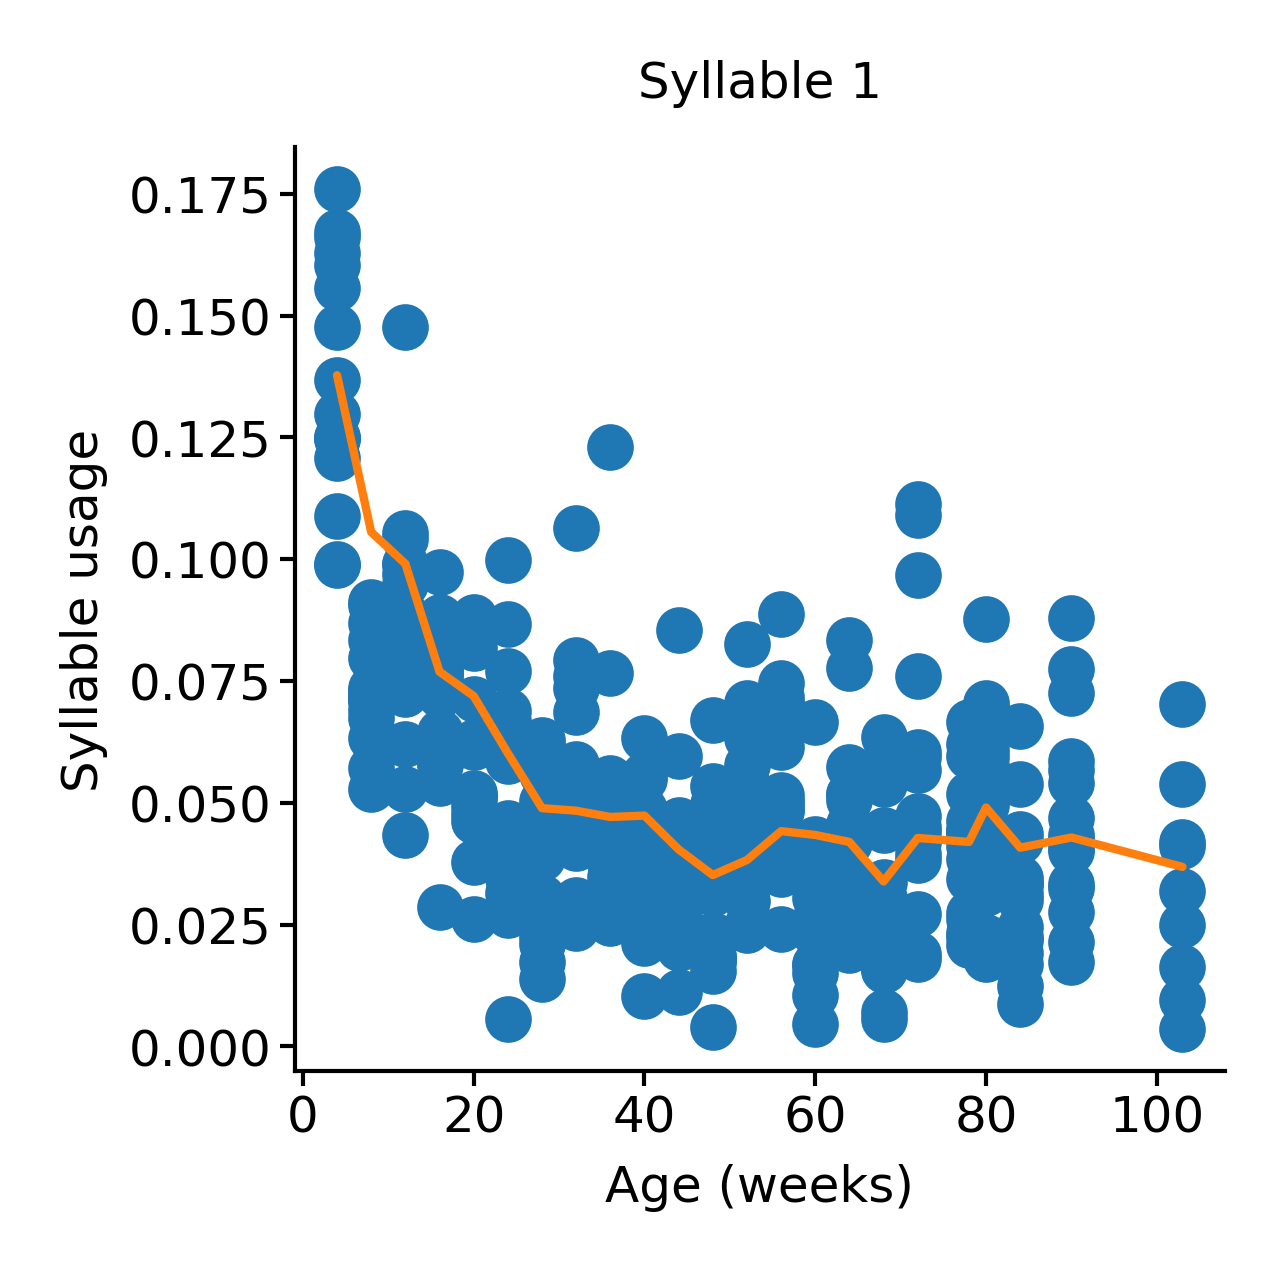

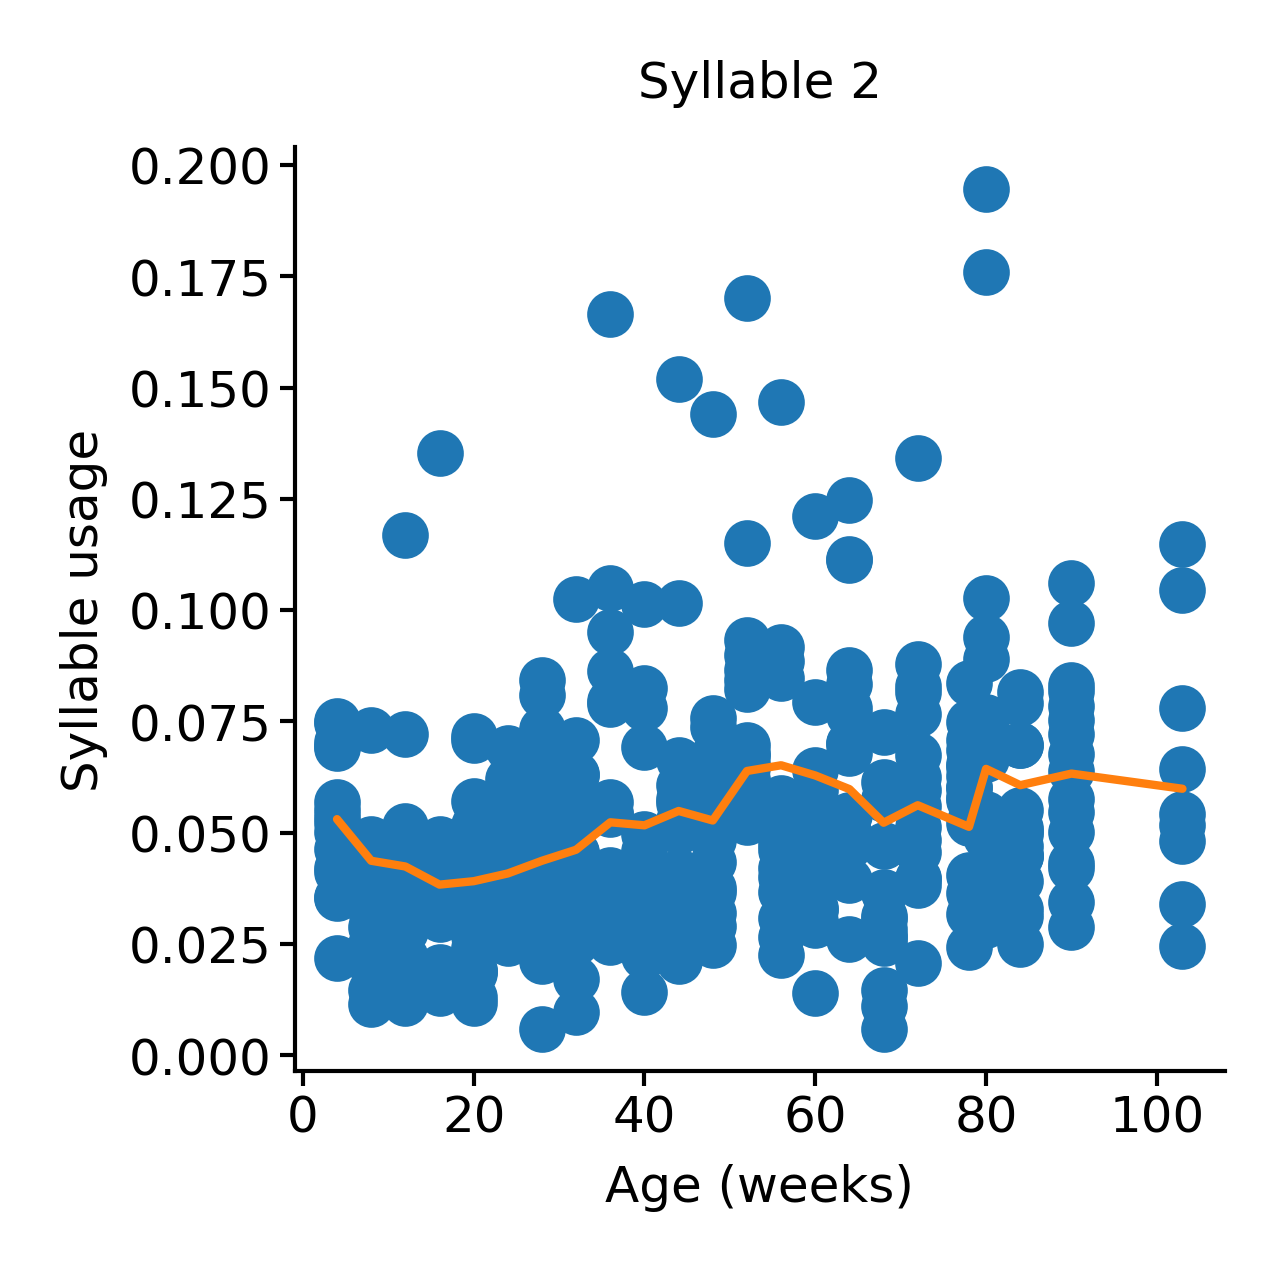

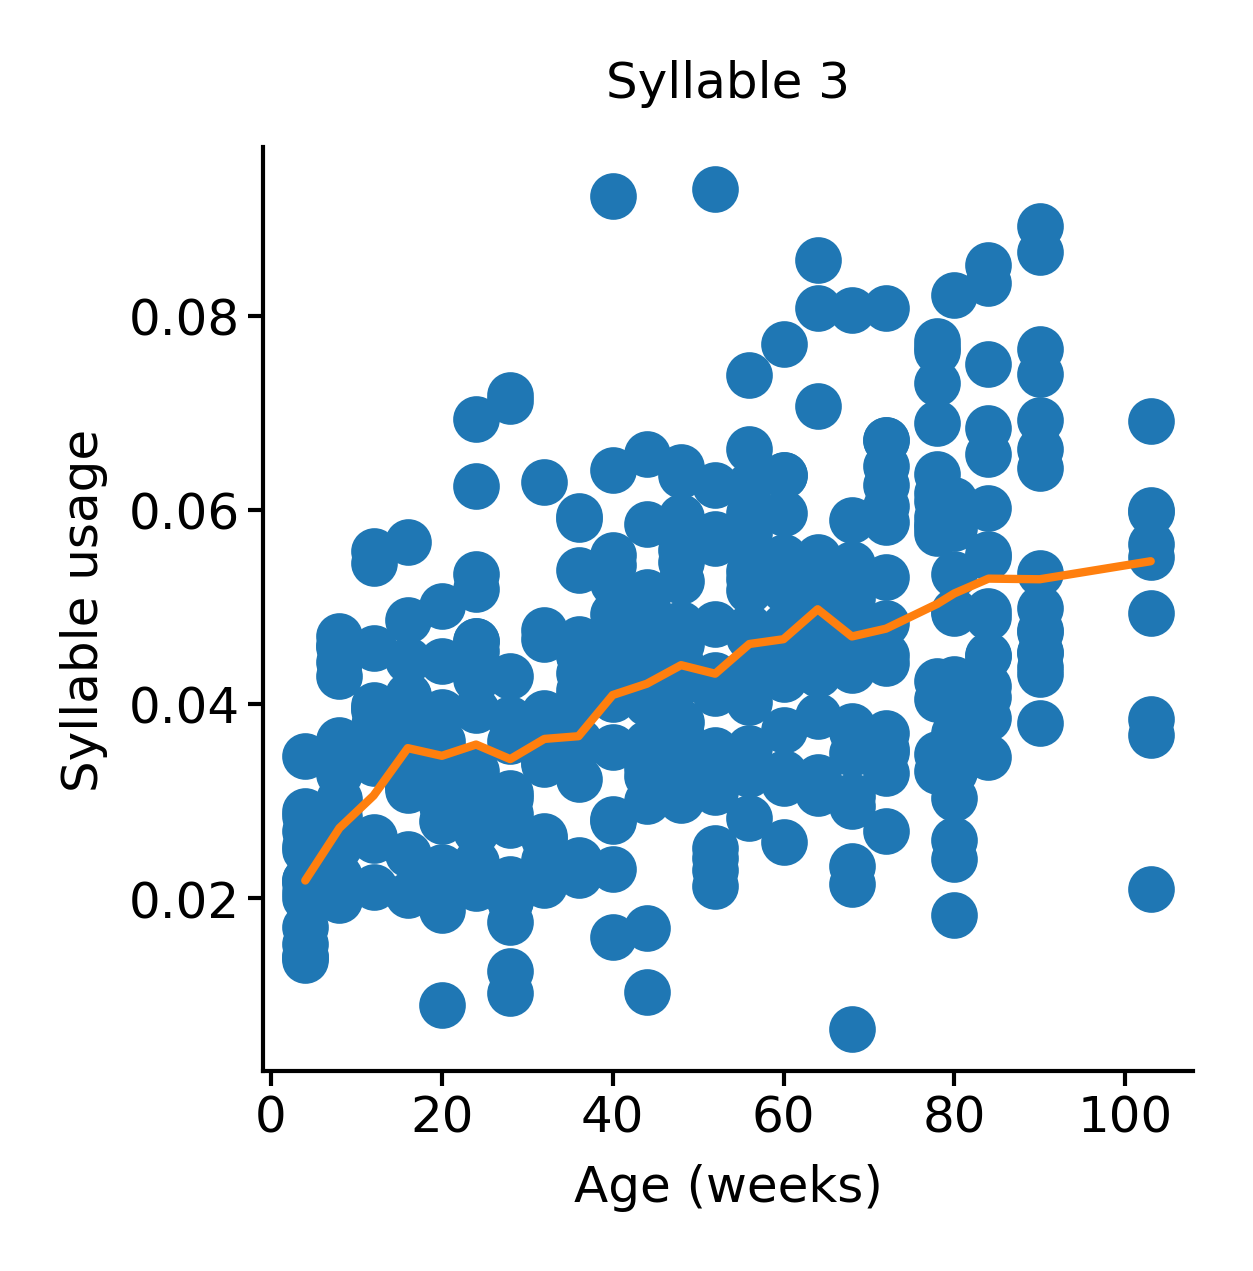

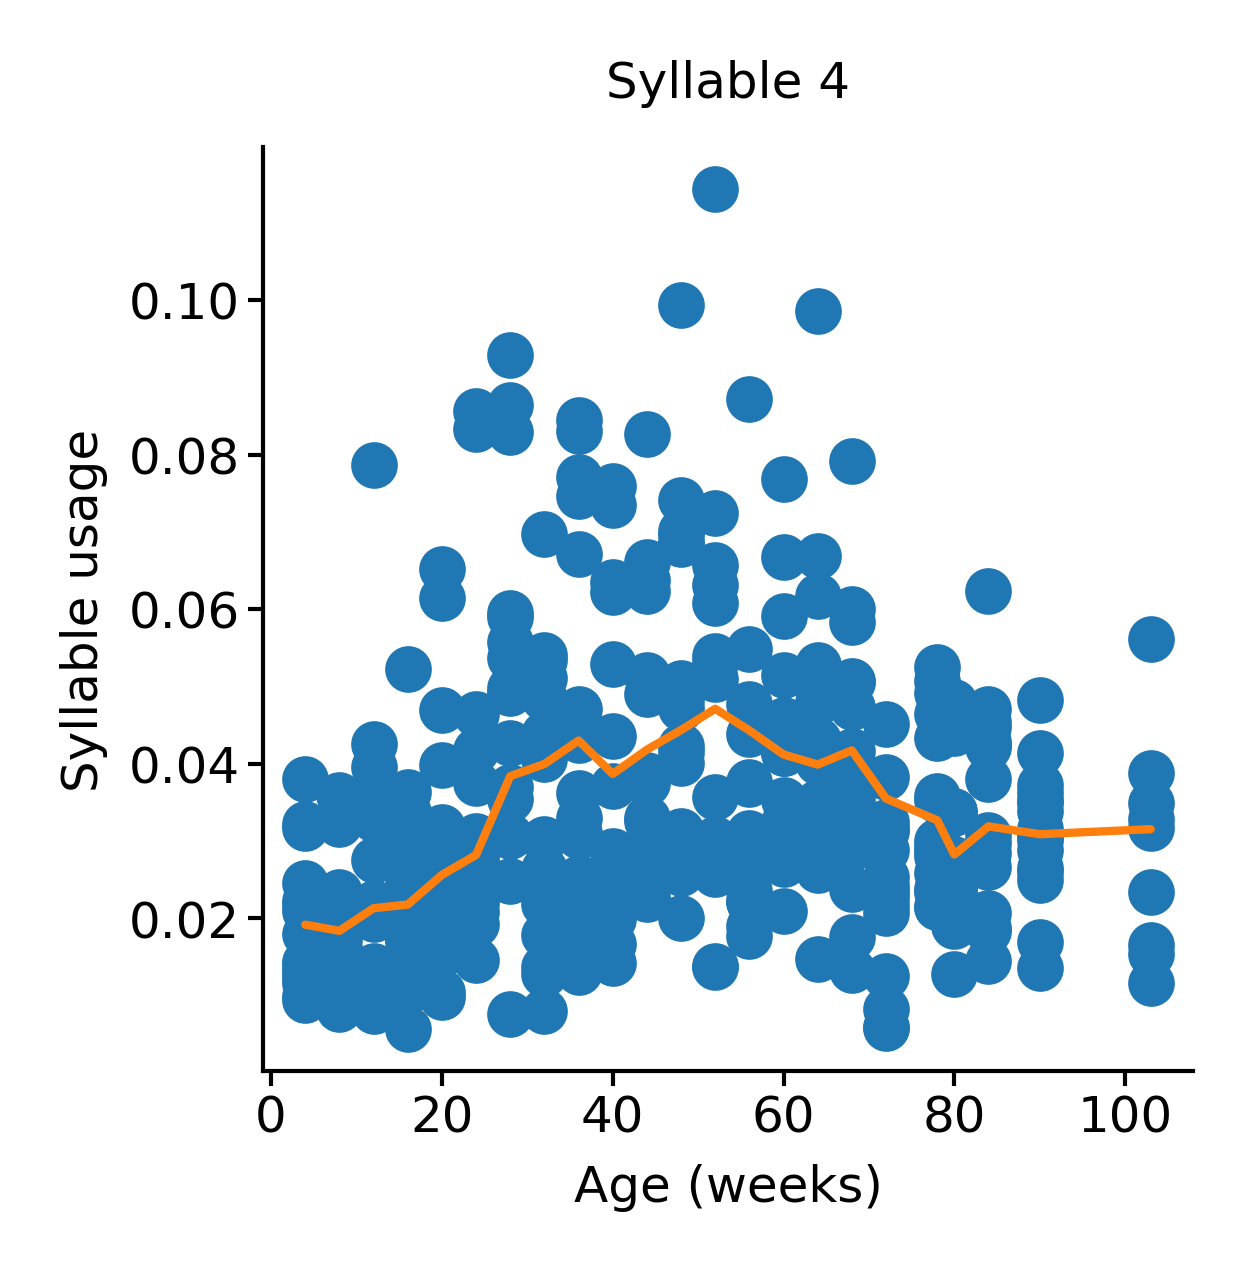

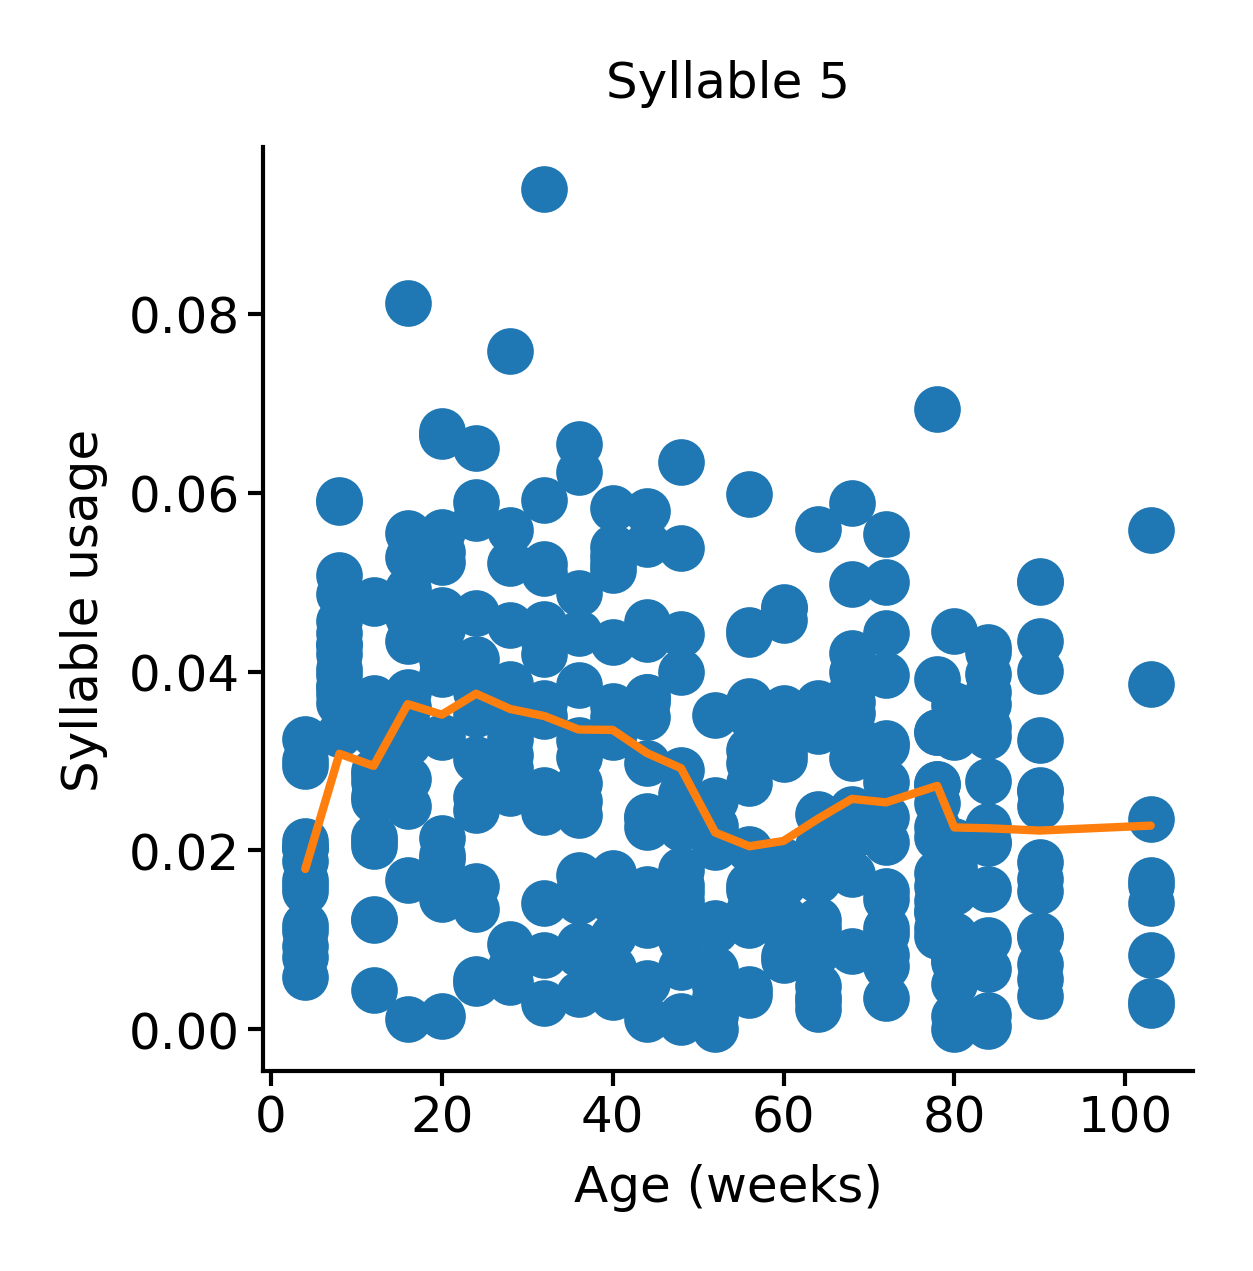

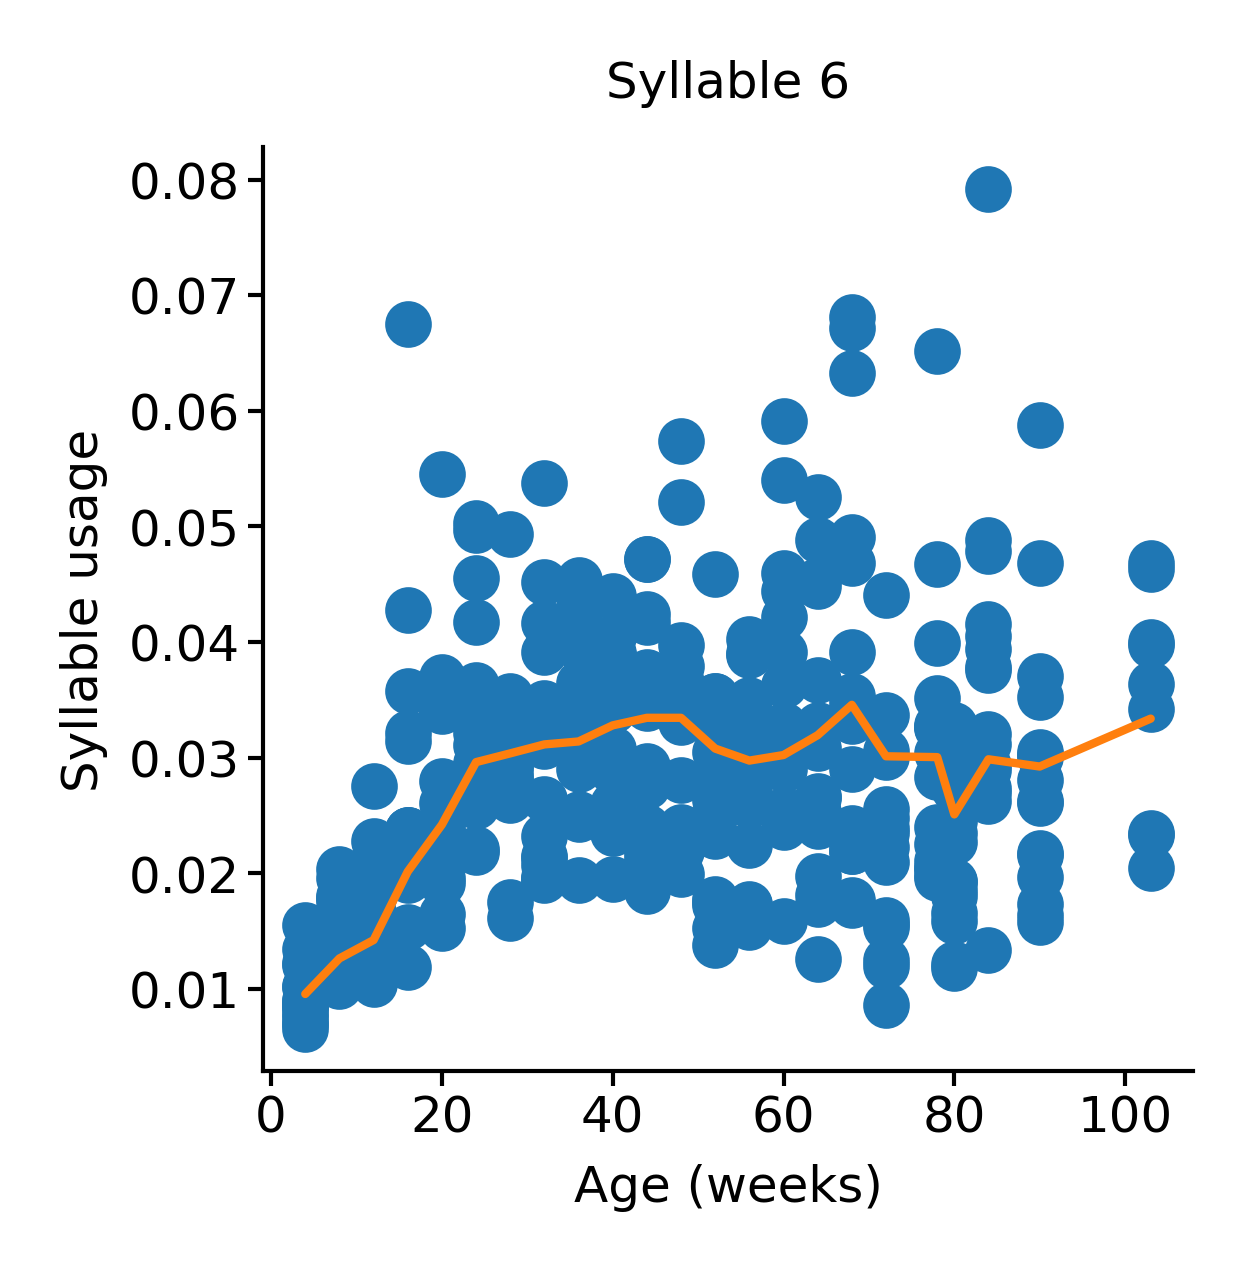

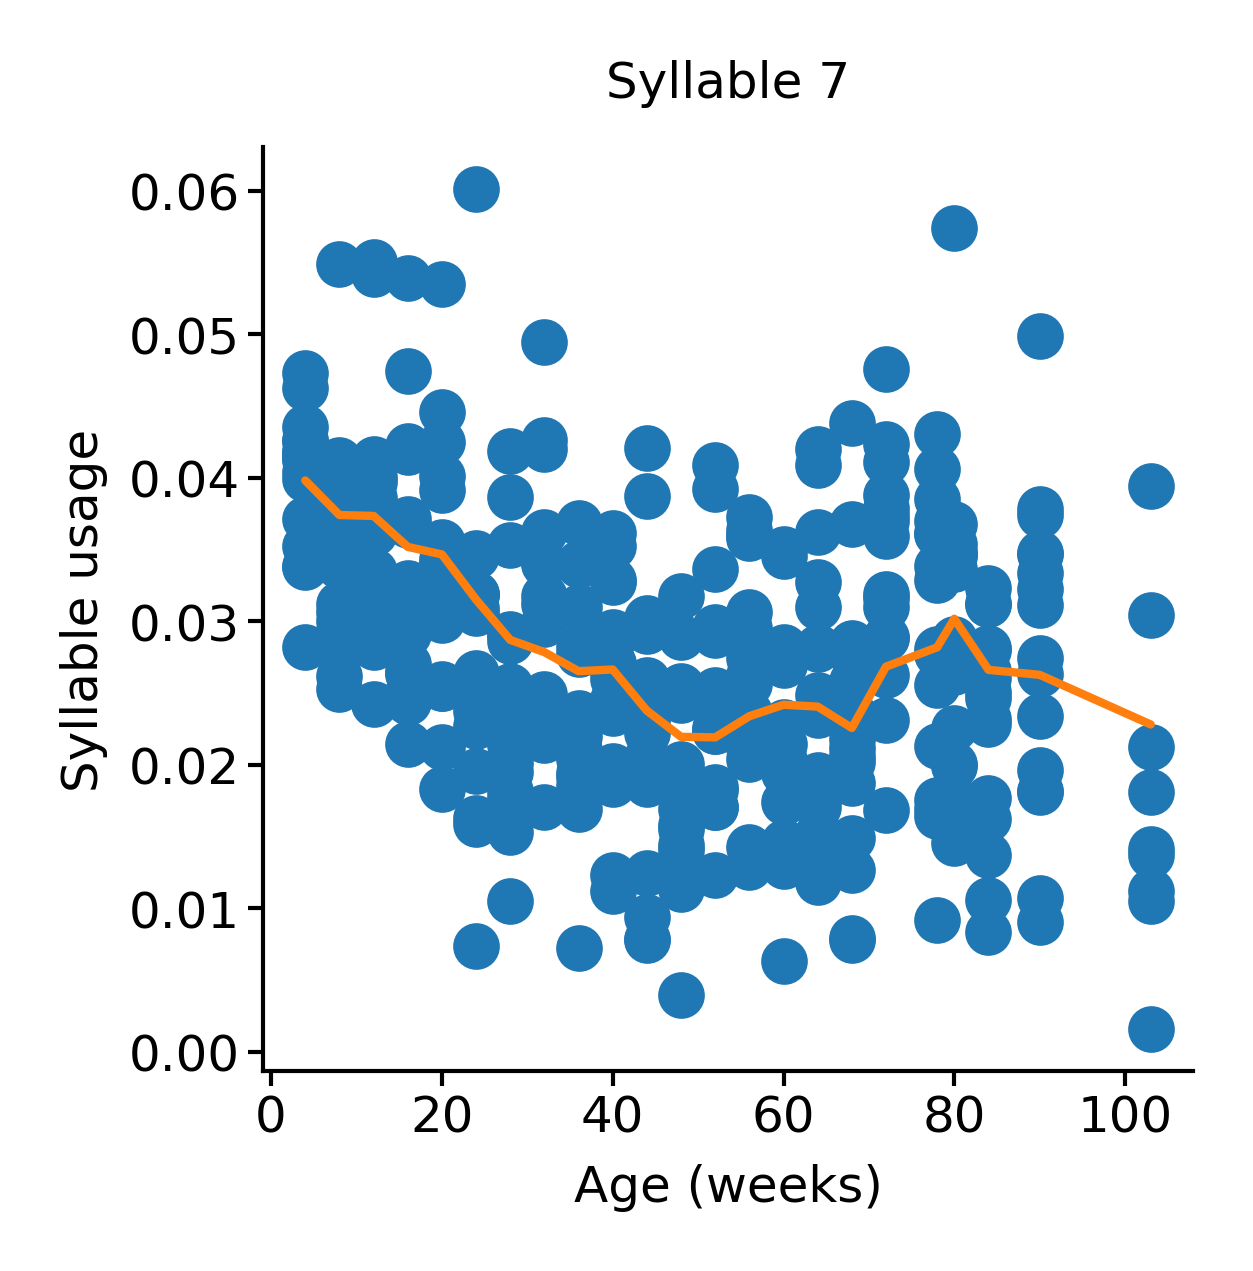

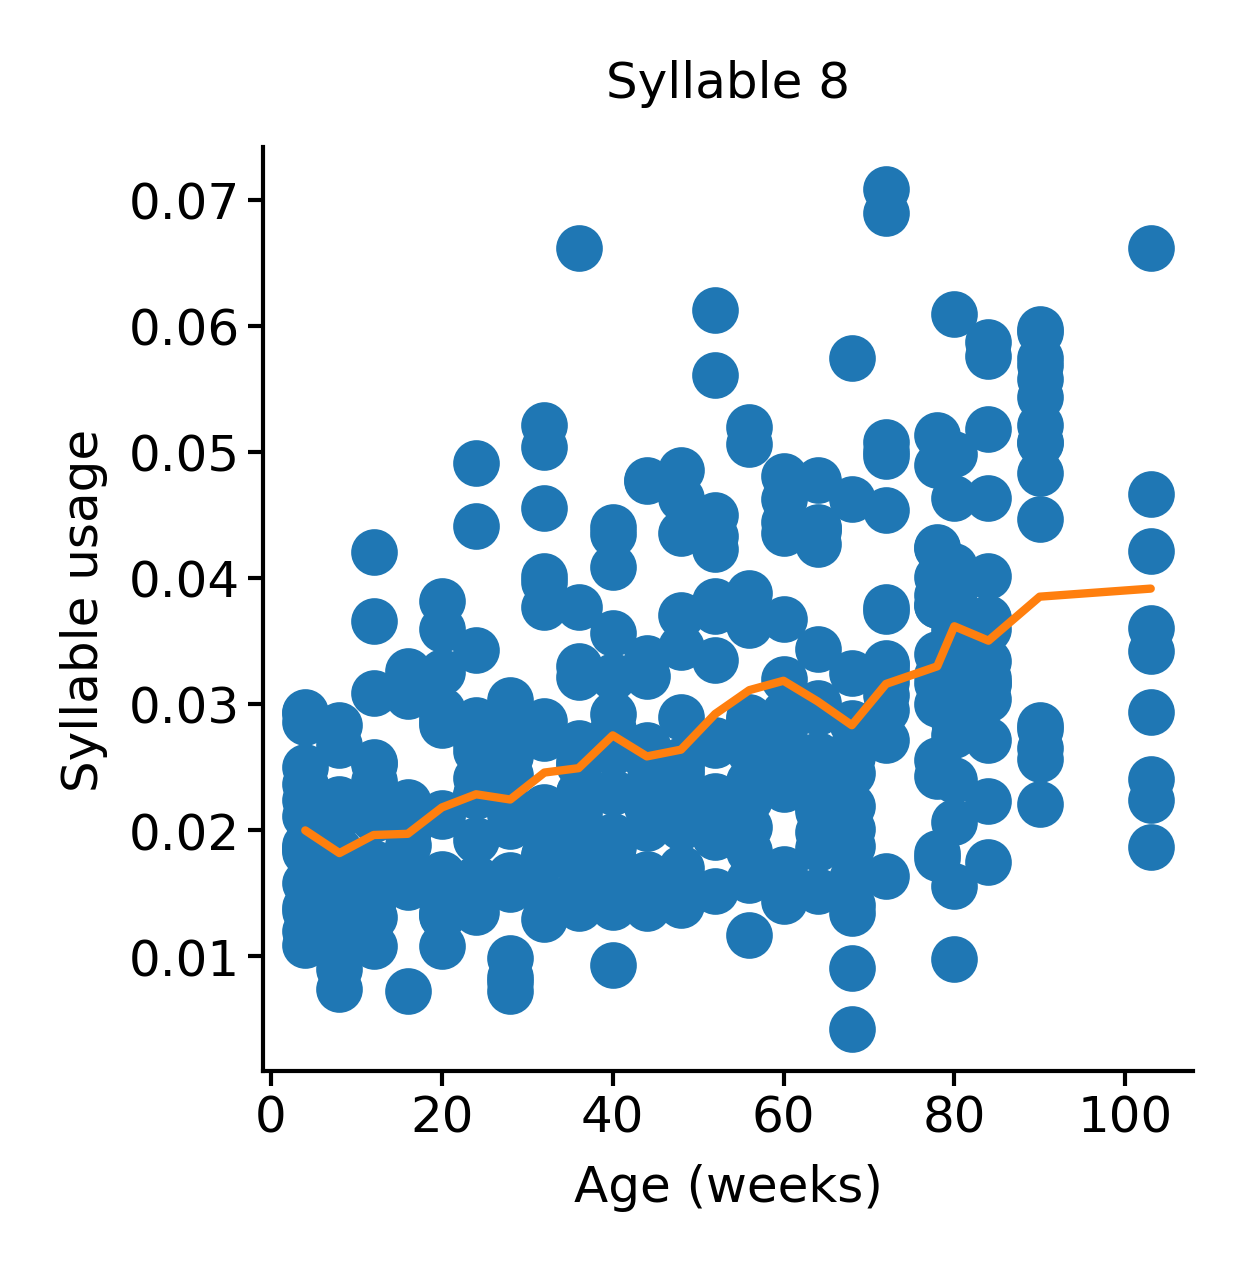

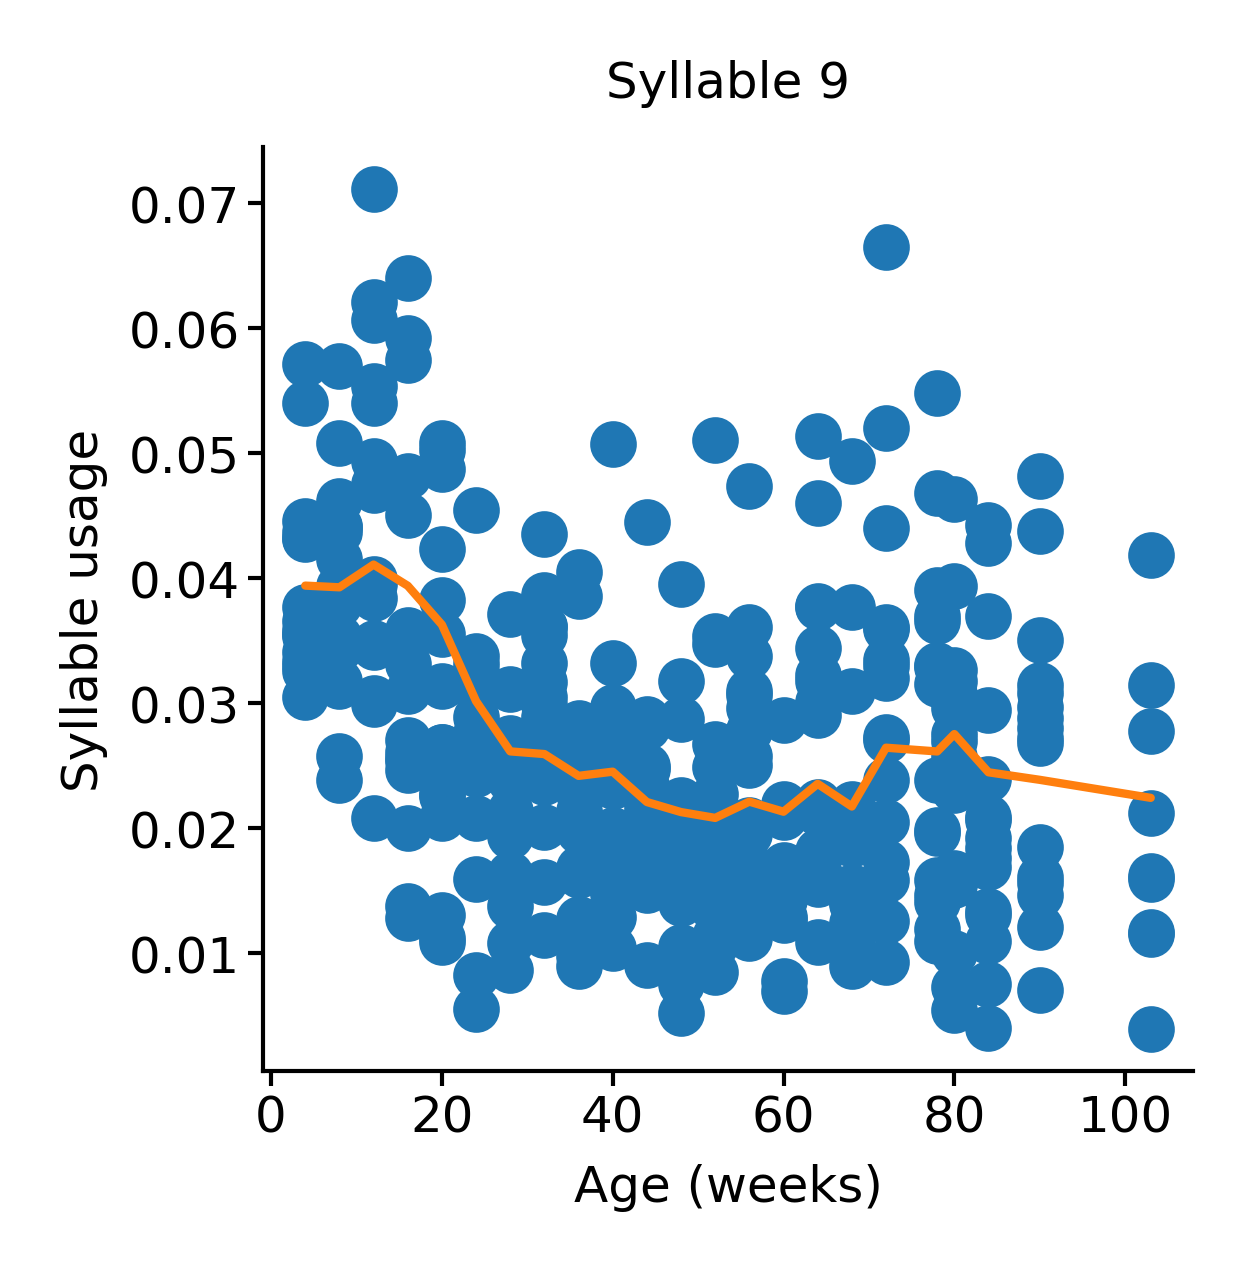

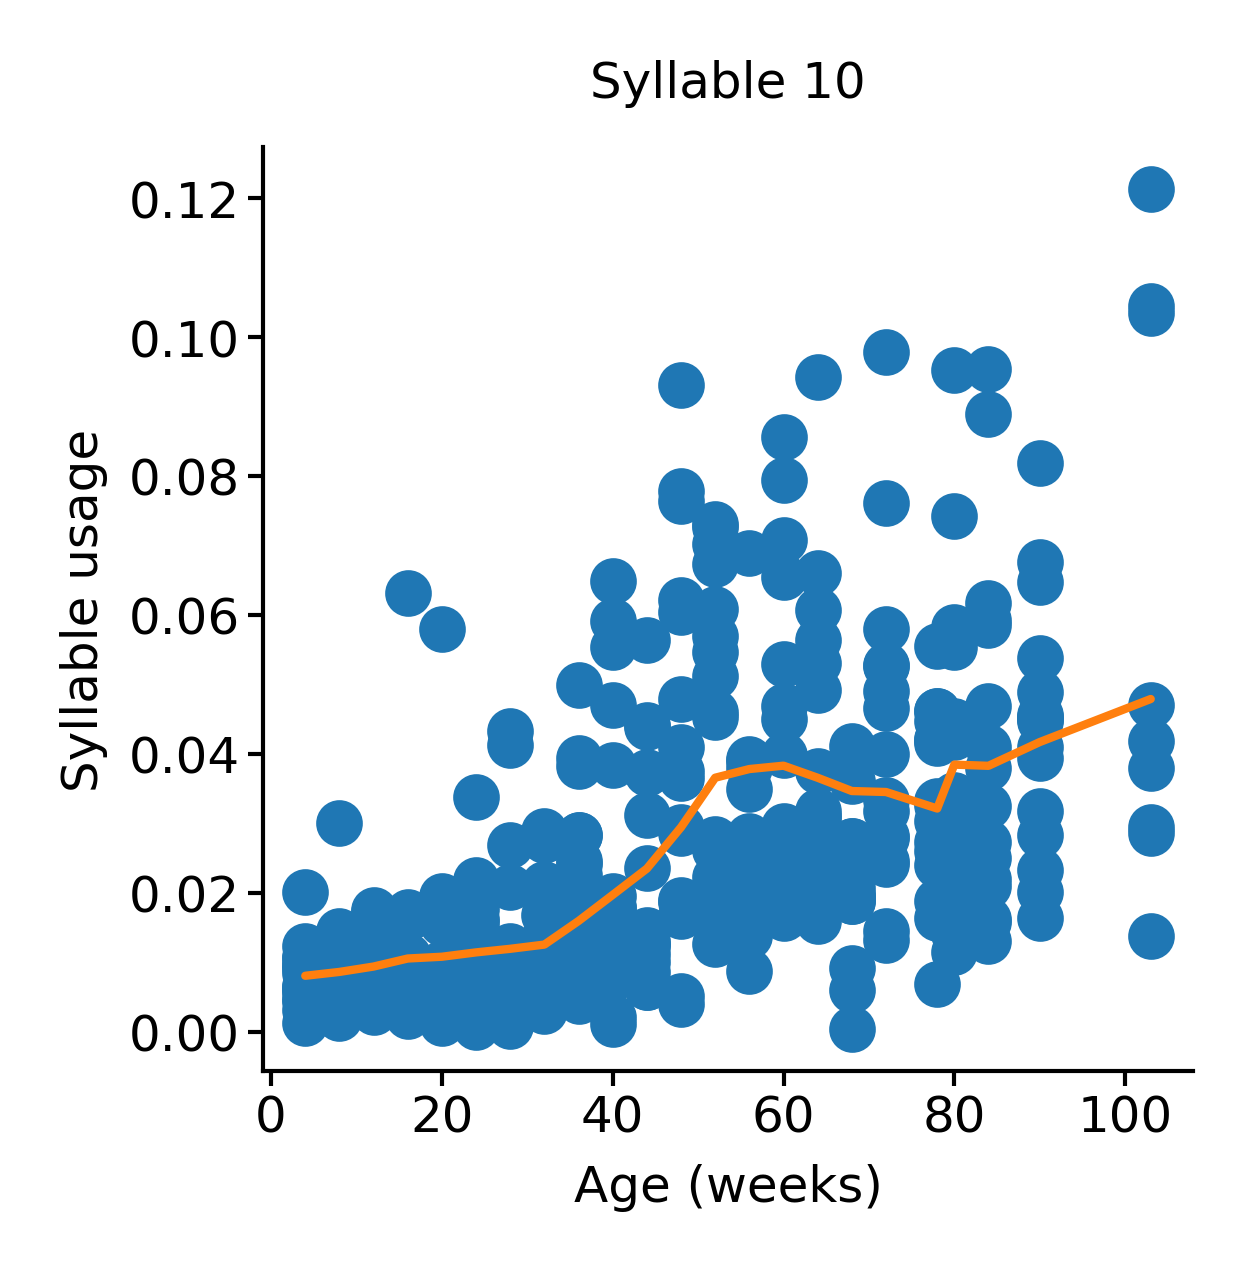

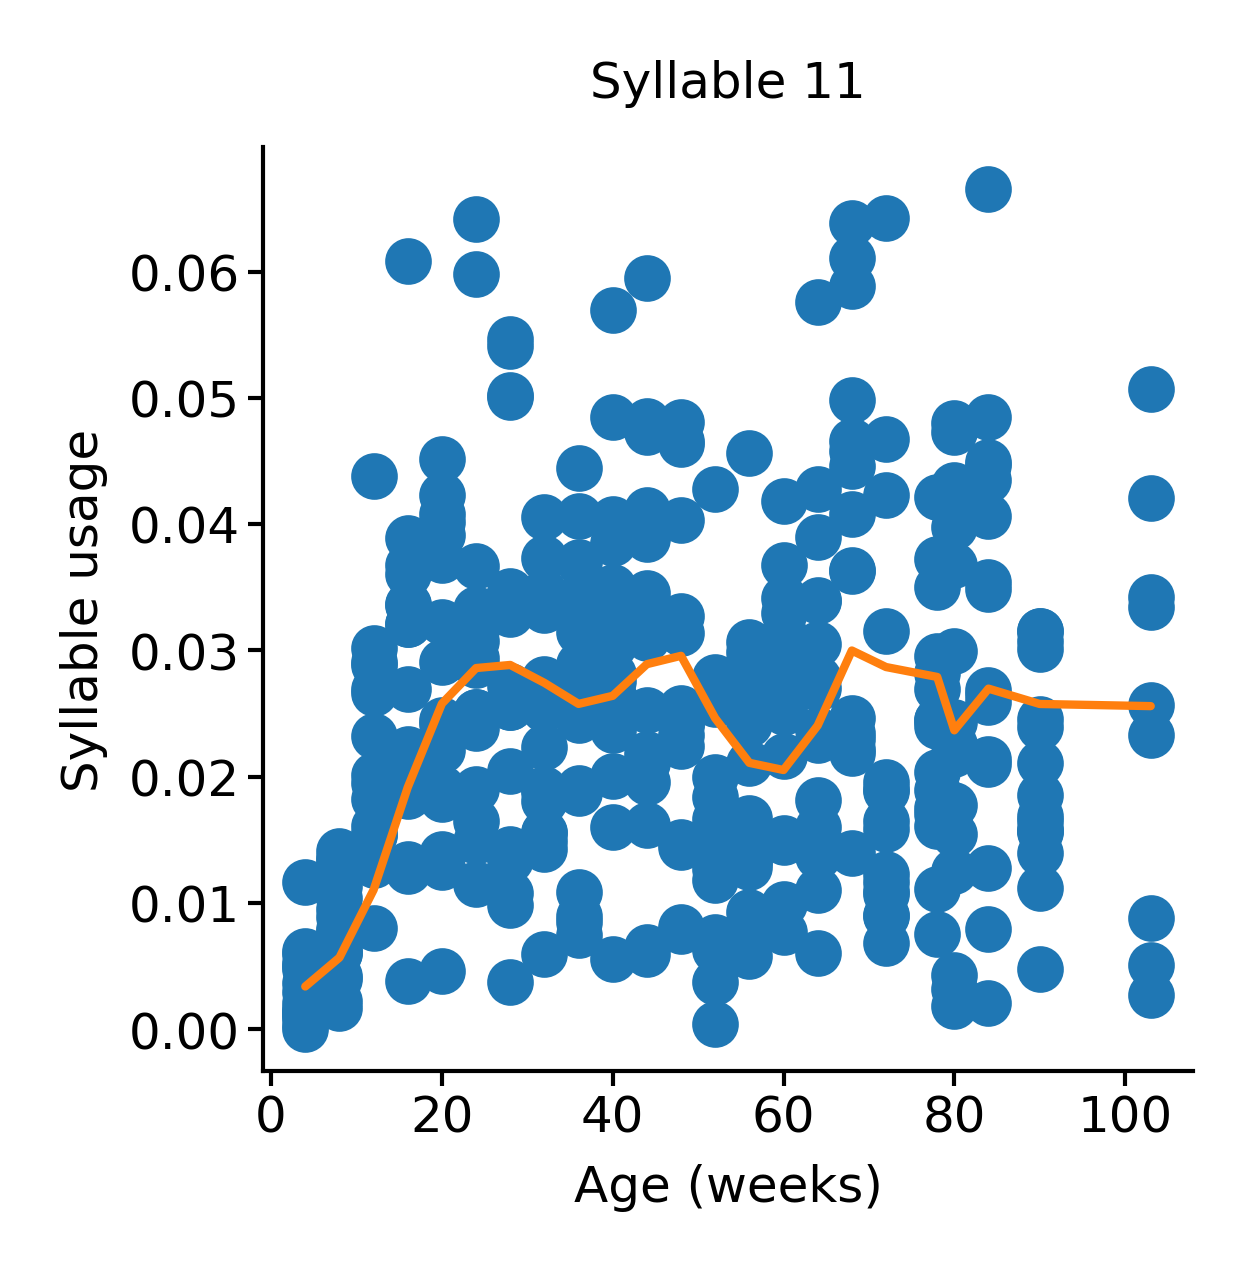

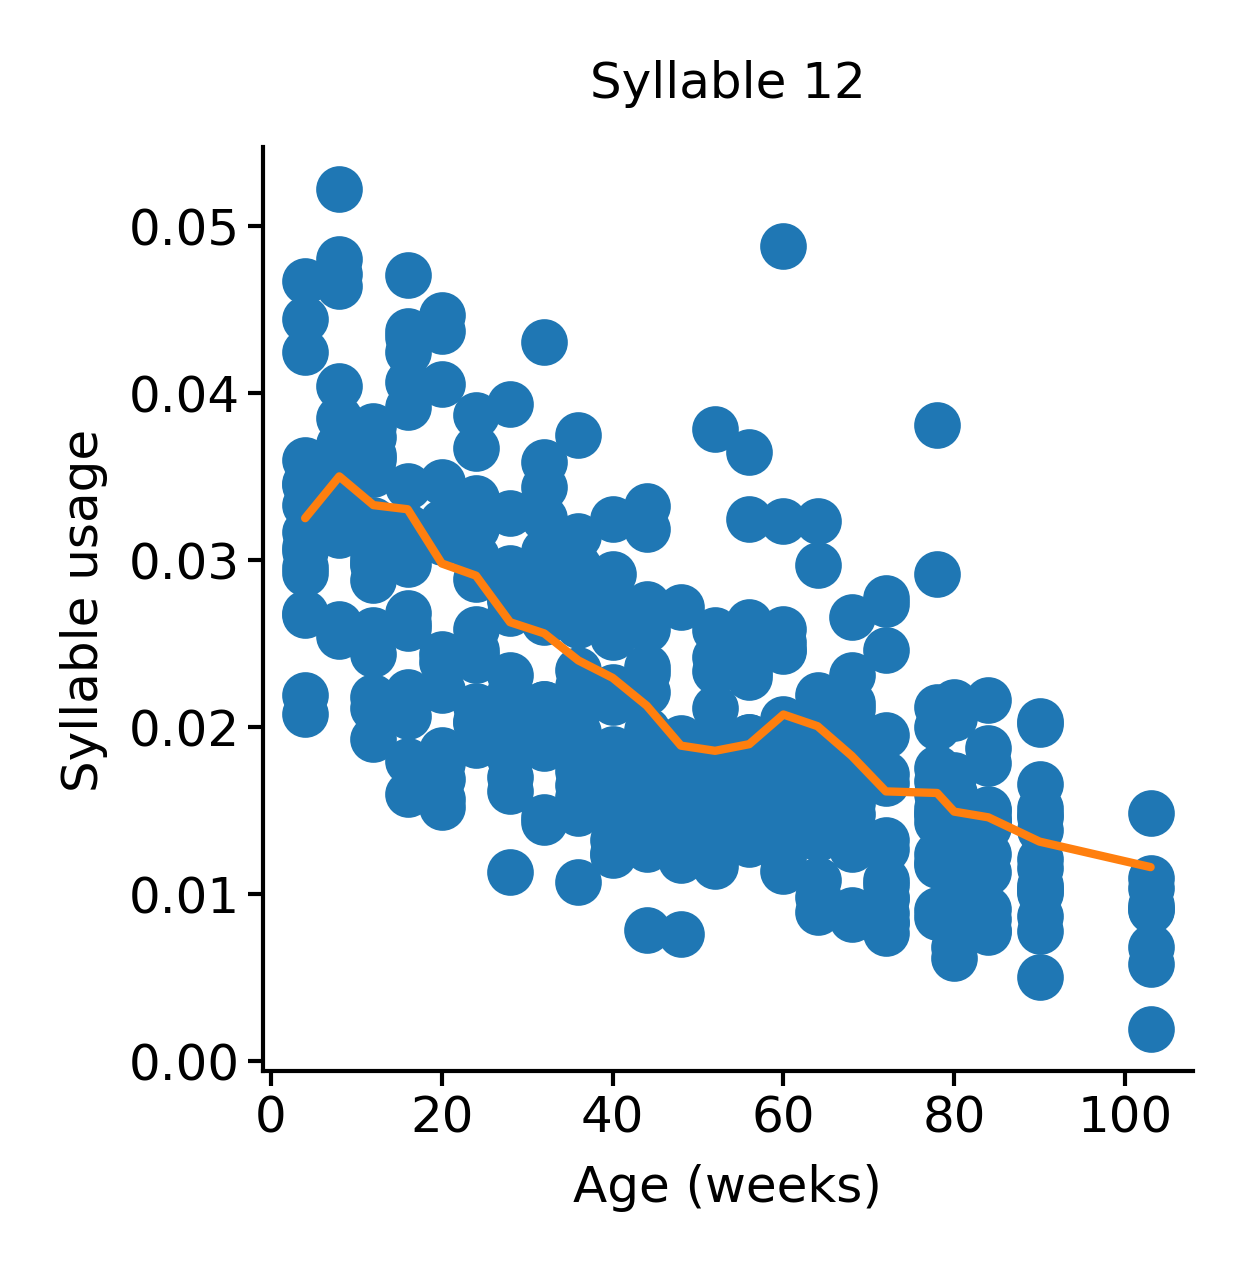

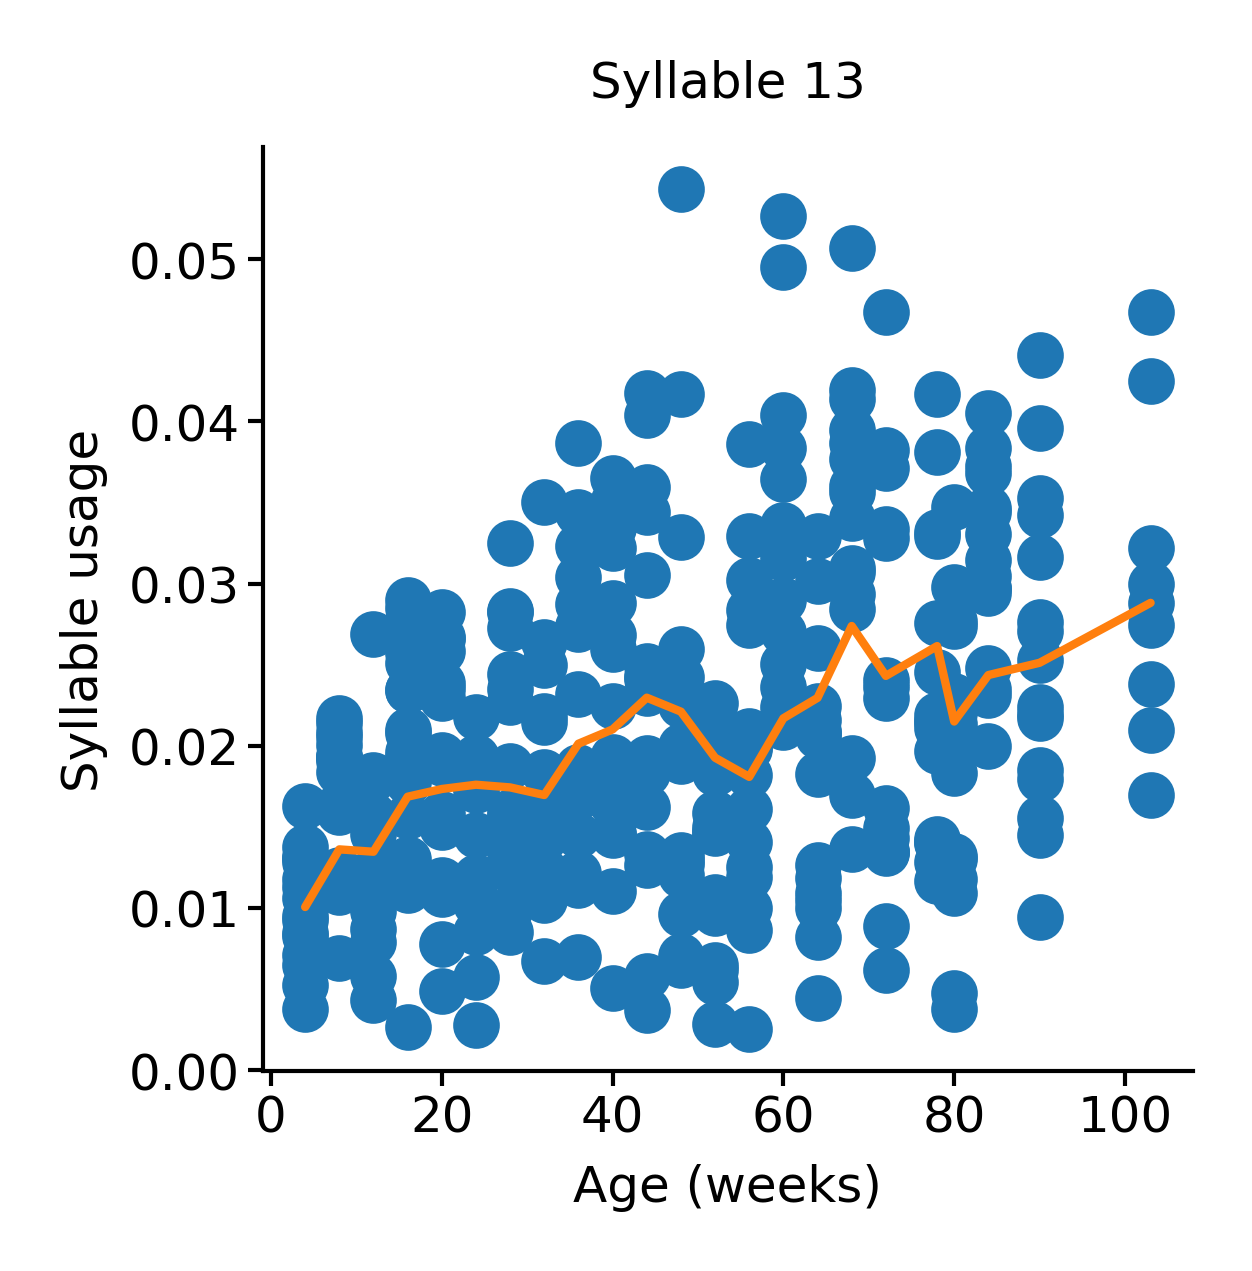

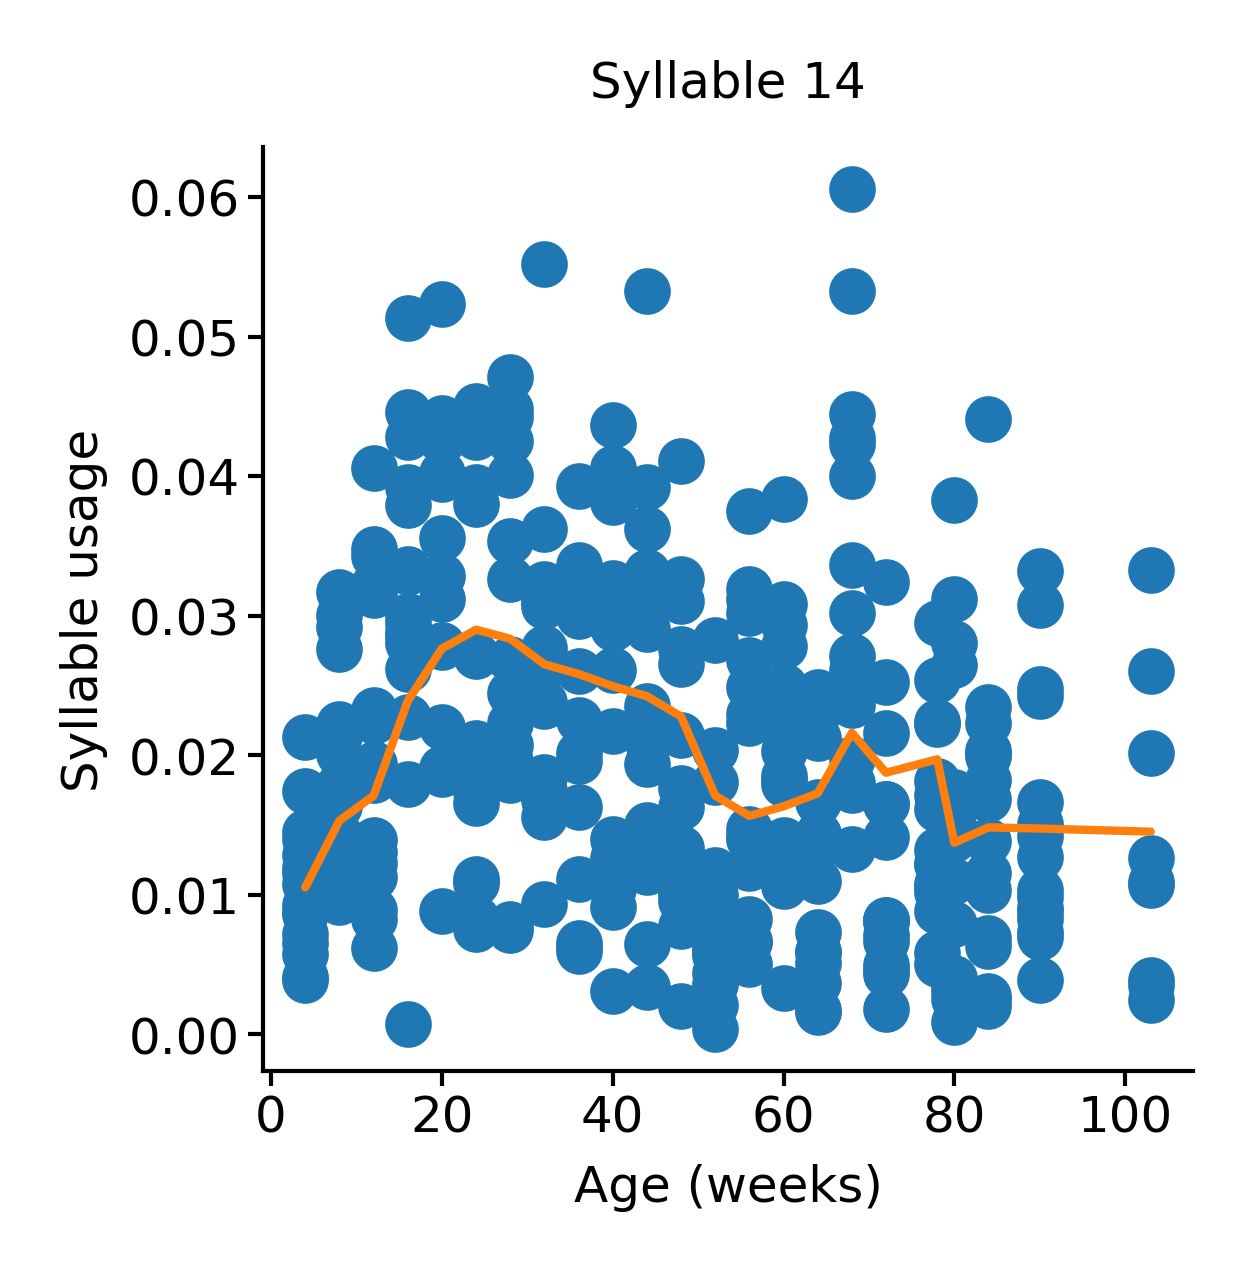

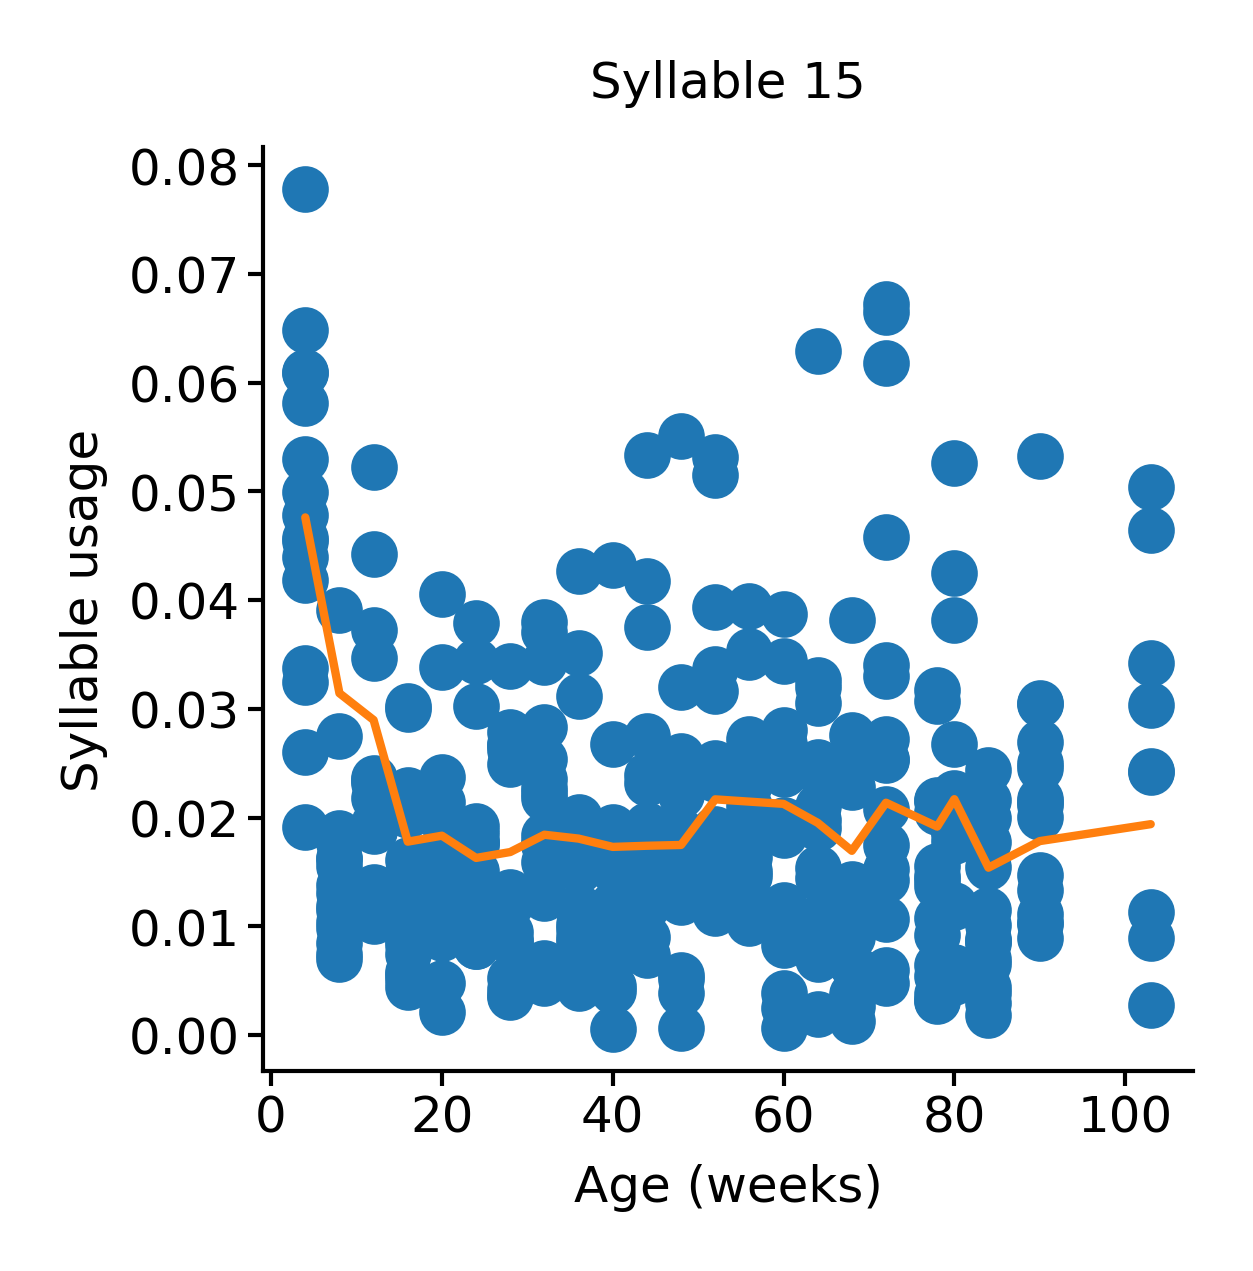

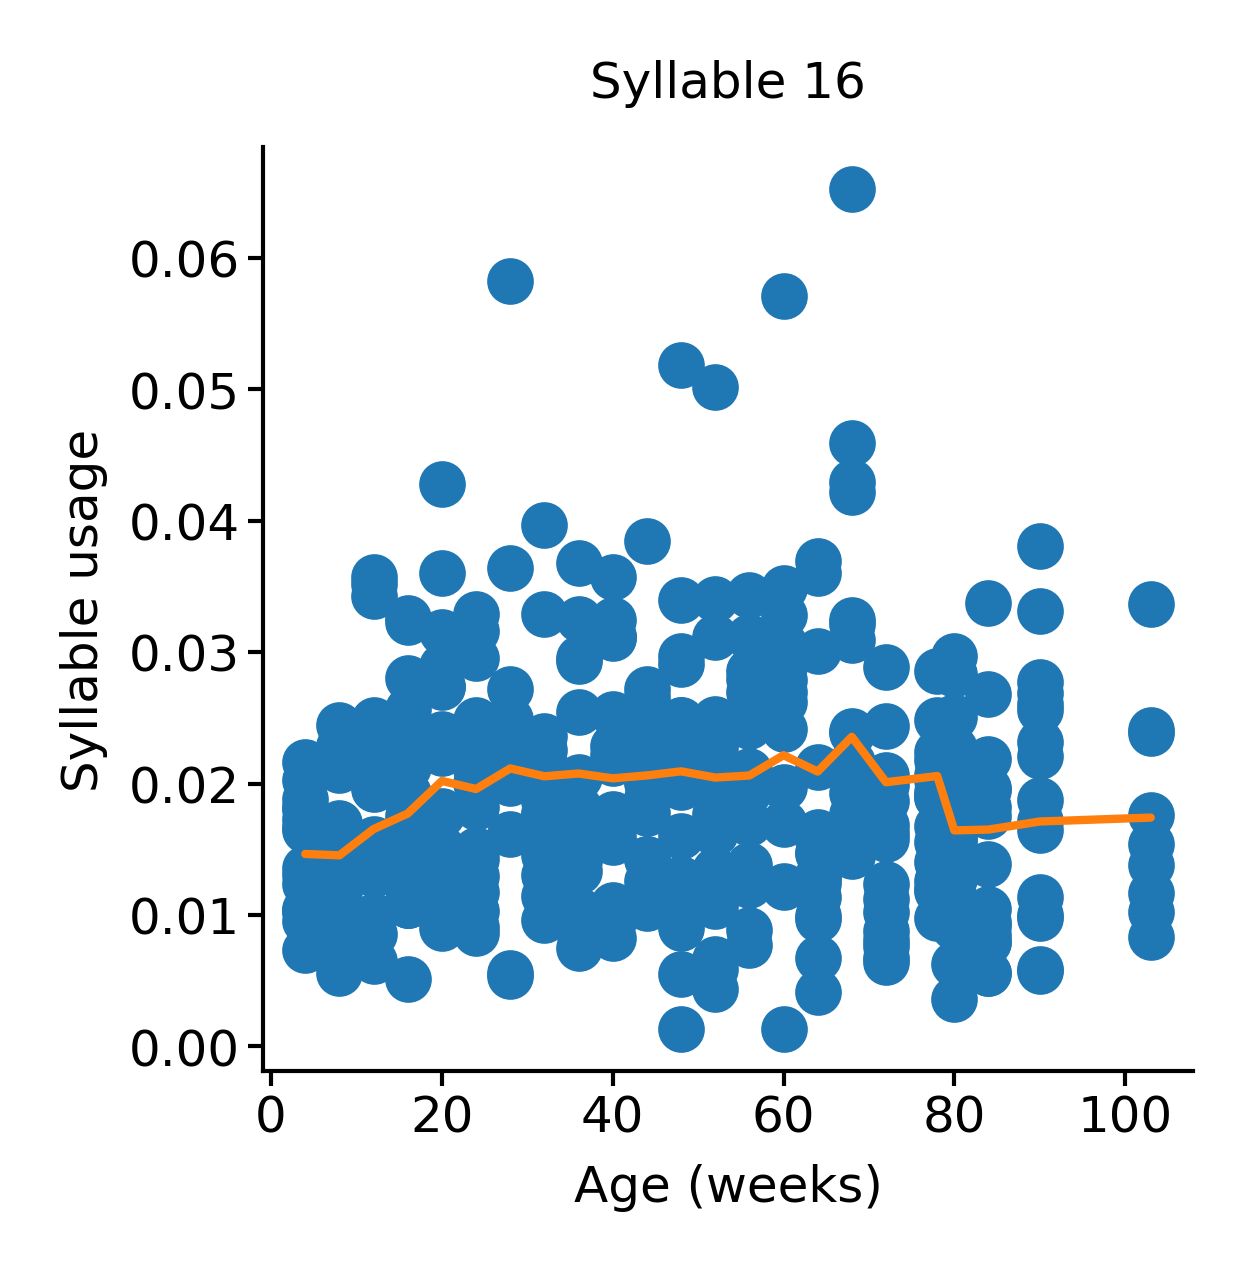

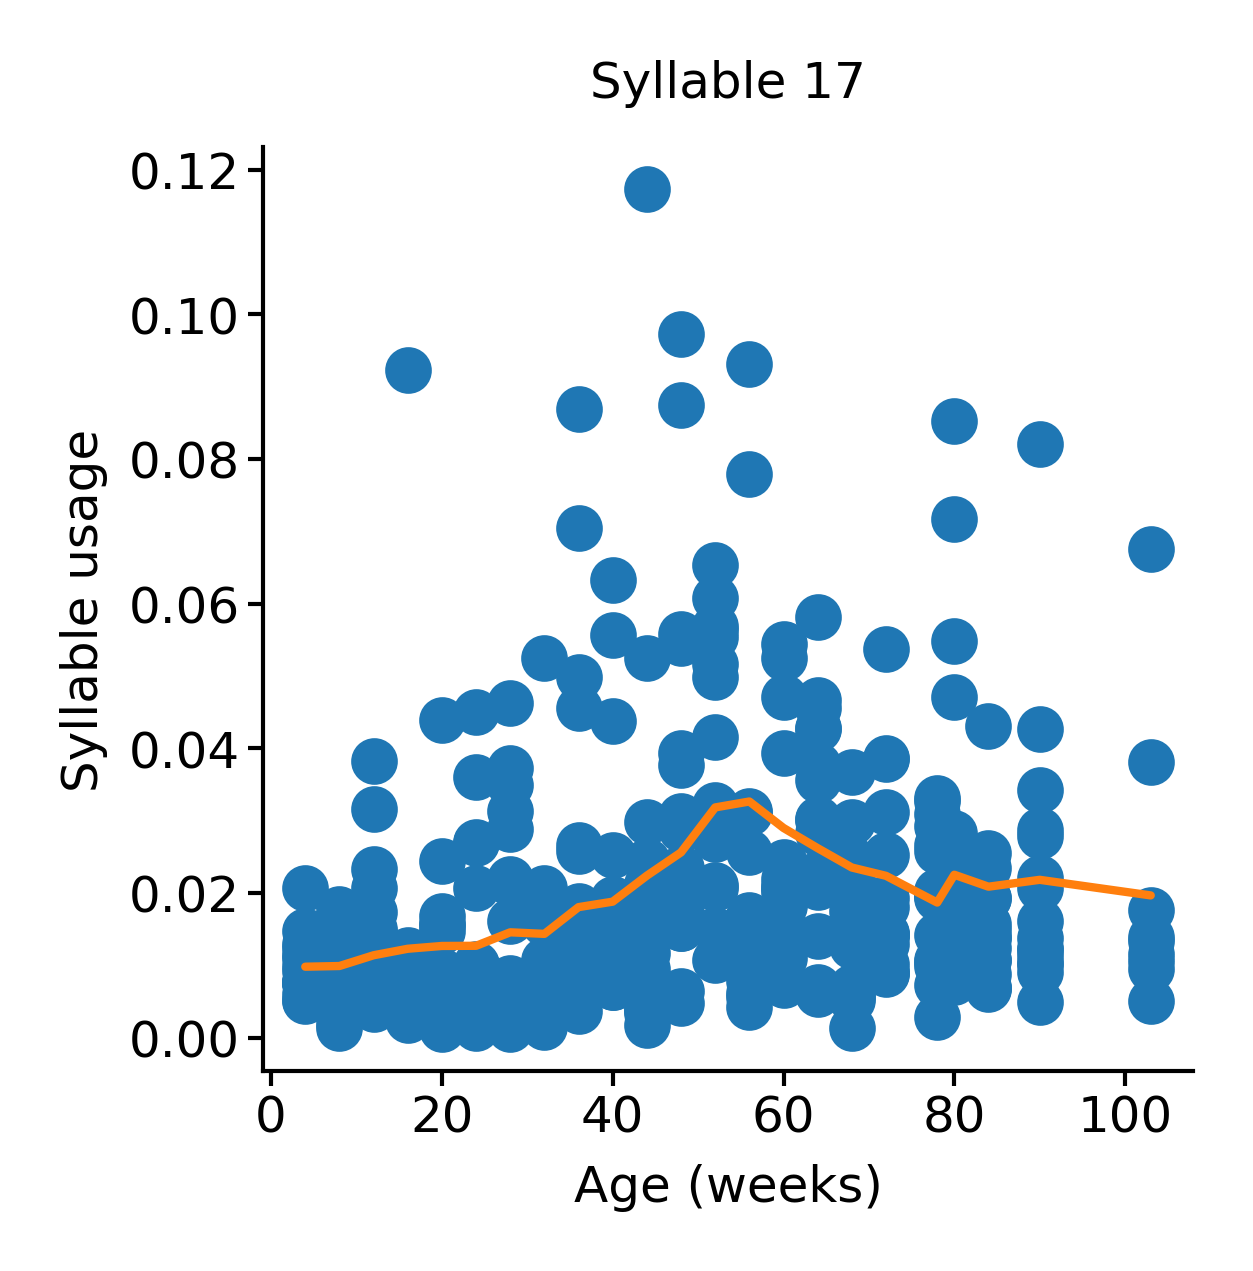

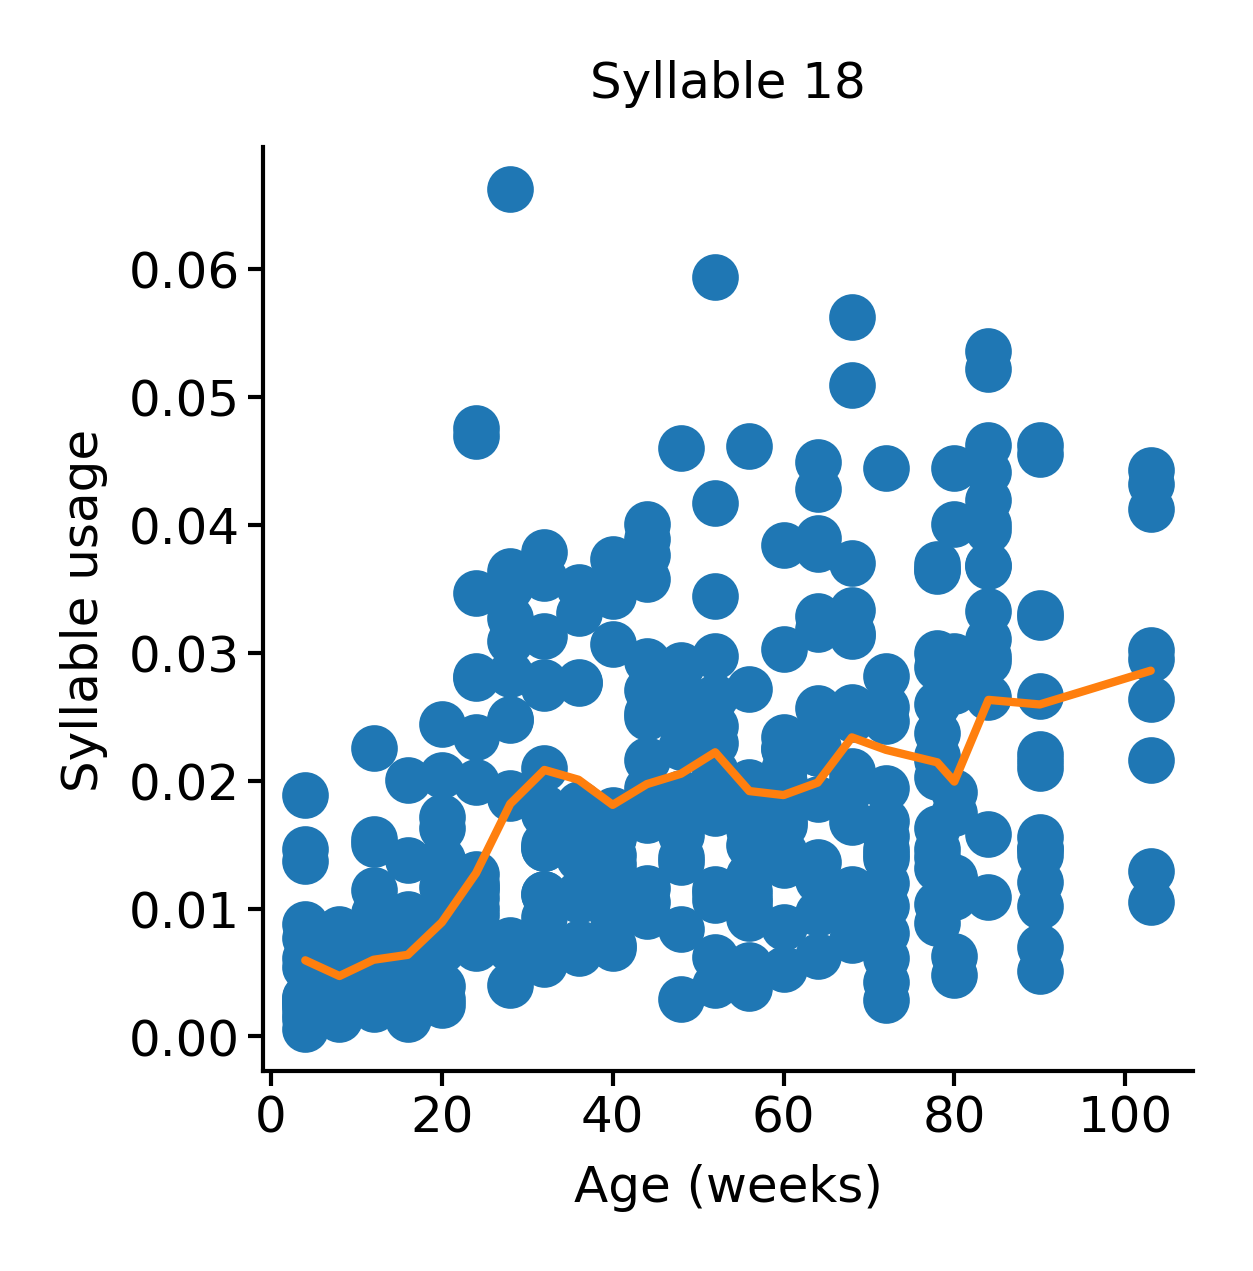

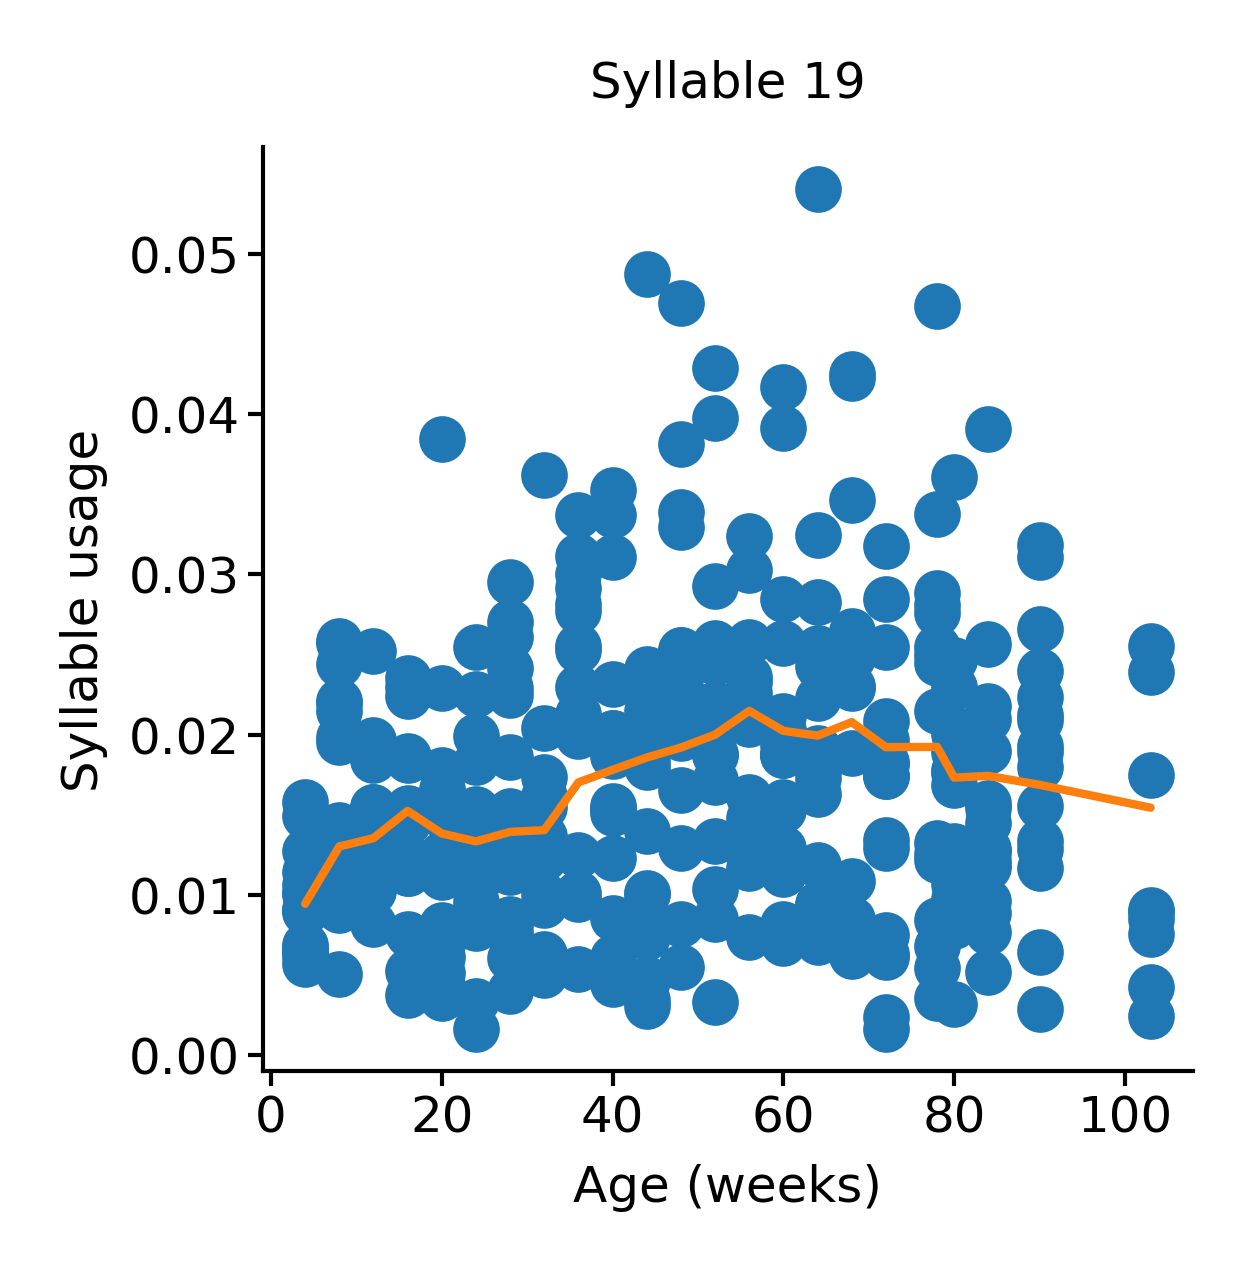

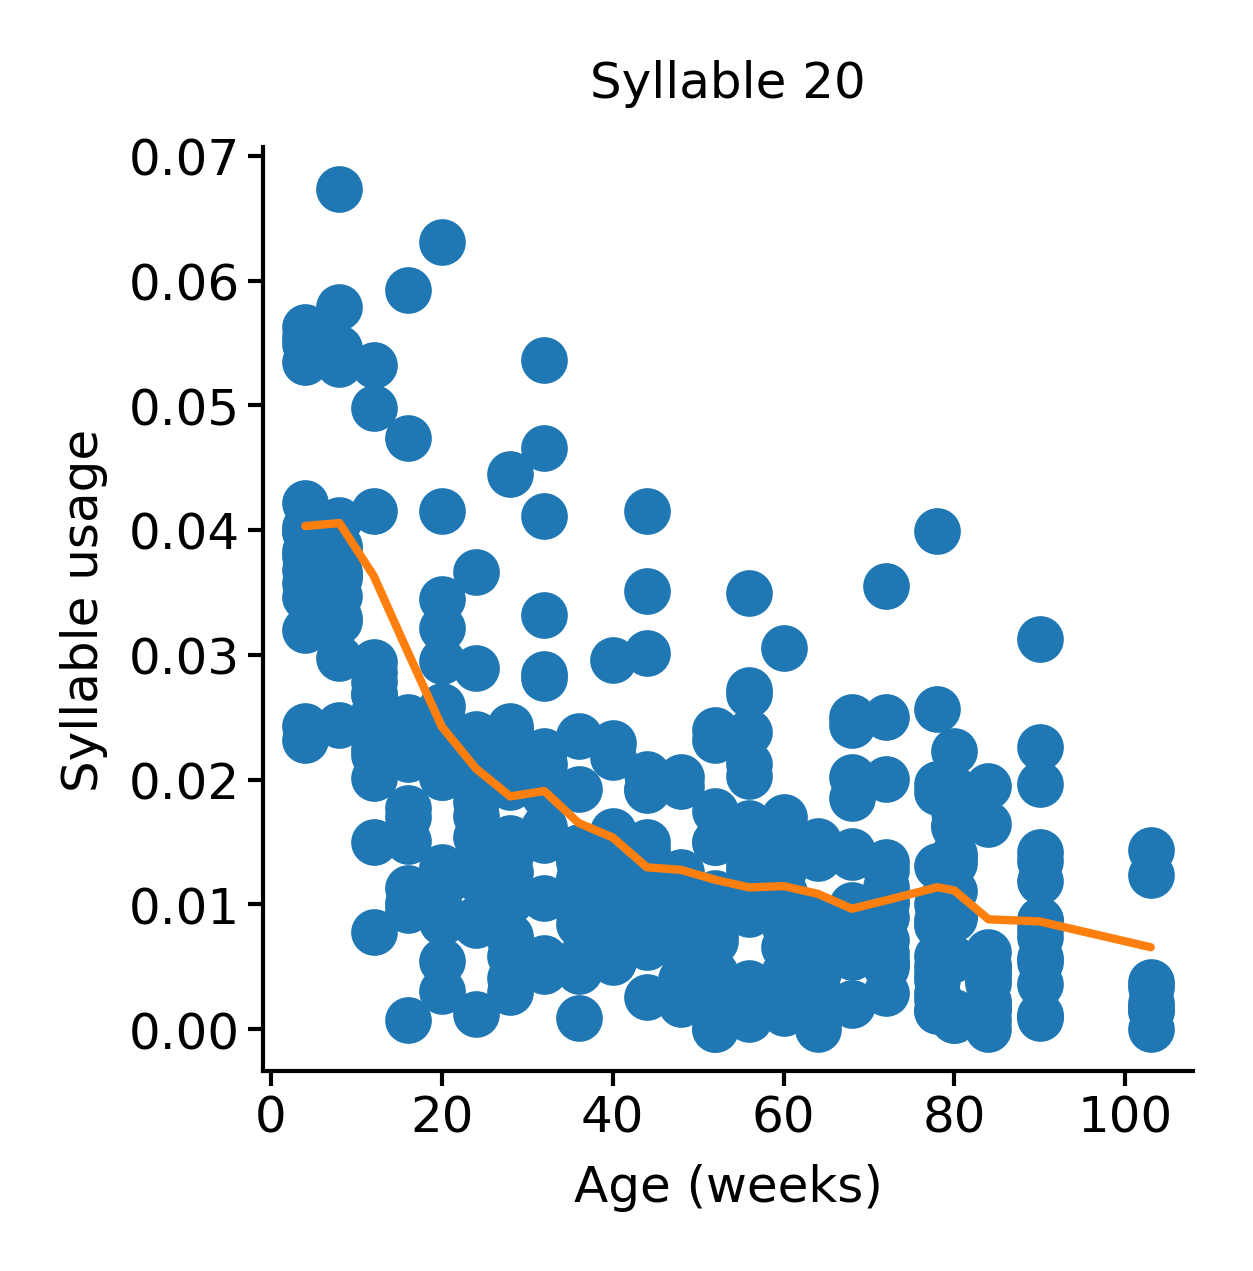

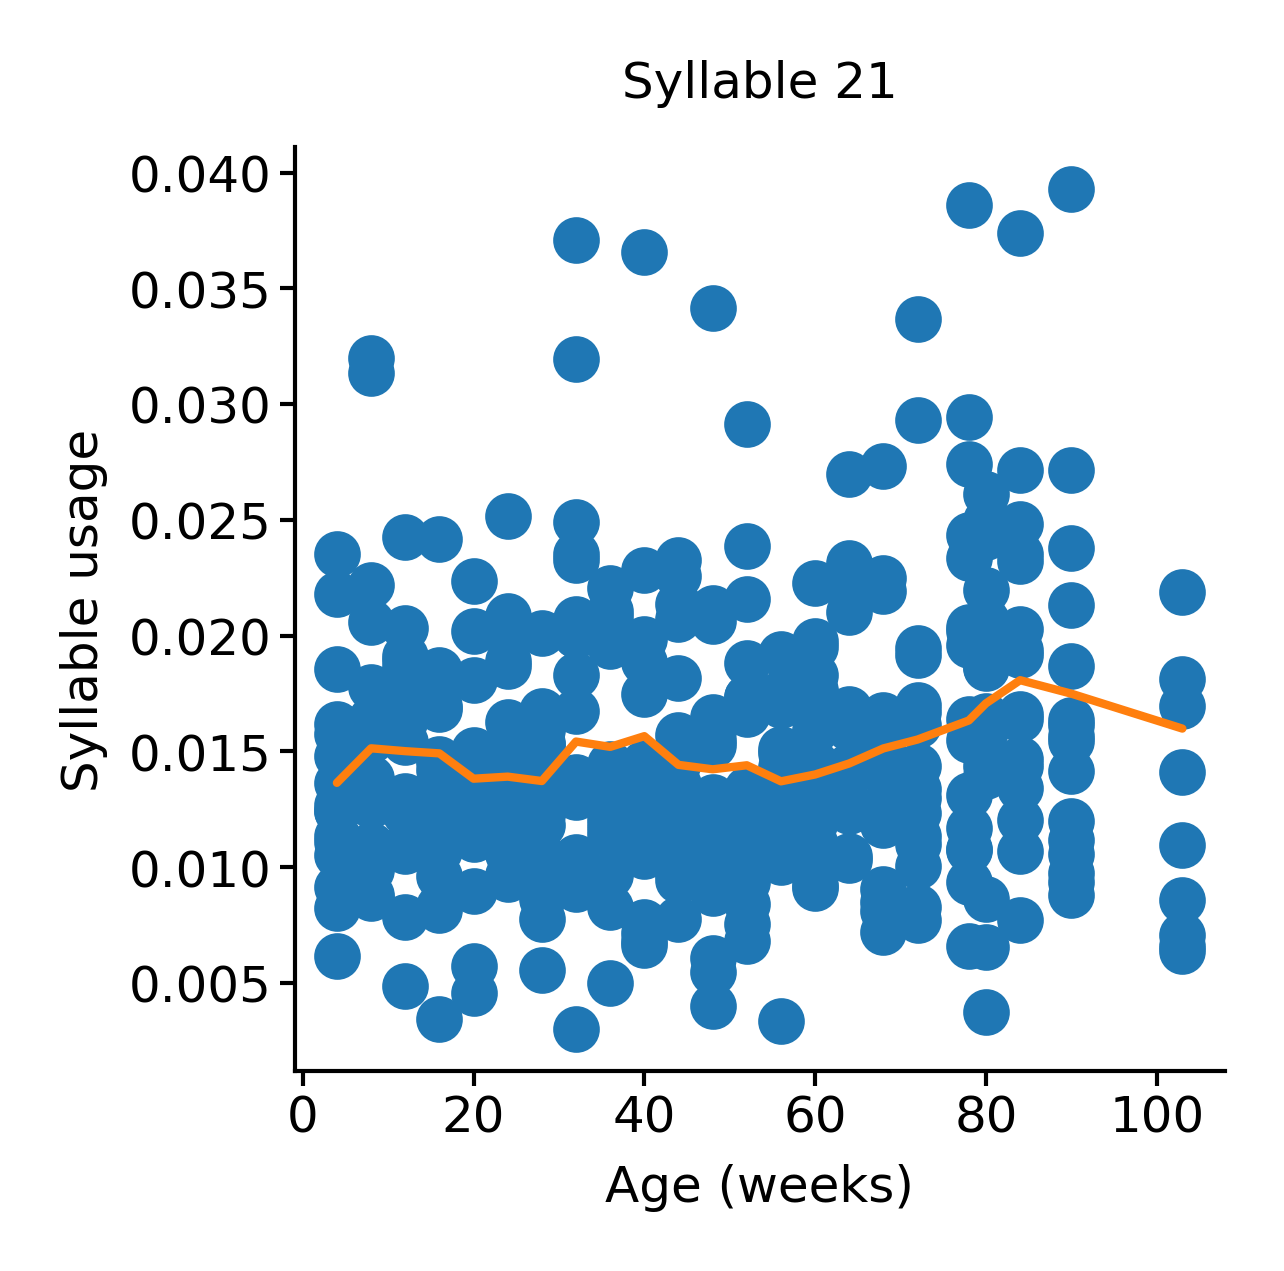

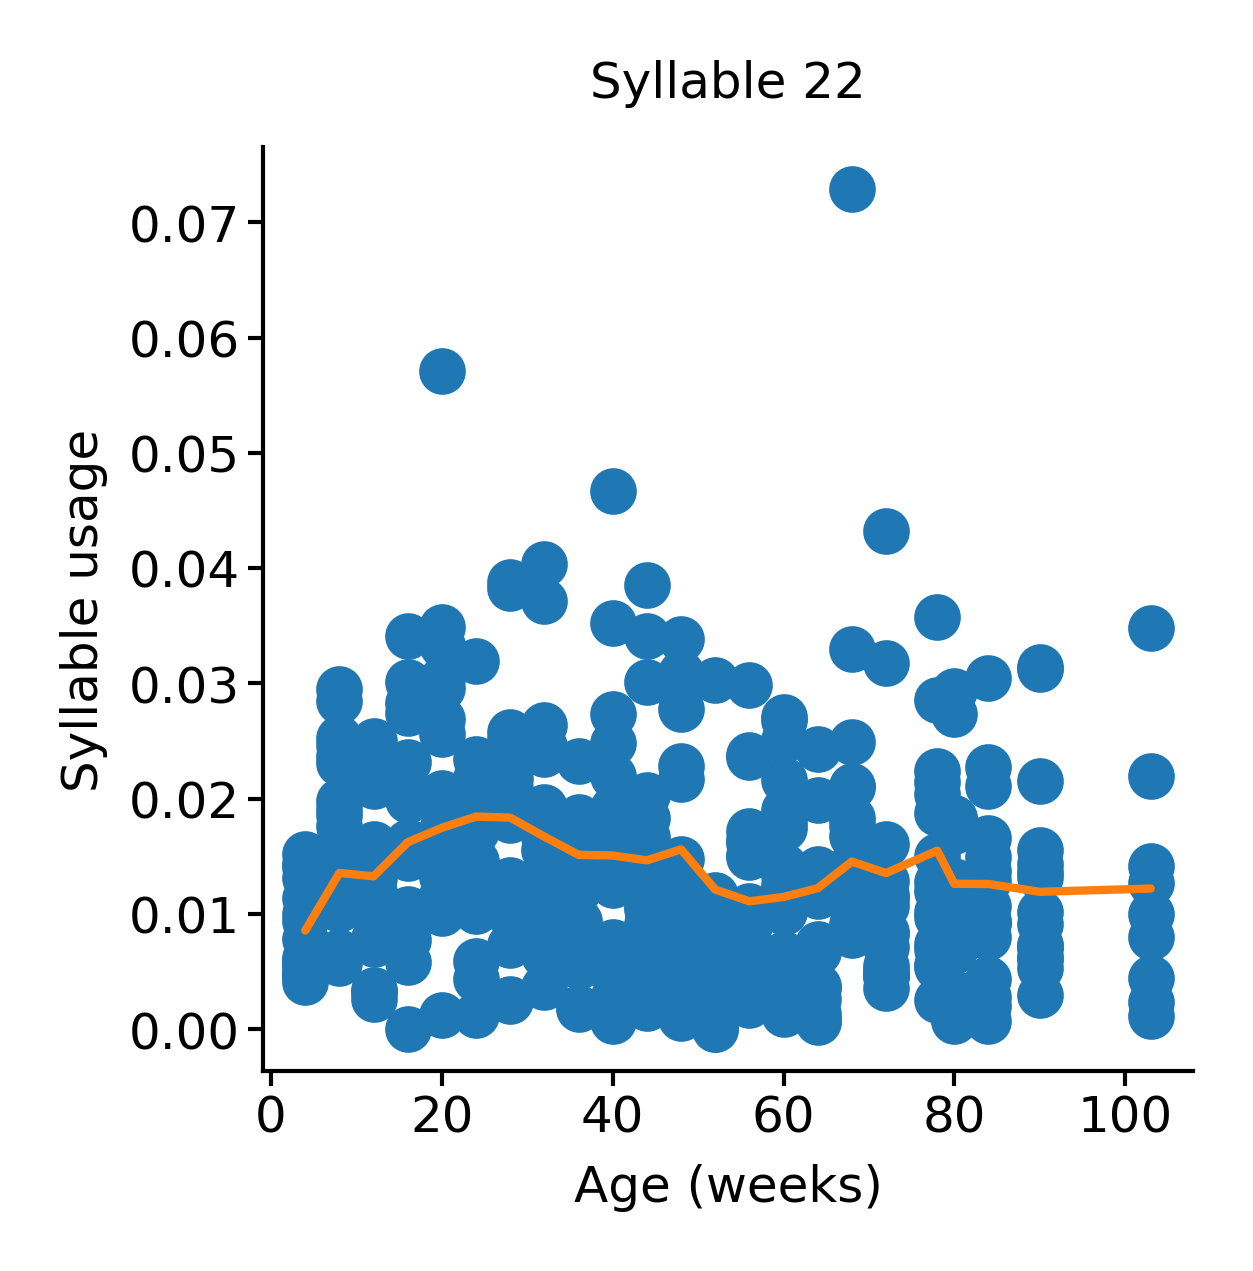

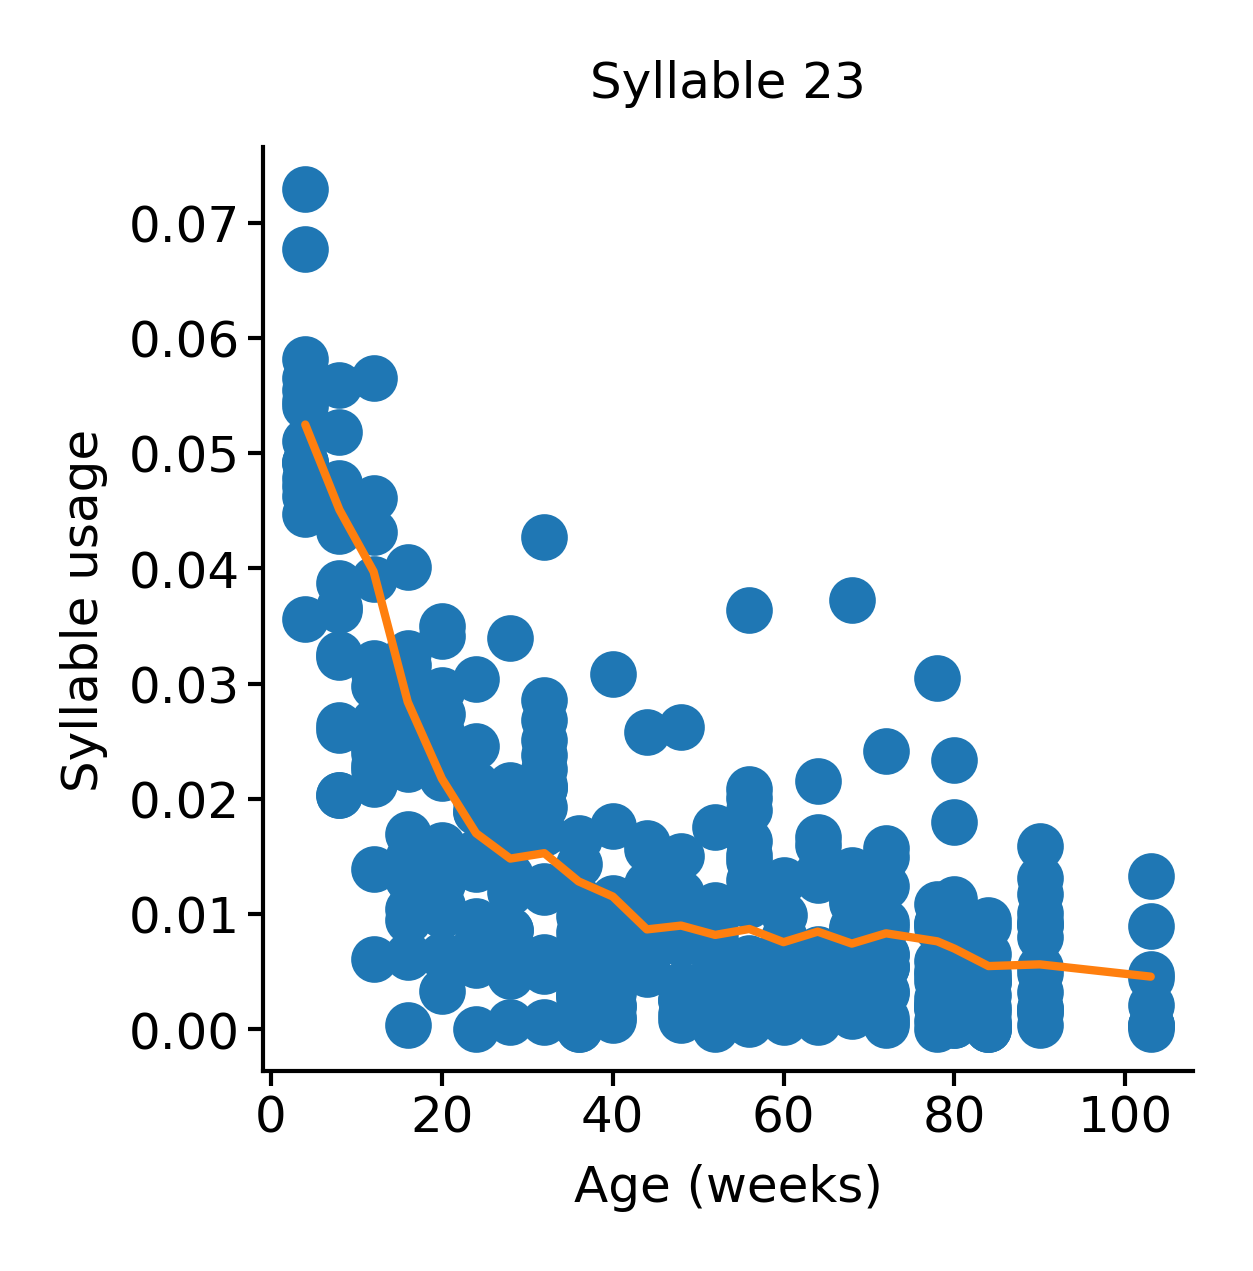

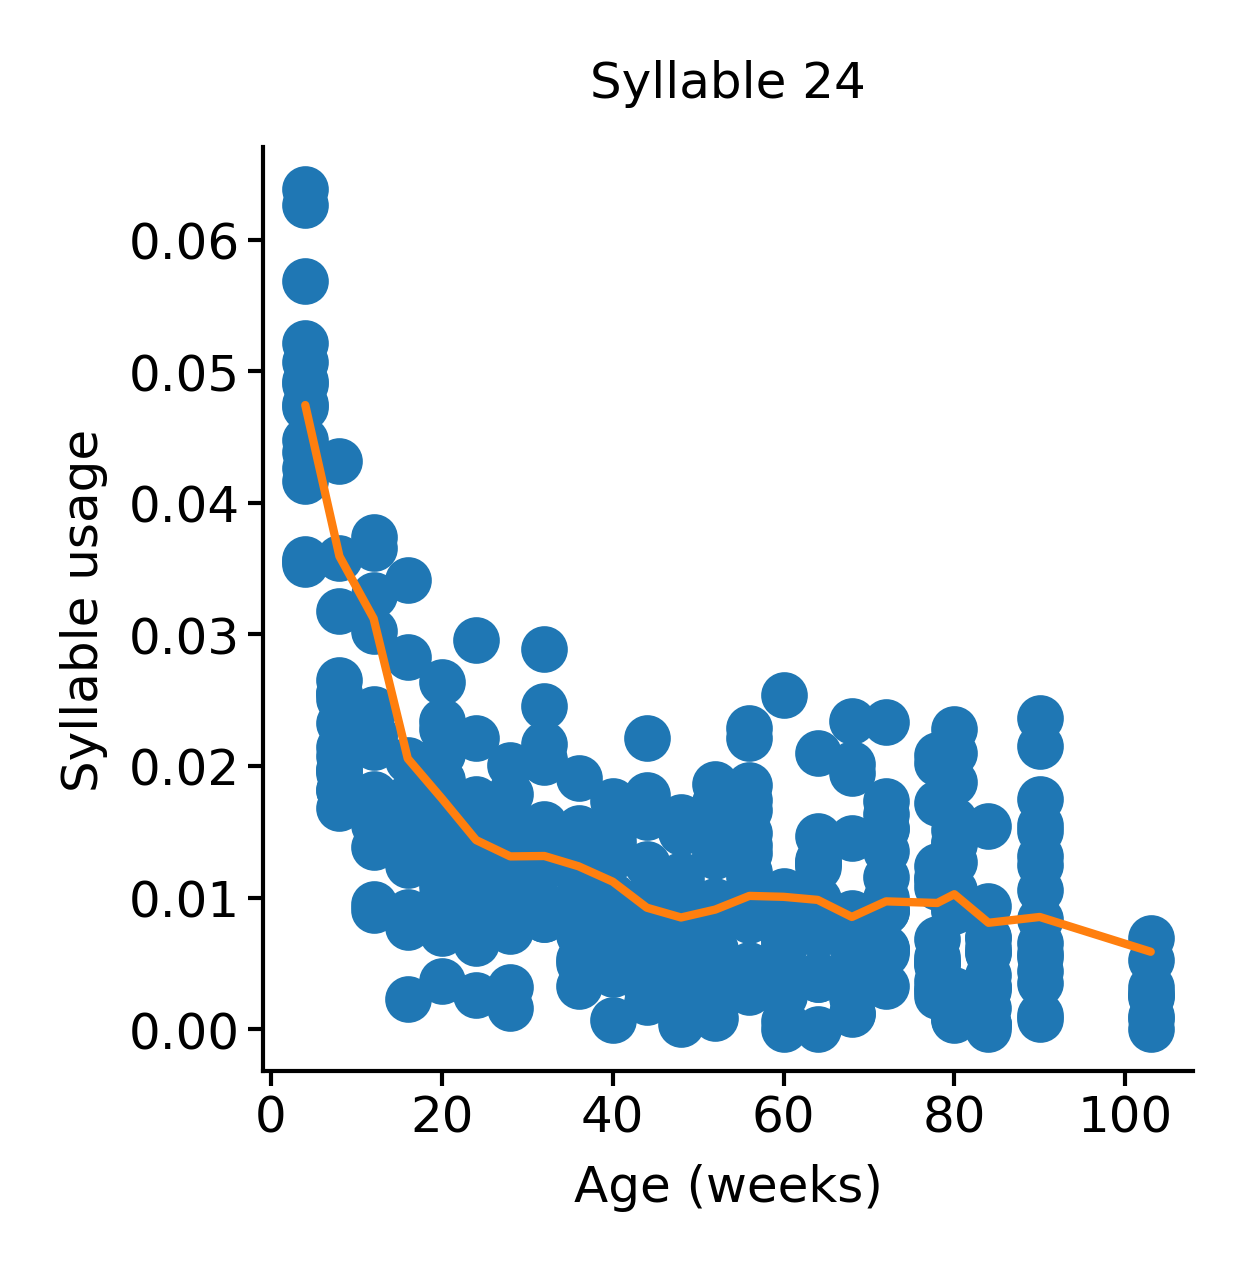

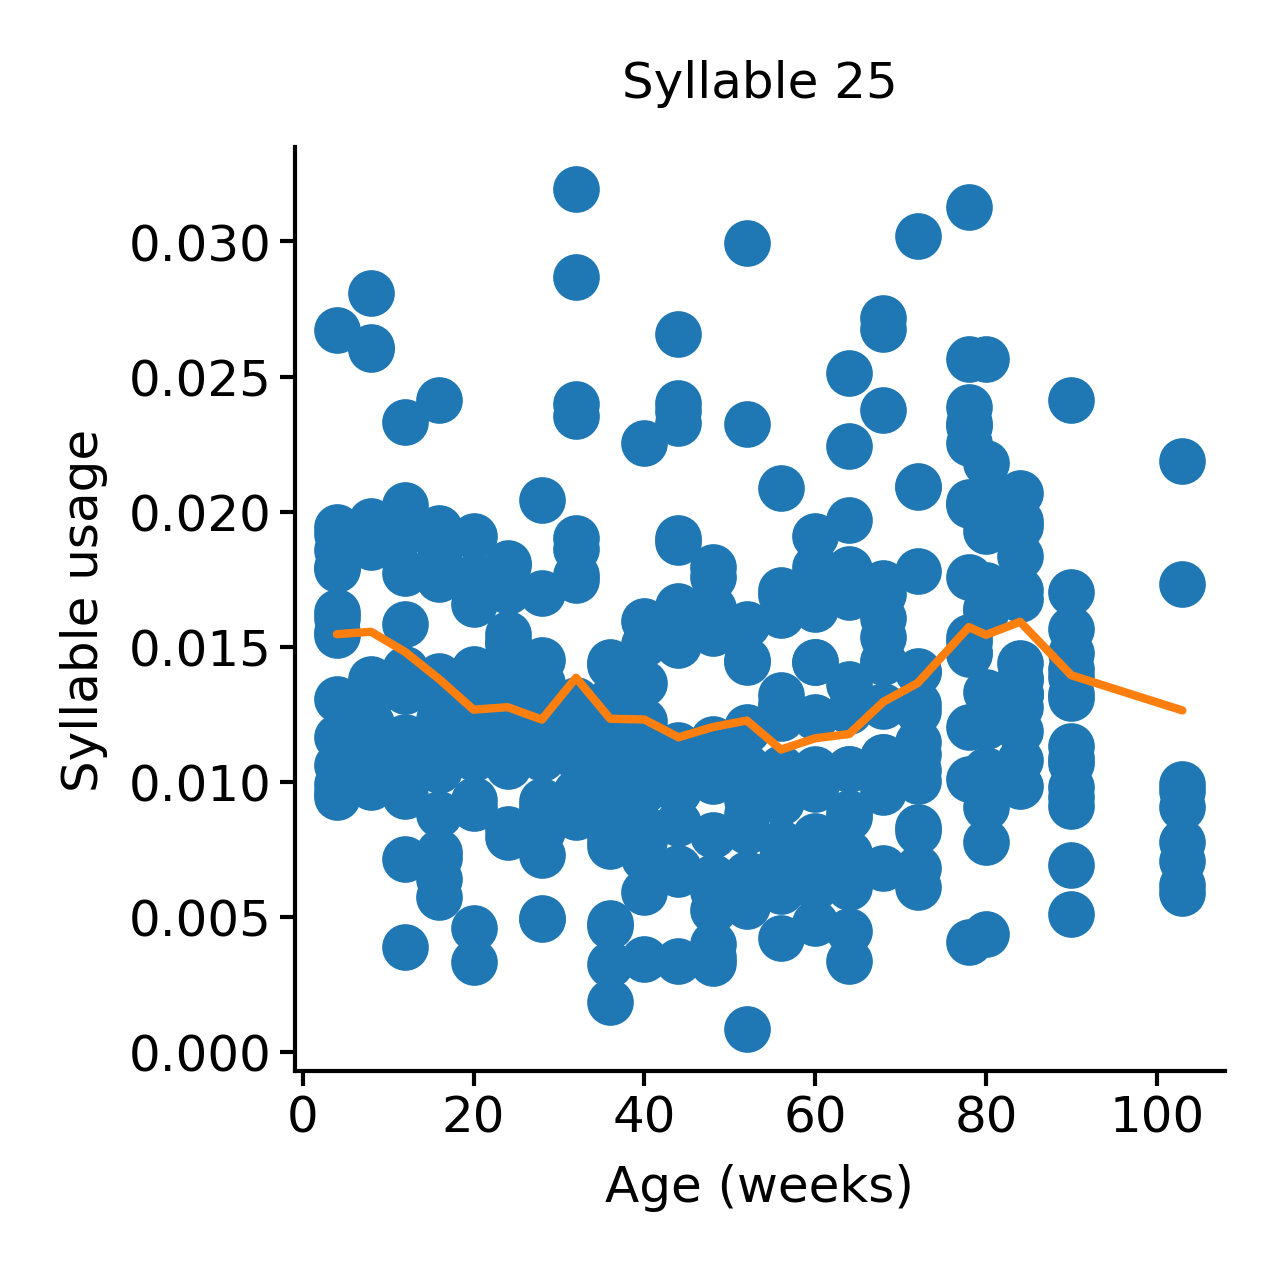

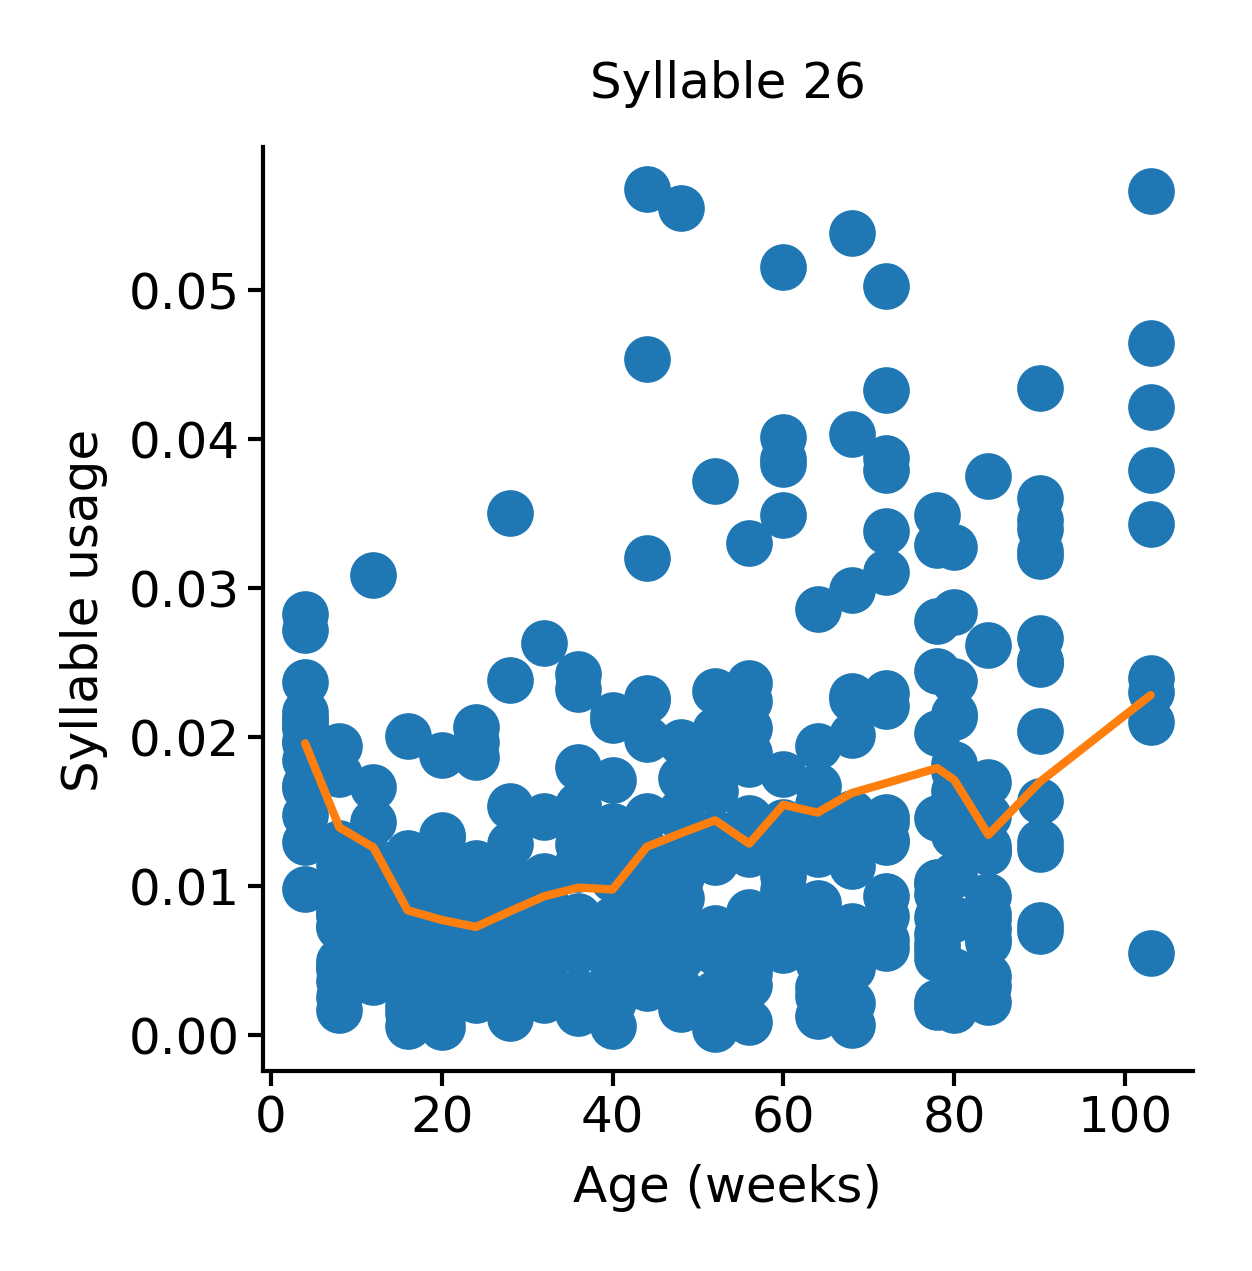

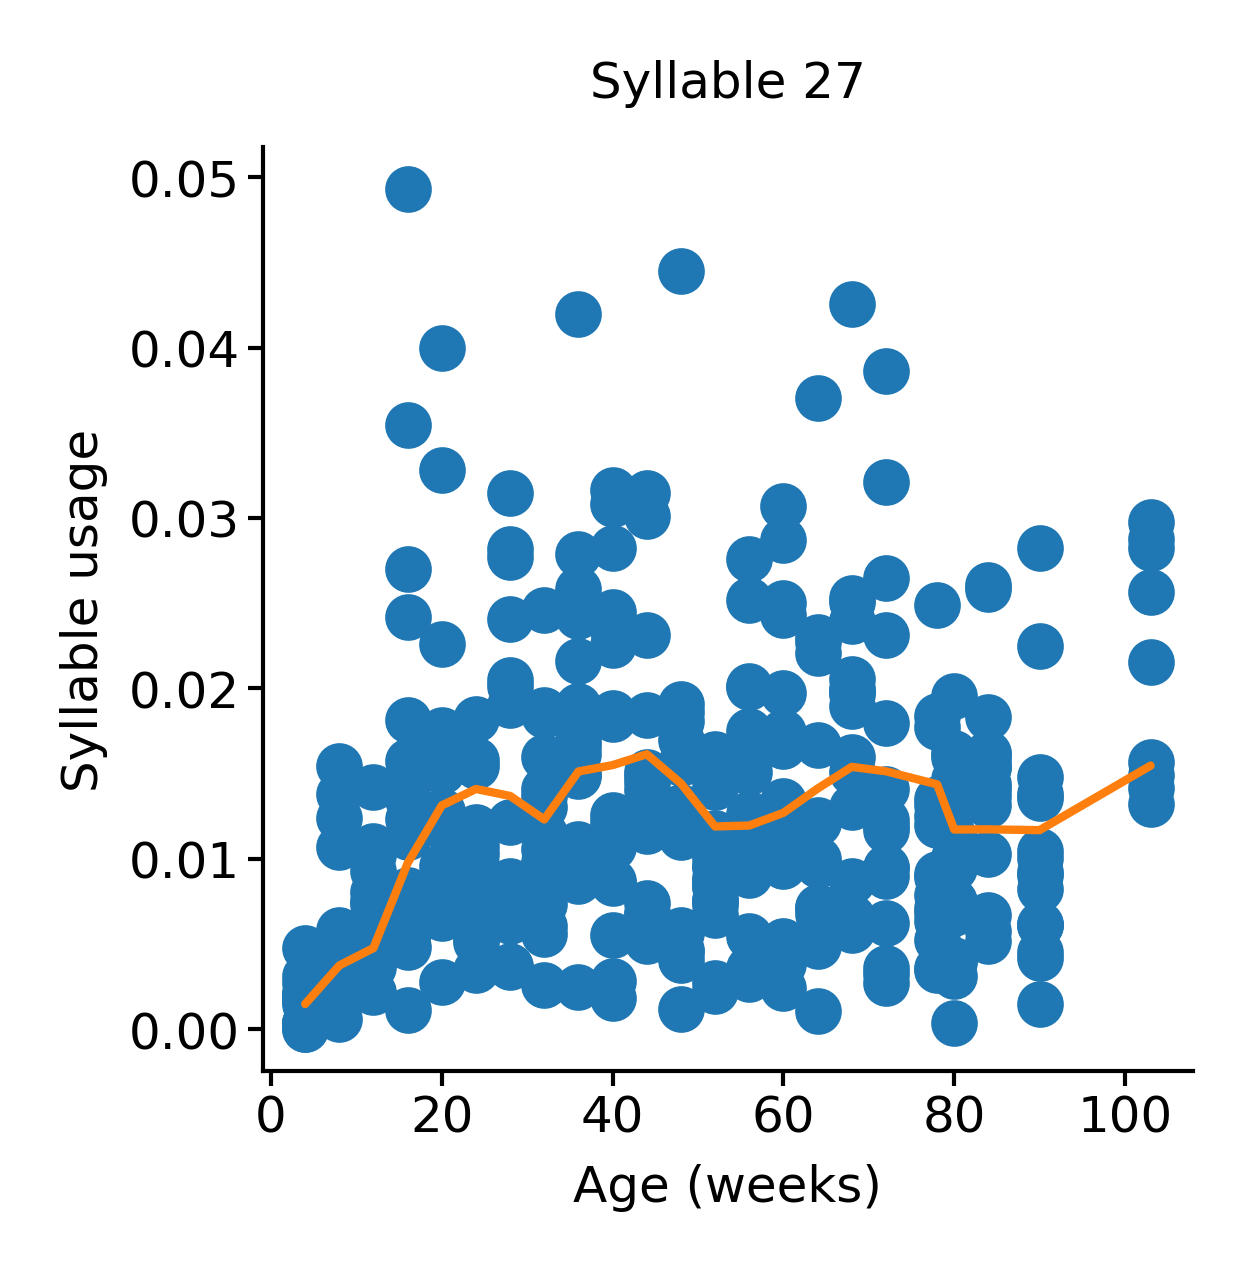

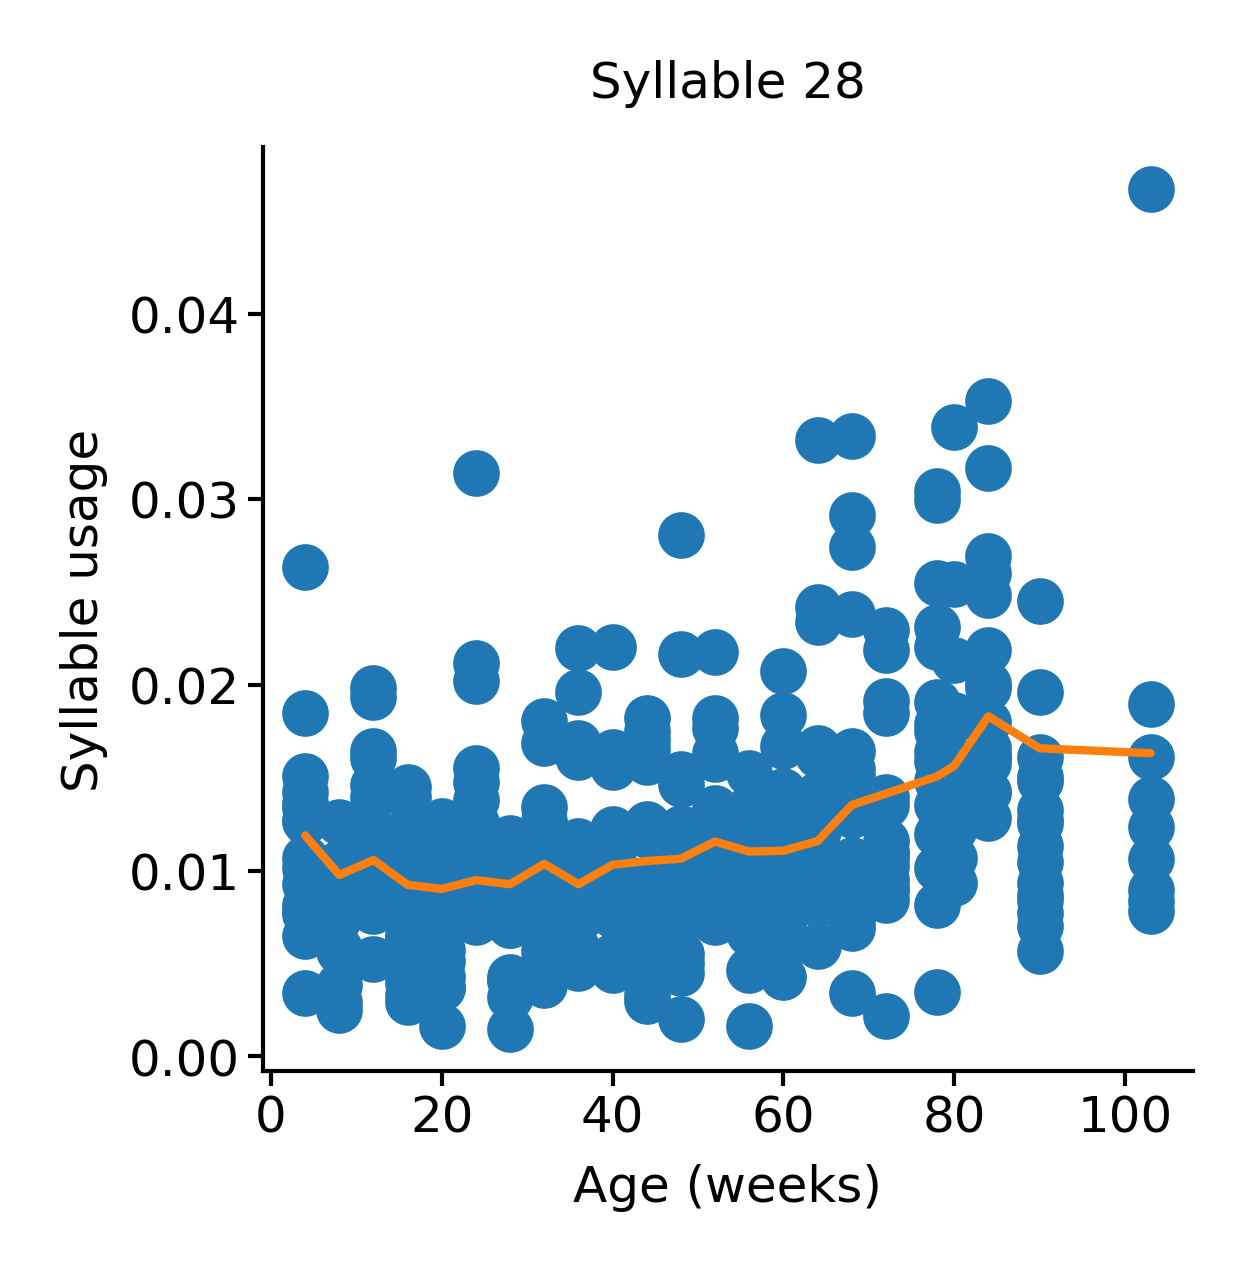

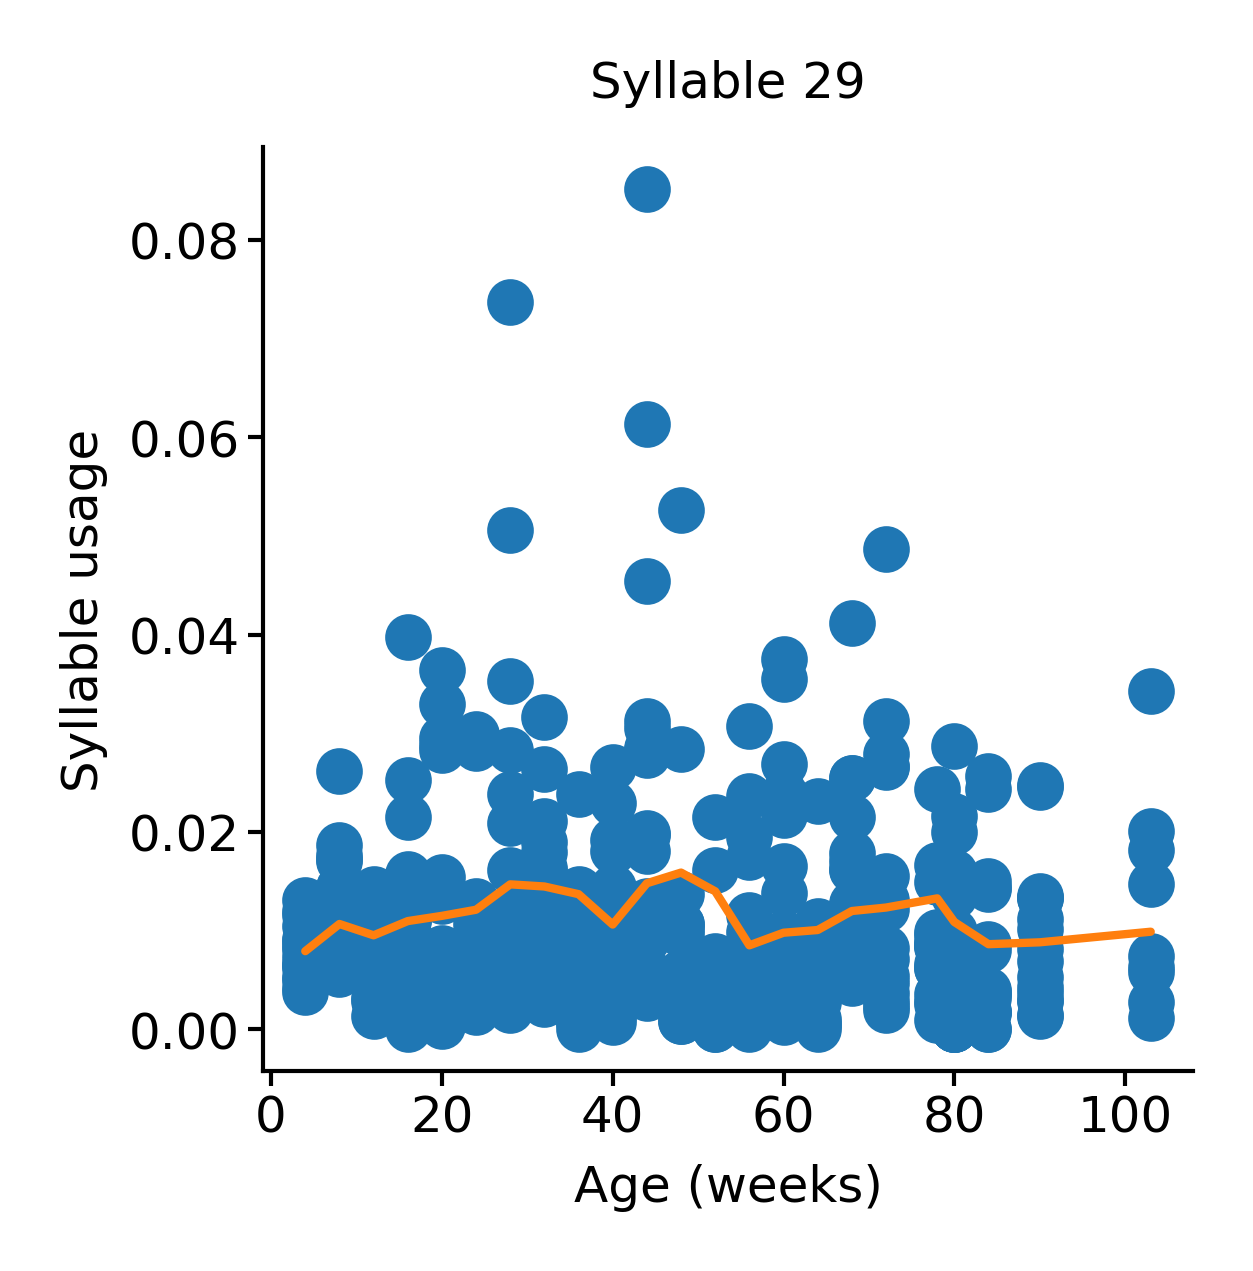

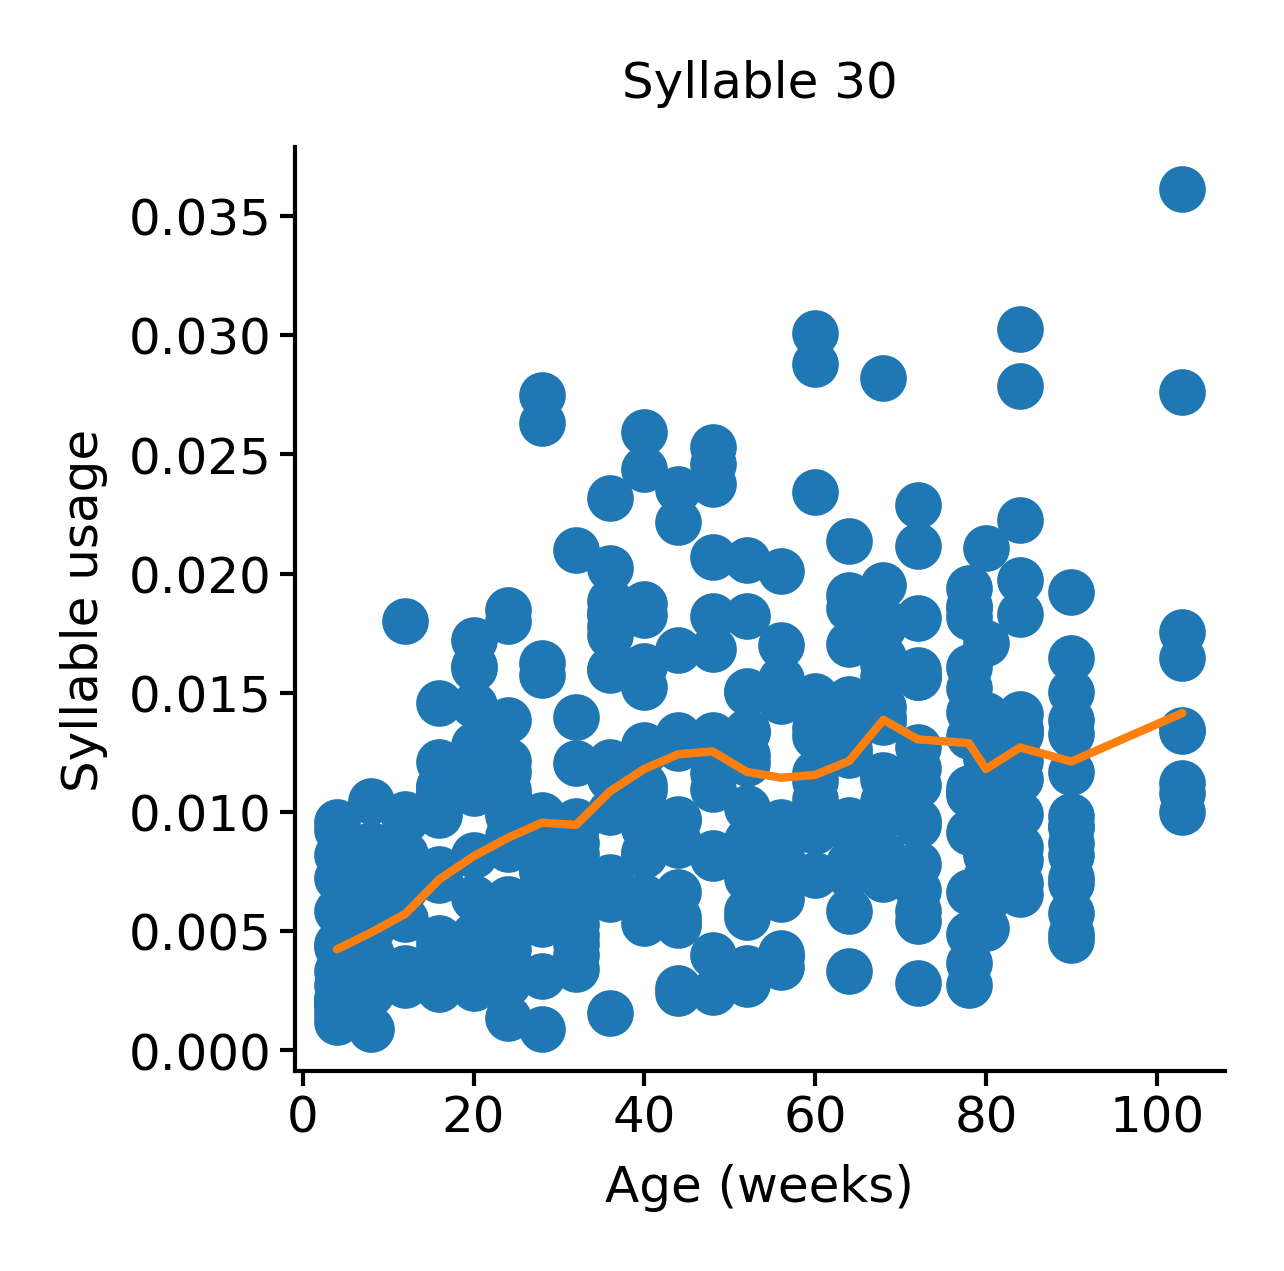

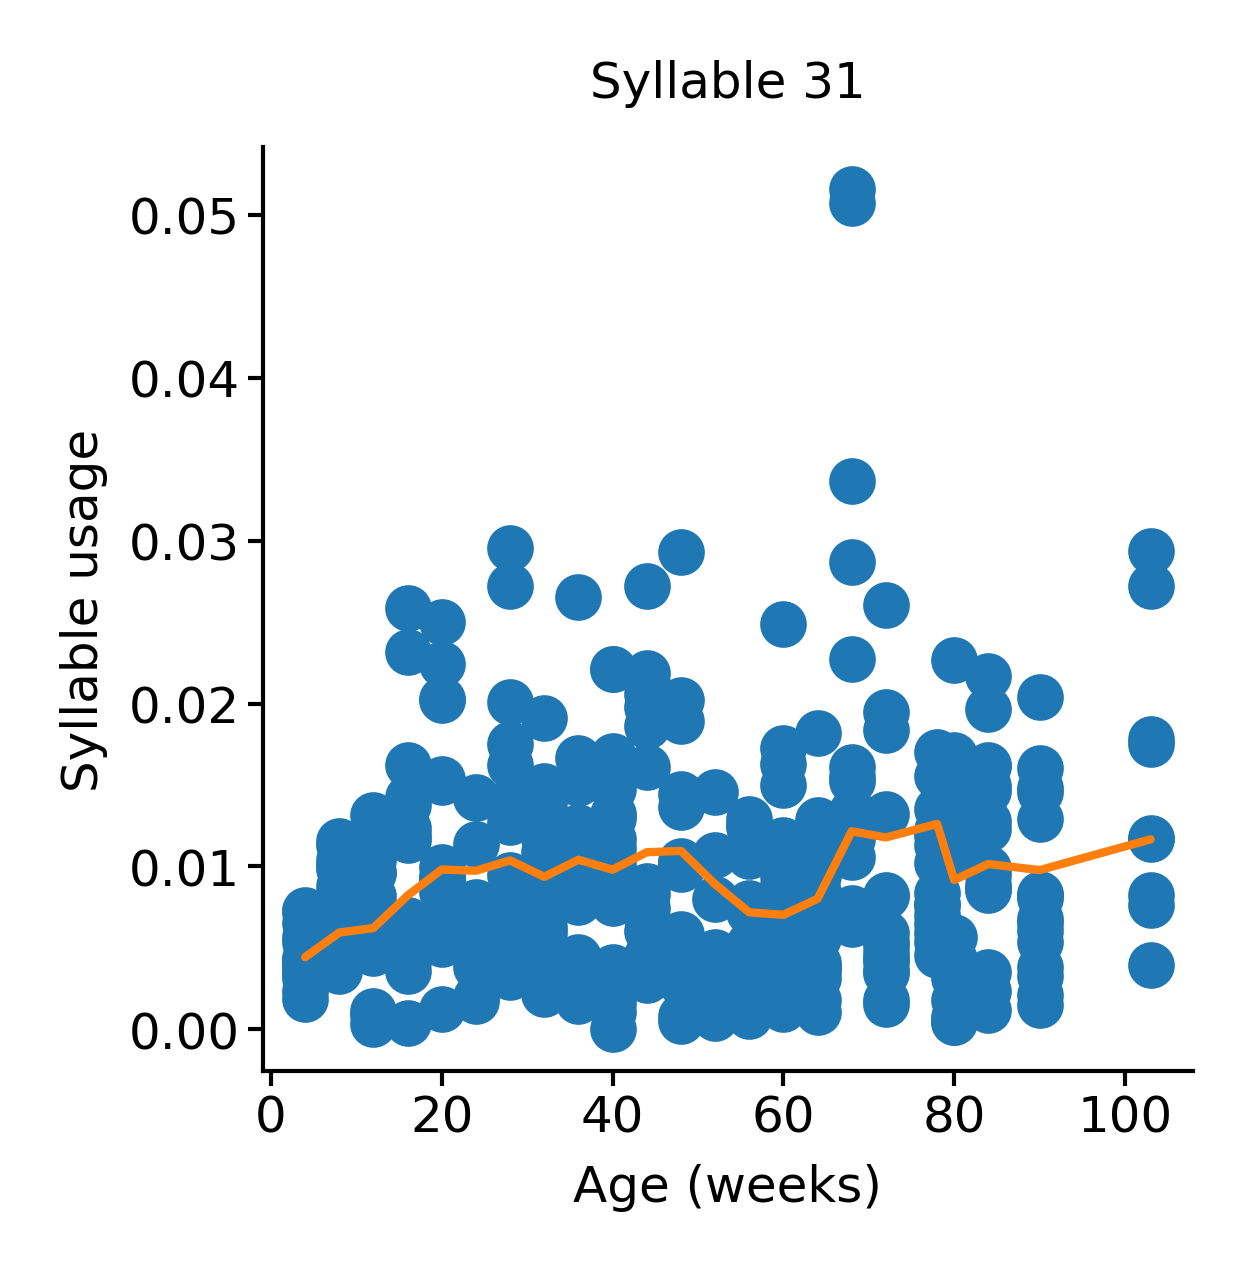

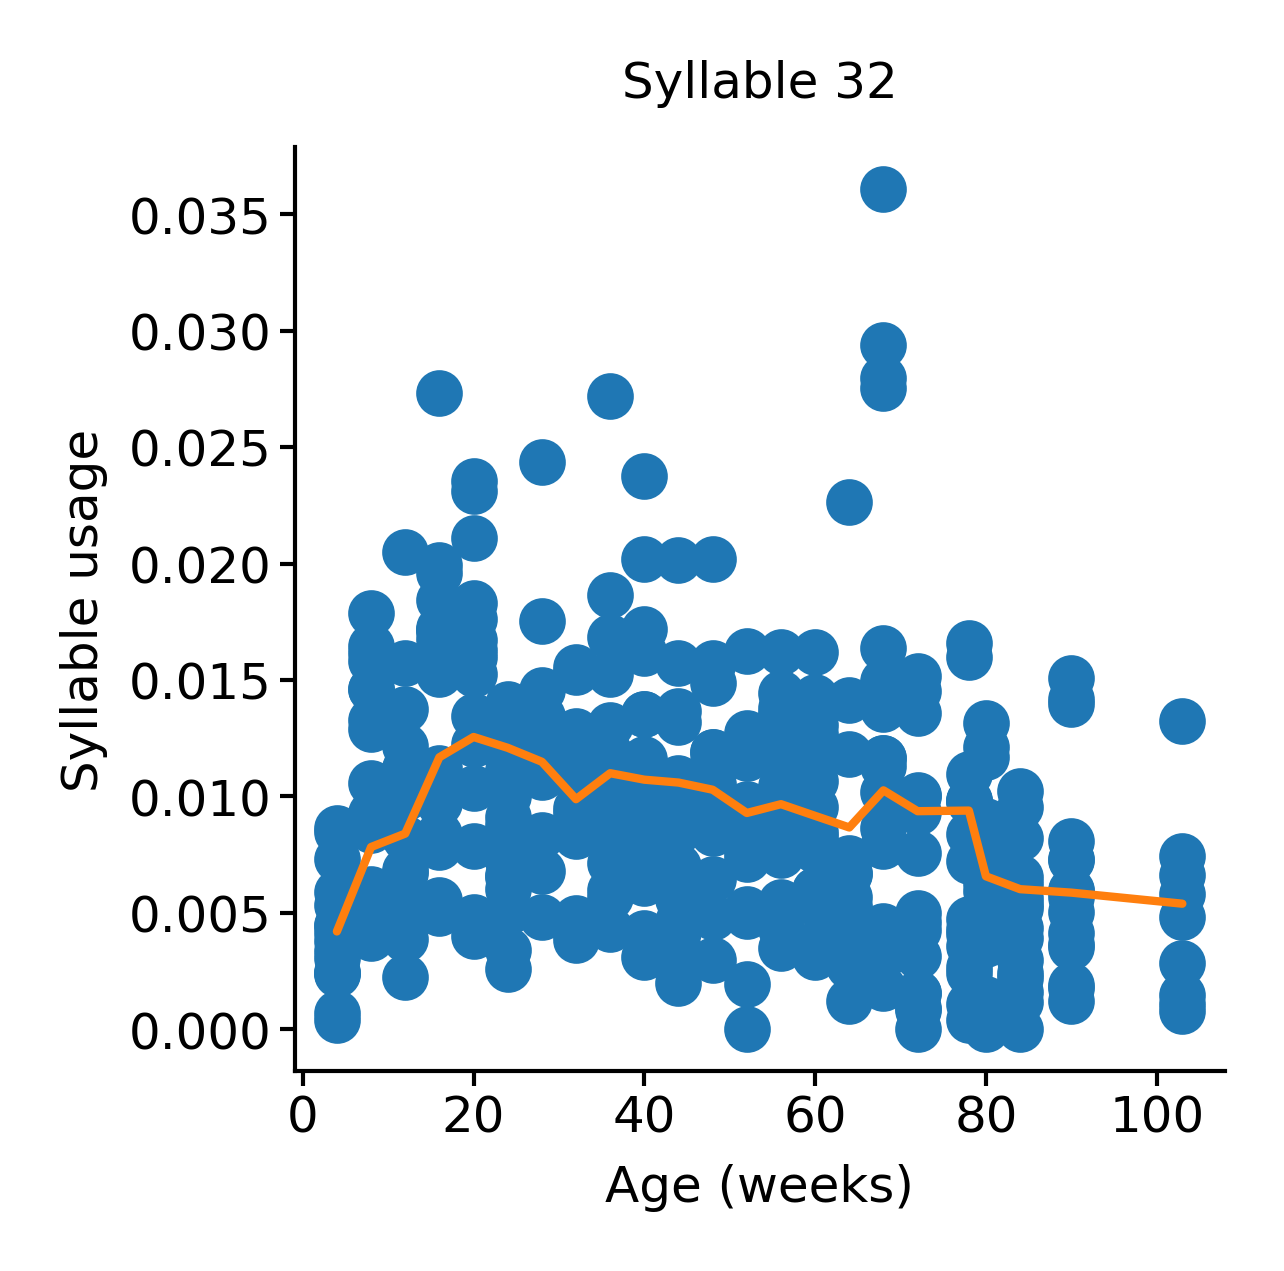

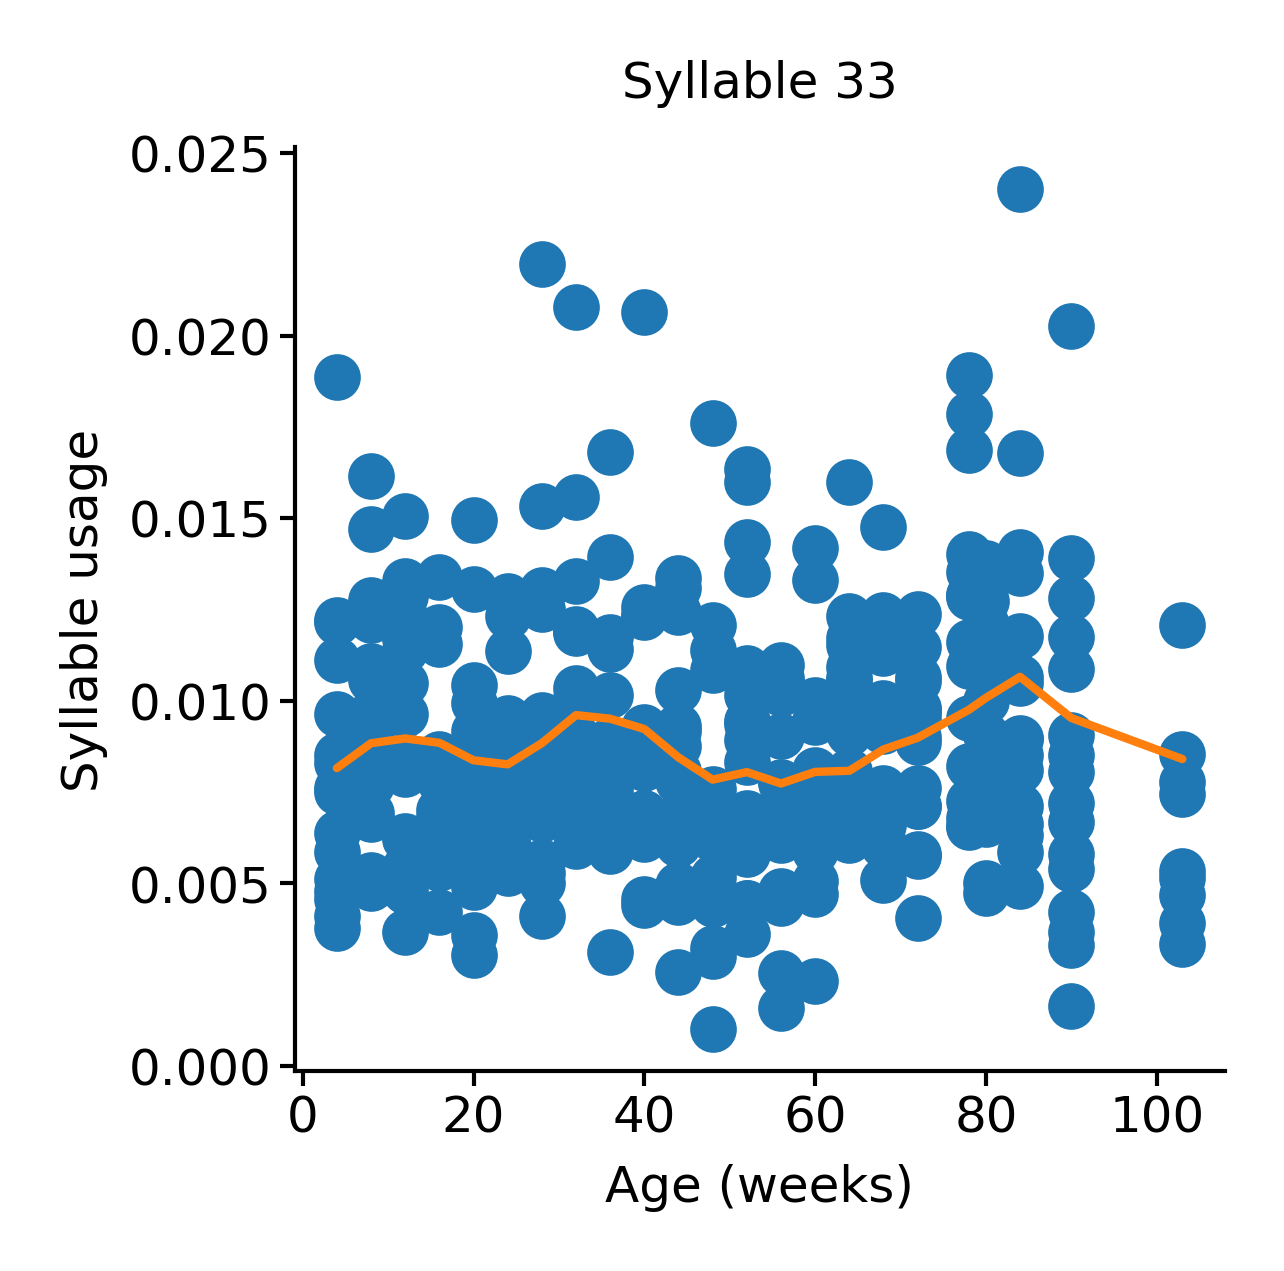

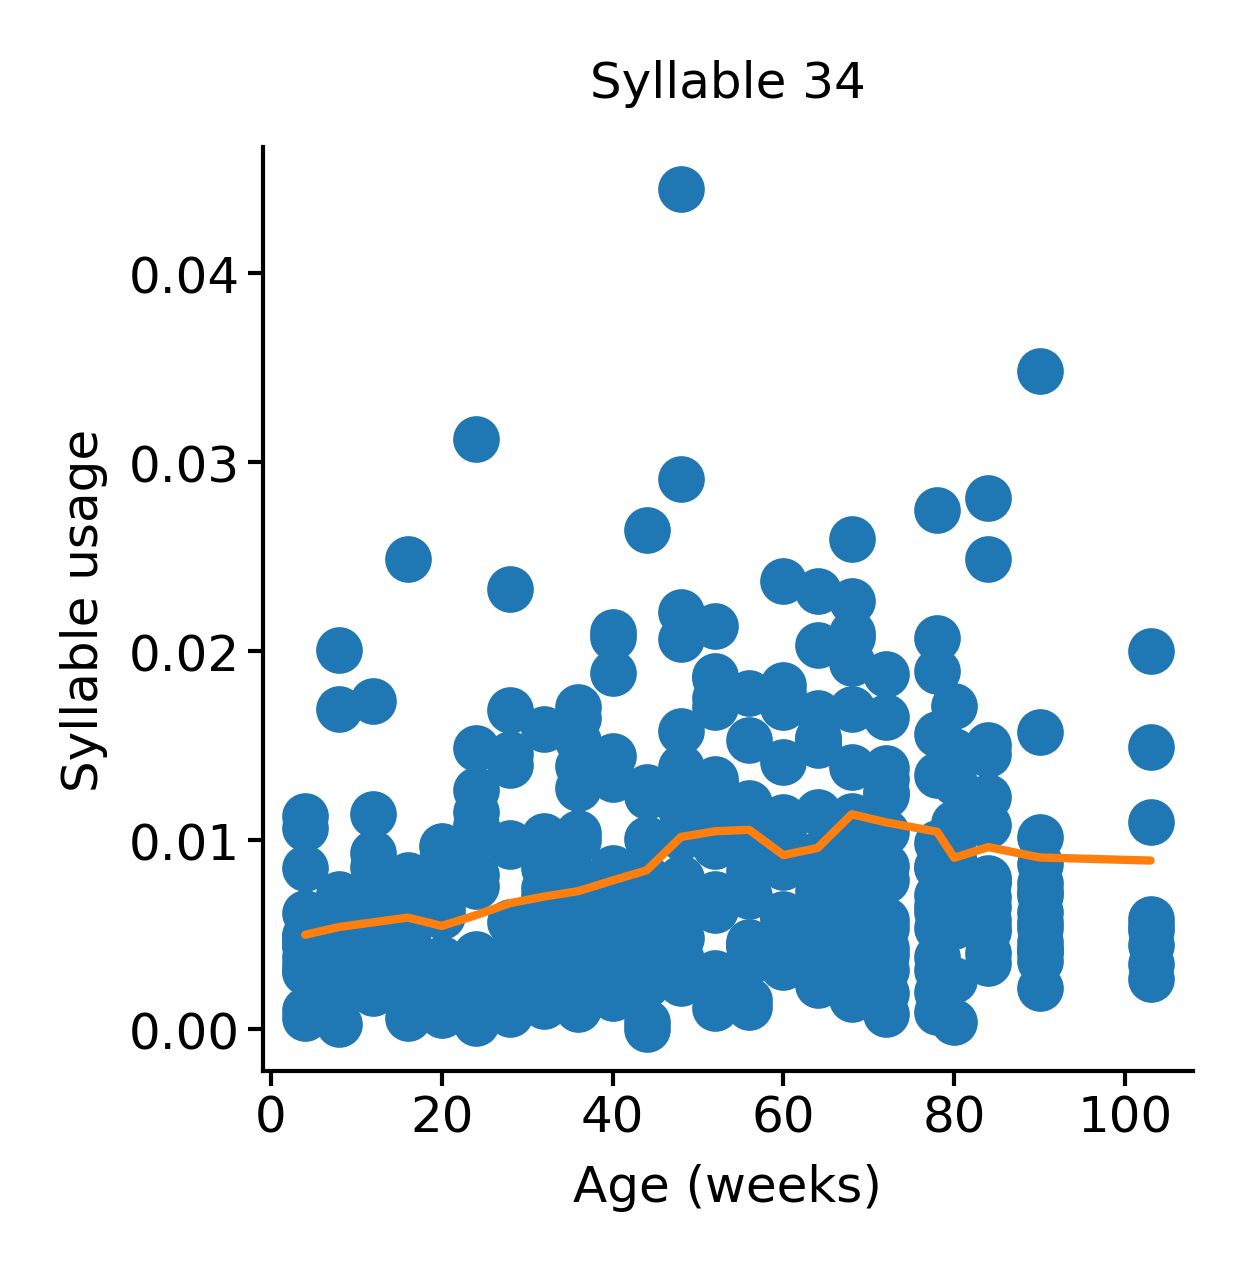

In [11]:
for syllable in range(35):
    fig = figure(2, 2)
    plt.scatter(age, df[syllable])
    ax = df.groupby('age').mean()[syllable].rolling(3, min_periods=1).mean().plot(c='C1')
    ax.set(title=f"Syllable {syllable}", xlabel="Age (weeks)", ylabel="Syllable usage")
    sns.despine()

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(2)

In [15]:
pcs = pca.fit_transform(df)

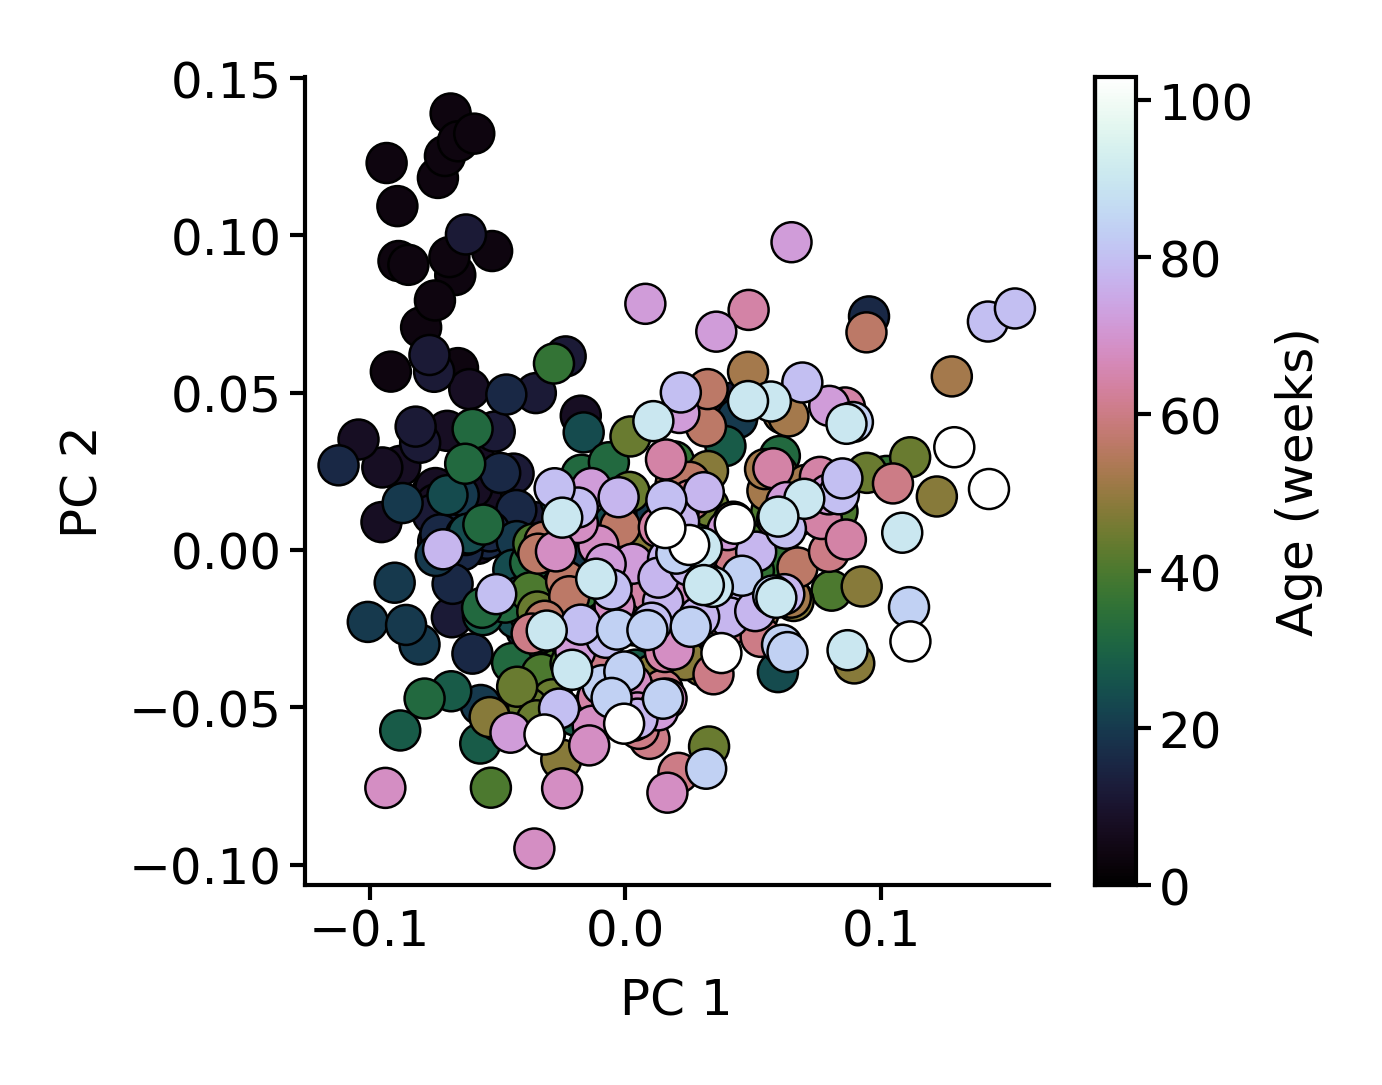

In [36]:
figure(2, 1.75)
plt.scatter(*pcs.T, c=age, cmap='cubehelix', linewidths=0.3, edgecolor='k', vmin=0)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar(label="Age (weeks)")
sns.despine()

In [38]:
pd.Series(age).corr(pd.Series(pcs[:, 0]), method='spearman')

0.608006759320277

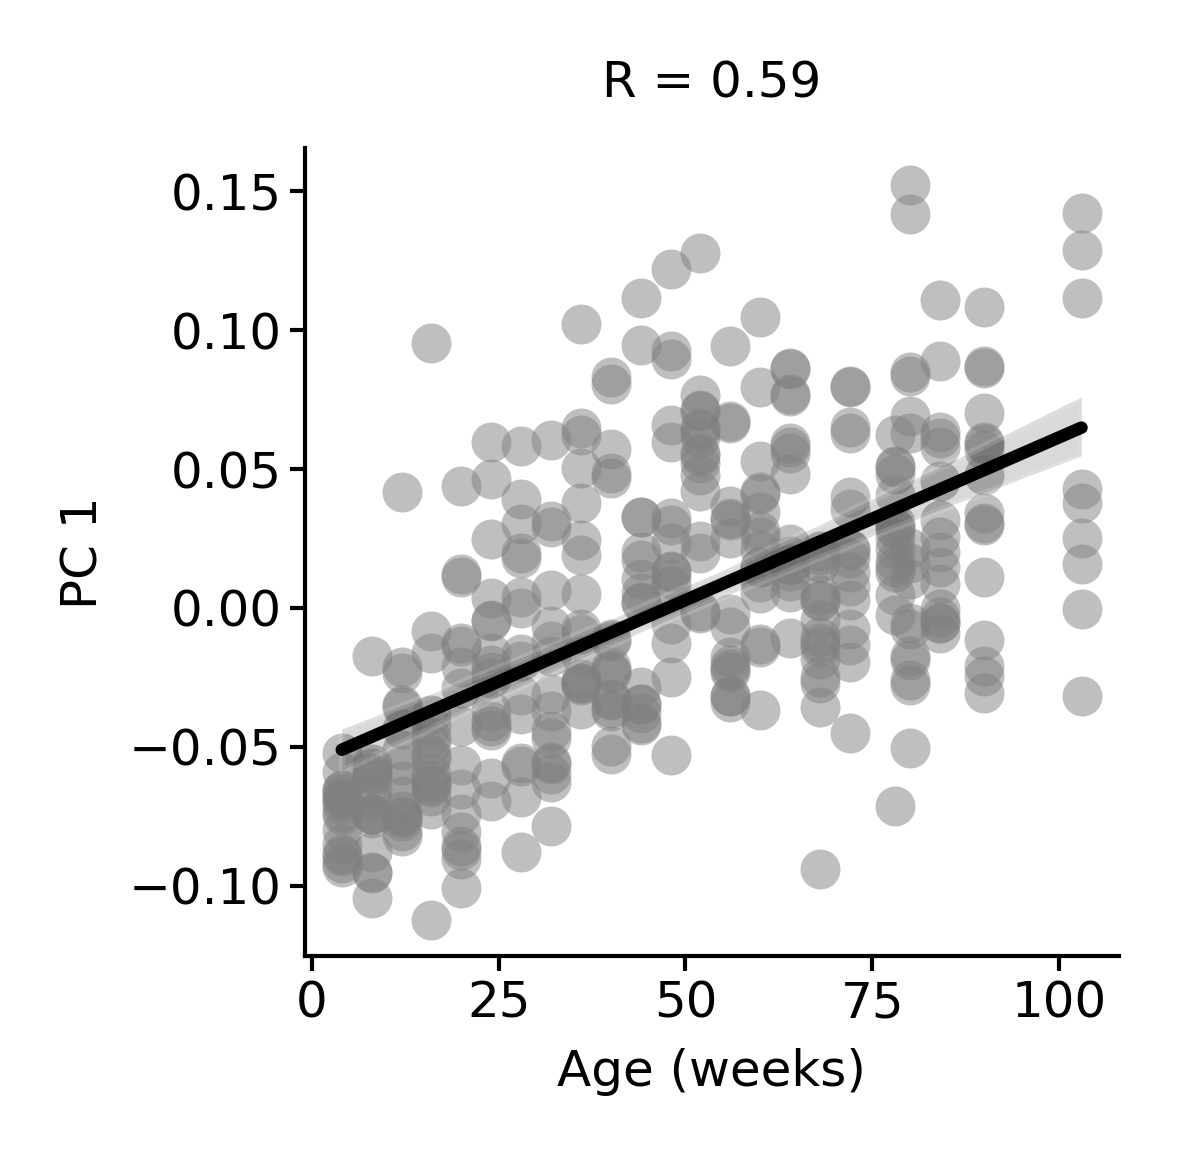

In [55]:
figure(1.75, 1.75)
ax = sns.regplot(x=age, y=pcs[:, 0], color='k', scatter_kws=dict(linewidths=0, alpha=0.5, color='gray'))
ax.set(xlabel="Age (weeks)", ylabel="PC 1", title="R = 0.59")
sns.despine()

In [58]:
size_df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_11/ontogeny_males_mouse_area_df_v00.parquet')
size_age = size_df.index.get_level_values('age')

In [60]:
merged = df.join(size_df["quant_0.5"])
size_age = merged.index.get_level_values('age')

In [62]:
merged

0  \
age mouse    subject_name session_name uuid                                 date                            
4   4M_01_01 4M_01_01     otgy_4M_01   e6ad4e15-0ce1-4833-a751-09aa15bfa2e5 2023-12-01 10:54:30  0.030976   
    4M_01_02 4M_01_02     otgy_4M_01   2bb5e7fa-02cd-4694-accf-fed9651b1beb 2023-12-01 08:00:22  0.033483   
    4M_01_03 4M_01_03     otgy_4M_01   7daed982-62e5-4695-971f-c229381d7521 2023-12-01 11:04:03  0.039068   
    4M_01_04 4M_01_04     otgy_4M_01   43e12fcc-2119-4e15-b11c-add440ca5f74 2023-12-01 07:51:47  0.040693   
    4M_02_01 4M_02_01     otgy_4M_02   6568fdb5-82b5-4241-8ccb-572ae49bd87a 2023-12-01 12:53:09   0.02282   
...                                                                                                   ...   
103 103M_02  103M_02      otgy_103M_02 8ef8ca54-9e31-413d-9cb1-647f2cef9daa 2023-10-07 10:53:03  0.171529   
                                       a9e5c671-b898-4cdd-af9e-bdeb4a93ec10 2023-10-07 13:52:03  0.103756   
                                       f16bd29c-0284-4226-ab85-ff008abb01e4 2023-10-07 10:52:23  0.088732   
    103M_03  103M_03      otgy_103M_03 a7fd53a9-cf84-466d-a54a-0f4540660cad 2023-10-07 12:50:53  0.044879   
                                       dff86510-b65f-4713-aa22-0a4e95f53c23 2023-10-07 15:50:02  0.058719   

                                                                                                        1  \
age mouse    subject_name session_name uuid                                 date                            
4   4M_01_01 4M_01_01     otgy_4M_01   e6ad4e15-0ce1-4833-a751-09aa15bfa2e5 2023-12-01 10:54:30   0.12069   
    4M_01_02 4M_01_02     otgy_4M_01   2bb5e7fa-02cd-4694-accf-fed9651b1beb 2023-12-01 08:00:22  0.124664   
    4M_01_03 4M_01_03     otgy_4M_01   7daed982-62e5-4695-971f-c229381d7521 2023-12-01 11:04:03  0.155586   
    4M_01_04 4M_01_04     otgy_4M_01   43e12fcc-2119-4e15-b11c-add440ca5f74 2023-12-01 07:51:47  0.125094   
    4M_02_01 4M_02_01     otgy_4M_02   6568fdb5-82b5-4241-8ccb-572ae49bd87a 2023-12-01 12:53:09  0.167234   
...                                                                                                   ...   
103 103M_02  103M_02      otgy_103M_02 8ef8ca54-9e31-413d-9cb1-647f2cef9daa 2023-10-07 10:53:03  0.041229   
                                       a9e5c671-b898-4cdd-af9e-bdeb4a93ec10 2023-10-07 13:52:03  0.024916   
                                       f16bd29c-0284-4226-ab85-ff008abb01e4 2023-10-07 10:52:23  0.003534   
    103M_03  103M_03      otgy_103M_03 a7fd53a9-cf84-466d-a54a-0f4540660cad 2023-10-07 12:50:53  0.009494   
                                       dff86510-b65f-4713-aa22-0a4e95f53c23 2023-10-07 15:50:02  0.016272   

                                                                                                        2  \
age mouse    subject_name session_name uuid                                 date                            
4   4M_01_01 4M_01_01     otgy_4M_01   e6ad4e15-0ce1-4833-a751-09aa15bfa2e5 2023-12-01 10:54:30  0.042081   
    4M_01_02 4M_01_02     otgy_4M_01   2bb5e7fa-02cd-4694-accf-fed9651b1beb 2023-12-01 08:00:22  0.053513   
    4M_01_03 4M_01_03     otgy_4M_01   7daed982-62e5-4695-971f-c229381d7521 2023-12-01 11:04:03  0.046265   
    4M_01_04 4M_01_04     otgy_4M_01   43e12fcc-2119-4e15-b11c-add440ca5f74 2023-12-01 07:51:47  0.074604   
    4M_02_01 4M_02_01     otgy_4M_02   6568fdb5-82b5-4241-8ccb-572ae49bd87a 2023-12-01 12:53:09   0.05688   
...                                                                                                   ...   
103 103M_02  103M_02      otgy_103M_02 8ef8ca54-9e31-413d-9cb1-647f2cef9daa 2023-10-07 10:53:03  0.104629   
                                       a9e5c671-b898-4cdd-af9e-bdeb4a93ec10 2023-10-07 13:52:03  0.054295   
                                       f16bd29c-0284-4226-ab85-ff008abb01e4 2023-10-07 10:52:23  0.078131   
    103M_03  103M_03      otgy_103M_03 a7fd53a9-cf84-466d-a54a-0f4540

In [64]:
merged.columns = list(map(str, merged.columns))

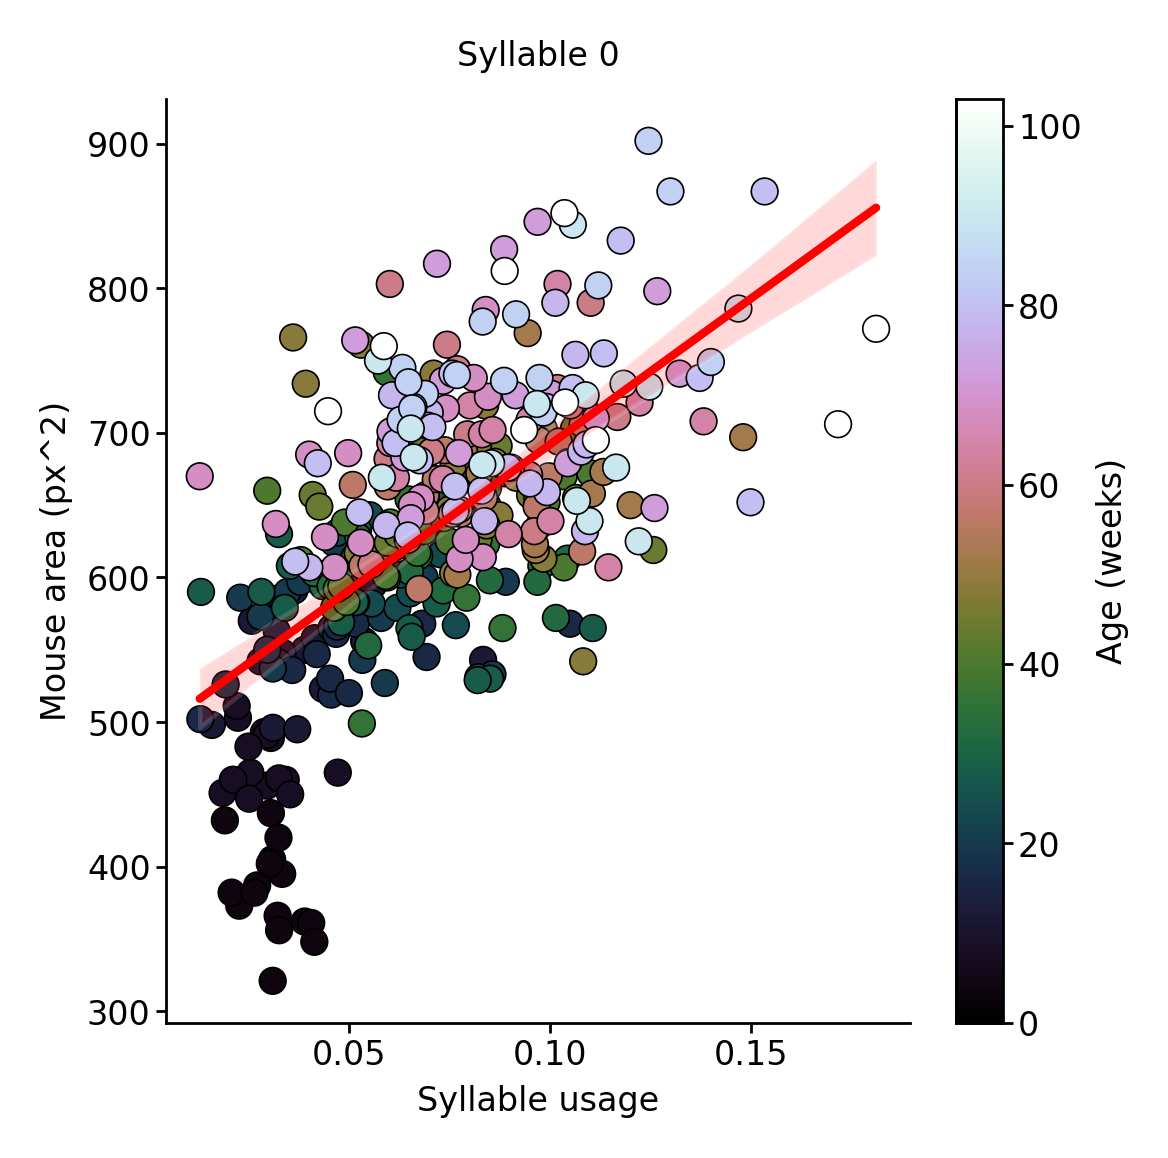

In [79]:
syllable = 0
plt.scatter(
    merged[str(syllable)],
    merged["quant_0.5"],
    c=size_age,
    cmap="cubehelix",
    linewidths=0.3,
    edgecolor="k",
    vmin=0,
)
plt.colorbar(label="Age (weeks)")

ax = sns.regplot(
    data=merged, x=str(syllable), y="quant_0.5", scatter=False, color="red"
)
ax.set(
    xlabel="Syllable usage", ylabel="Mouse area (px^2)", title=f"Syllable {syllable}"
)
sns.despine()

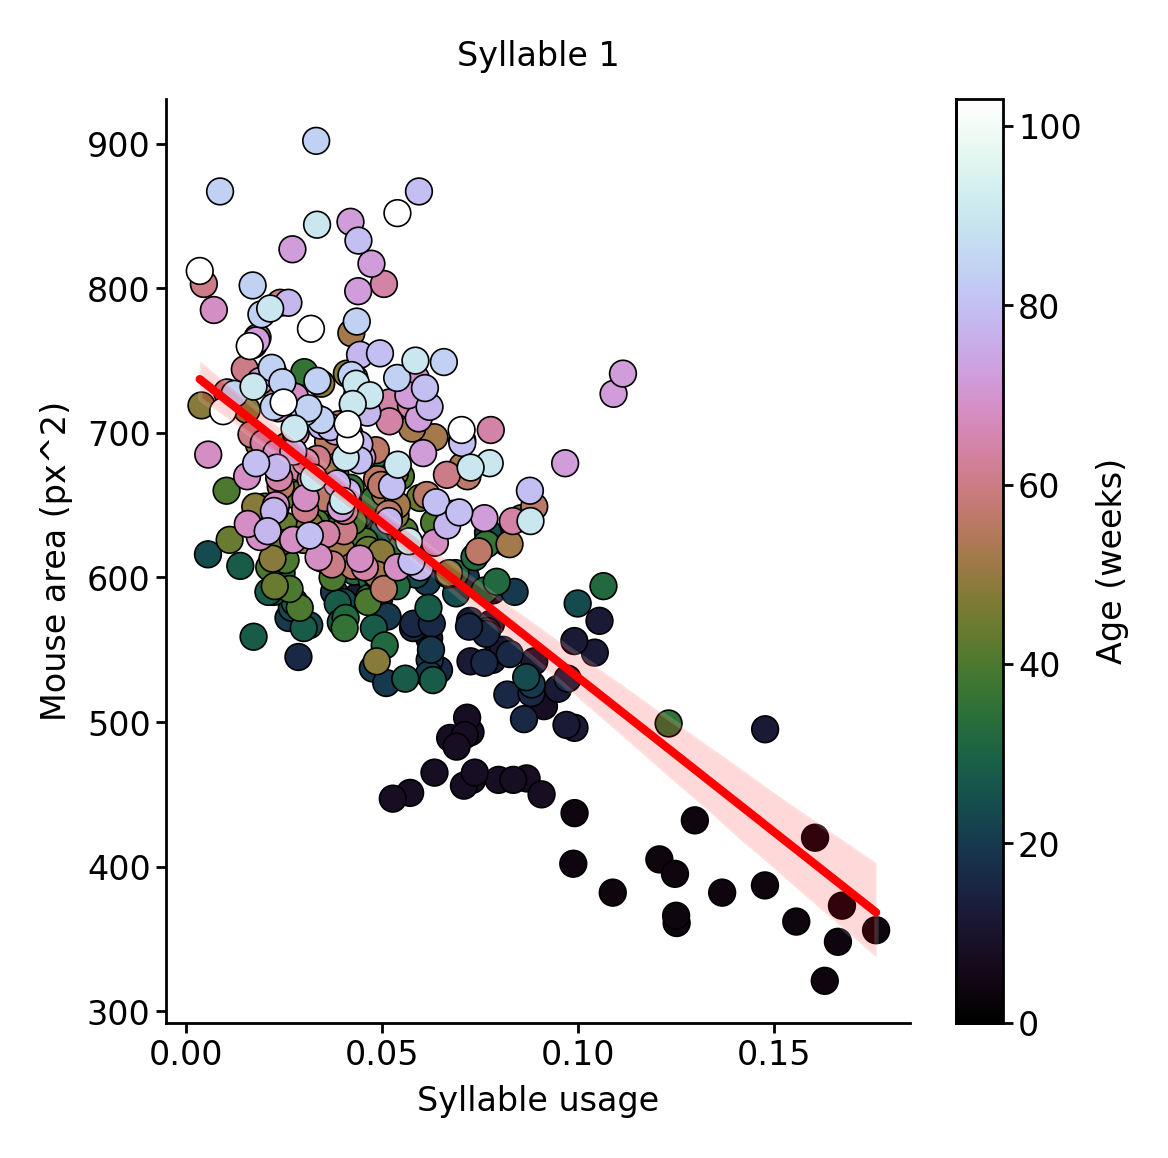

In [80]:
syllable = 1
plt.scatter(
    merged[str(syllable)],
    merged["quant_0.5"],
    c=size_age,
    cmap="cubehelix",
    linewidths=0.3,
    edgecolor="k",
    vmin=0,
)
plt.colorbar(label="Age (weeks)")

ax = sns.regplot(
    data=merged, x=str(syllable), y="quant_0.5", scatter=False, color="red"
)
ax.set(
    xlabel="Syllable usage", ylabel="Mouse area (px^2)", title=f"Syllable {syllable}"
)
sns.despine()

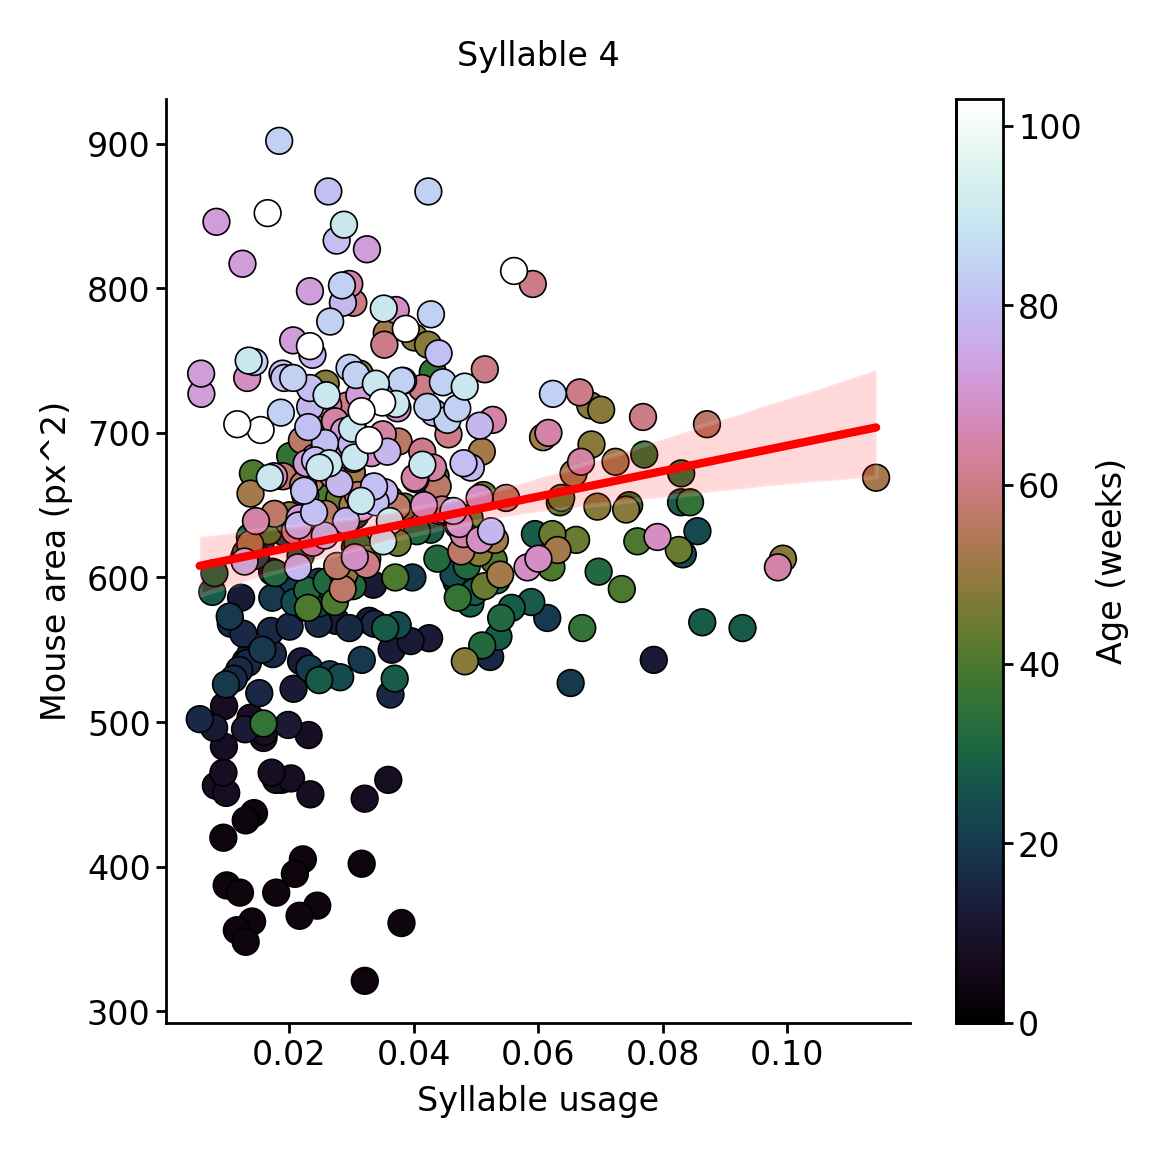

In [90]:
syllable = 4
plt.scatter(
    merged[str(syllable)],
    merged["quant_0.5"],
    c=size_age,
    cmap="cubehelix",
    linewidths=0.3,
    edgecolor="k",
    vmin=0,
)
plt.colorbar(label="Age (weeks)")

ax = sns.regplot(
    data=merged, x=str(syllable), y="quant_0.5", scatter=False, color="red"
)
ax.set(
    xlabel="Syllable usage", ylabel="Mouse area (px^2)", title=f"Syllable {syllable}"
)
sns.despine()

In [57]:
size_df.head()

quant_0.1  \
age mouse     subject_name session_name uuid                                 date                             
12  12M_04_03 12M_04_03    otgy_12M_04  c2cefc36-82e0-4ddc-a56b-5c45ebeaa452 2023-12-02 18:35:24      468.0   
    12M_03_04 12M_03_04    otgy_12M_03  f59e2af9-71d0-492e-9f78-73ffecdb9ad4 2023-12-02 13:34:37      481.0   
    12M_01_02 12M_01_02    otgy_12M_01  eb4a613e-5aae-47e2-877d-30fe03cdb34b 2023-12-02 09:28:18      479.0   
    12M_03_01 12M_03_01    otgy_12M_03  83166f68-4012-4bc2-834c-bba962bea93b 2023-12-02 16:33:34      478.0   
    12M_01_04 12M_01_04    otgy_12M_01  87fbe972-825e-4b62-bb61-b97dcef93748 2023-12-02 09:29:02      459.0   

                                                                                                  quant_0.2  \
age mouse     subject_name session_name uuid                                 date                             
12  12M_04_03 12M_04_03    otgy_12M_04  c2cefc36-82e0-4ddc-a56b-5c45ebeaa452 2023-12-02 18:35:24      502.0   
    12M_03_04 12M_03_04    otgy_12M_03  f59e2af9-71d0-492e-9f78-73ffecdb9ad4 2023-12-02 13:34:37      498.0   
    12M_01_02 12M_01_02    otgy_12M_01  eb4a613e-5aae-47e2-877d-30fe03cdb34b 2023-12-02 09:28:18      499.0   
    12M_03_01 12M_03_01    otgy_12M_03  83166f68-4012-4bc2-834c-bba962bea93b 2023-12-02 16:33:34      499.0   
    12M_01_04 12M_01_04    otgy_12M_01  87fbe972-825e-4b62-bb61-b97dcef93748 2023-12-02 09:29:02      487.0   

                                                                                                  quant_0.3  \
age mouse     subject_name session_name uuid                                 date                             
12  12M_04_03 12M_04_03    otgy_12M_04  c2cefc36-82e0-4ddc-a56b-5c45ebeaa452 2023-12-02 18:35:24      528.0   
    12M_03_04 12M_03_04    otgy_12M_03  f59e2af9-71d0-492e-9f78-73ffecdb9ad4 2023-12-02 13:34:37      516.0   
    12M_01_02 12M_01_02    otgy_12M_01  eb4a613e-5aae-47e2-877d-30fe03cdb34b 2023-12-02 09:28:18      513.0   
    12M_03_01 12M_03_01    otgy_12M_03  83166f68-4012-4bc2-834c-bba962bea93b 2023-12-02 16:33:34      517.0   
    12M_01_04 12M_01_04    otgy_12M_01  87fbe972-825e-4b62-bb61-b97dcef93748 2023-12-02 09:29:02      507.0   

                                                                                                  quant_0.4  \
age mouse     subject_name session_name uuid                                 date                             
12  12M_04_03 12M_04_03    otgy_12M_04  c2cefc36-82e0-4ddc-a56b-5c45ebeaa452 2023-12-02 18:35:24      549.0   
    12M_03_04 12M_03_04    otgy_12M_03  f59e2af9-71d0-492e-9f78-73ffecdb9ad4 2023-12-02 13:34:37      535.0   
    12M_01_02 12M_01_02    otgy_12M_01  eb4a613e-5aae-47e2-877d-30fe03cdb34b 2023-12-02 09:28:18      527.0   
    12M_03_01 12M_03_01    otgy_12M_03  83166f68-4012-4bc2-834c-bba962bea93b 2023-12-02 16:33:34      533.0   
    12M_01_04 12M_01_04    otgy_12M_01  87fbe972-825e-4b62-bb61-b97dcef93748 2023-12-02 09:29:02      524.0   

                                                                                                  quant_0.5  \
age mouse     subject_name session_name uuid                                 date                             
12  12M_04_03 12M_04_03    otgy_12M_04  c2cefc36-82e0-4ddc-a56b-5c45ebeaa452 2023-12-02 18:35:24      570.0   
    12M_03_04 12M_03_04    otgy_12M_03  f59e2af9-71d0-492e-9f78-73ffecdb9ad4 2023-12-02 13:34:37      556.0   
    12M_01_02 12M_01_02    otgy_12M_01  eb4a613e-5aae-47e2-877d-30fe03cdb34b 2023-12-02 09:28:18      543.0   
    12M_03_01 12M_03_01    otgy_12M_03  83166f68-4012-4bc2-834c-bba962bea93b 2023-12-02 16:33:34      548.0   
    12M_01_04 12M_01_04    otgy_12M_01  87fbe972-825e-4b62-bb61-b97dcef93748 2023-12-02 09:29:02      542.0   

                                                                                                  quant_0.6  \
age mouse     subject_name session_name uuid                                 date                